## explain
    session_id - the ID of the session the event took place in
    index - the index of the event for the session
    elapsed_time - how much time has passed (in milliseconds) between the start of the session and when the event was recorded
    event_name - the name of the event type
    name - the event name (e.g. identifies whether a notebook_click is is opening or closing the notebook)
    level - what level of the game the event occurred in (0 to 22)
    page - the page number of the event (only for notebook-related events)
    room_coor_x - the coordinates of the click in reference to the in-game room (only for click events)
    room_coor_y - the coordinates of the click in reference to the in-game room (only for click events)
    screen_coor_x - the coordinates of the click in reference to the player’s screen (only for click events)
    screen_coor_y - the coordinates of the click in reference to the player’s screen (only for click events)
    hover_duration - how long (in milliseconds) the hover happened for (only for hover events)
    text - the text the player sees during this event
    fqid - the fully qualified ID of the event
    room_fqid - the fully qualified ID of the room the event took place in
    text_fqid - the fully qualified ID of the
    fullscreen - whether the player is in fullscreen mode
    hq - whether the game is in high-quality
    music - whether the game music is on or off
    level_group - which group of levels - and group of questions - this row belongs to (0-4, 5-12, 13-22)
    
    session_id - 事件发生的会话 ID
    index - 会话事件的索引
    elapsed_time - 从会话开始到记录事件之间经过了多长时间（以毫秒为单位）
    event_name - 事件类型的名称
    name - 事件名称（例如，标识 notebook_click 是打开还是关闭笔记本）
    level - 事件发生在游戏的哪个级别（0 到 22）
    page - 事件的页码（仅适用于与笔记本相关的事件）
    room_coor_x - 游戏内房间的点击坐标（仅适用于点击事件）
    room_coor_y - 游戏内房间的点击坐标（仅适用于点击事件）
    screen_coor_x - 相对于玩家屏幕的点击坐标（仅适用于点击事件）
    screen_coor_y - 相对于玩家屏幕的点击坐标（仅适用于点击事件）
    hover_duration - 悬停发生的时间（以毫秒为单位）（仅适用于悬停事件）
    text - 玩家在此事件中看到的文本
    fqid - 事件的完全限定 ID
    room_fqid - 发生事件的房间的完全限定 ID
    text_fqid - 的完全限定 ID
    fullscreen - 播放器是否处于全屏模式
    hq - 游戏是否是高质量的
    music - 游戏音乐是打开还是关闭
    level_group - 哪组级别 - 和哪组问题 - 此行属于 (0-4, 5-12, 13-22)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway,chi2_contingency
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import matplotlib.image as mpimg
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('max_columns',200)
pd.set_option('max_colwidth',200)
pd.set_option('max_rows',500)

In [3]:
train = pd.read_csv('../dataset/train.csv')
test = pd.read_csv('../dataset/test.csv')
train_labels = pd.read_csv('../dataset/train_labels.csv')
print('shape of train data: ',train.shape)
print('shape of test data: ',test.shape)
print('shape of train labels data: ',train_labels.shape)
train.head()

shape of train data:  (26296946, 20)
shape of test data:  (3728, 21)
shape of train labels data:  (424116, 2)


session_id  index  elapsed_time      event_name   name  level  page  \
0  20090312431273200      0             0  cutscene_click  basic      0   NaN   
1  20090312431273200      1          1323    person_click  basic      0   NaN   
2  20090312431273200      2           831    person_click  basic      0   NaN   
3  20090312431273200      3          1147    person_click  basic      0   NaN   
4  20090312431273200      4          1863    person_click  basic      0   NaN   

   room_coor_x  room_coor_y  screen_coor_x  screen_coor_y  hover_duration  \
0  -413.991405  -159.314686          380.0          494.0             NaN   
1  -413.991405  -159.314686          380.0          494.0             NaN   
2  -413.991405  -159.314686          380.0          494.0             NaN   
3  -413.991405  -159.314686          380.0          494.0             NaN   
4  -412.991405  -159.314686          381.0          494.0             NaN   

                            text    fqid                       room_fqid  \
0                      undefined   intro  tunic.historicalsociety.closet   
1  Whatcha doing over there, Jo?  gramps  tunic.historicalsociety.closet   
2         Just talking to Teddy.  gramps  tunic.historicalsociety.closet   
3     I gotta run to my meeting!  gramps  tunic.historicalsociety.closet   
4            Can I come, Gramps?  gramps  tunic.historicalsociety.closet   

                                            text_fqid  fullscreen  hq  music  \
0                tunic.historicalsociety.closet.intro           0   0      1   
1  tunic.historicalsociety.closet.gramps.intro_0_cs_0           0   0      1   
2  tunic.historicalsociety.closet.gramps.intro_0_cs_0           0   0      1   
3  tunic.historicalsociety.closet.gramps.intro_0_cs_0           0   0      1   
4  tunic.historicalsociety.closet.gramps.intro_0_cs_0           0   0      1   

  level_group  
0         0-4  
1         0-4  
2         0-4  
3         0-4  
4         0-4

In [4]:
train_labels.head()

session_id  correct
0  20090312431273200_q1        1
1  20090312433251036_q1        0
2  20090312455206810_q1        1
3  20090313091715820_q1        0
4  20090313571836404_q1        1

In [6]:
stat = pd.DataFrame([train.nunique(),test.nunique()]).T.fillna(0)
stat.columns = ['Number of unique values in train','Number of unique values in test']
stat.style.format('{:,.0f}').background_gradient(cmap='YlGn')

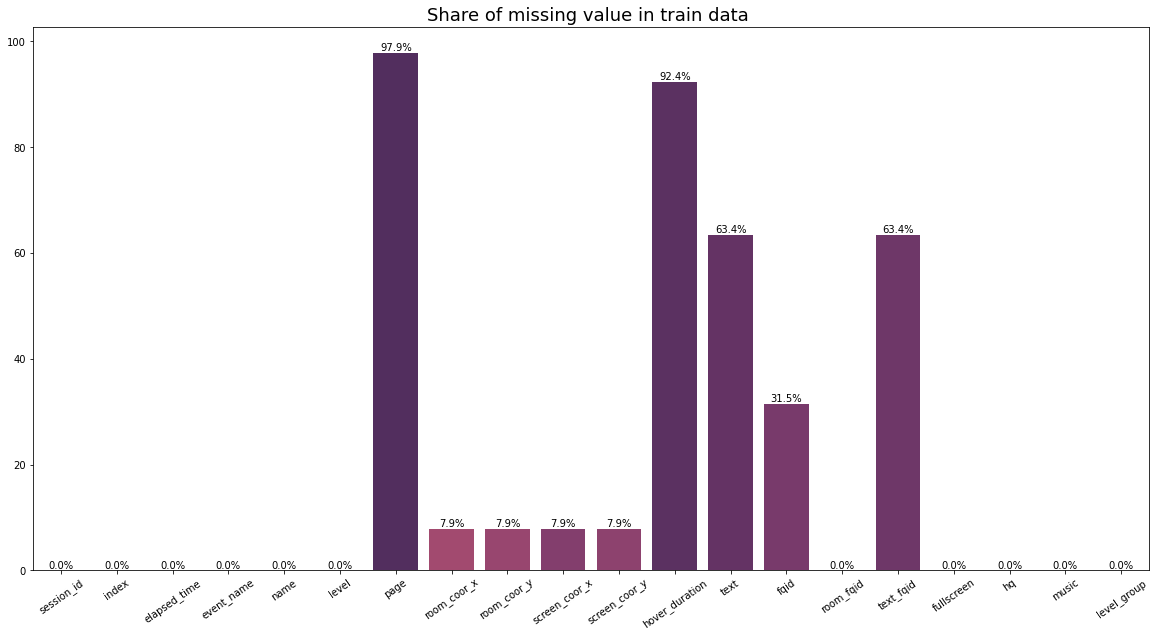

In [7]:
train_missing = train.isnull().sum()/len(train) * 100
plt.figure(figsize=(20, 10))
pal = sns.color_palette(palette='flare',n_colors=len(train_missing))
rank = train_missing.argsort().argsort()
g = sns.barplot(x=train_missing.index,y=train_missing,palette=np.array(pal[::])[rank])
g.axes.set_title('Share of missing value in train data ',fontsize=18)
g.bar_label(g.containers[0],fmt='%.1f%%')
g.xaxis.set_tick_params(rotation=35)
del train_missing,g,pal,rank

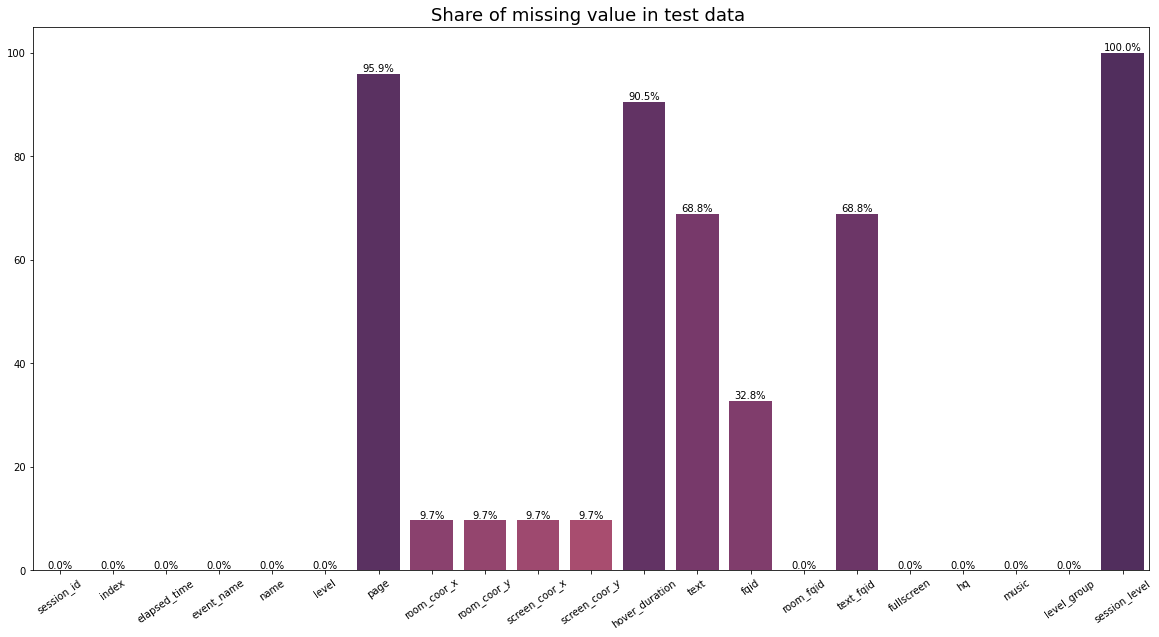

In [8]:
test_missing = test.isnull().sum()/len(test) * 100
plt.figure(figsize=(20, 10))
pal = sns.color_palette(palette='flare',n_colors=len(test_missing))
rank = test_missing.argsort().argsort()
g = sns.barplot(x=test_missing.index,y=test_missing,palette=np.array(pal[::])[rank])
g.axes.set_title('Share of missing value in test data ',fontsize=18)
g.bar_label(g.containers[0],fmt='%.1f%%')
g.xaxis.set_tick_params(rotation=35)
del test_missing,g,pal,rank

## page、hover_duration、text、fqid、text_fqid、fullscreen、hq、music 特征中null值太多，可以去掉这些特征

In [9]:
train_labels.describe().T

count      mean       std  min  25%  50%  75%  max
correct  424116.0  0.705635  0.455757  0.0  0.0  1.0  1.0  1.0

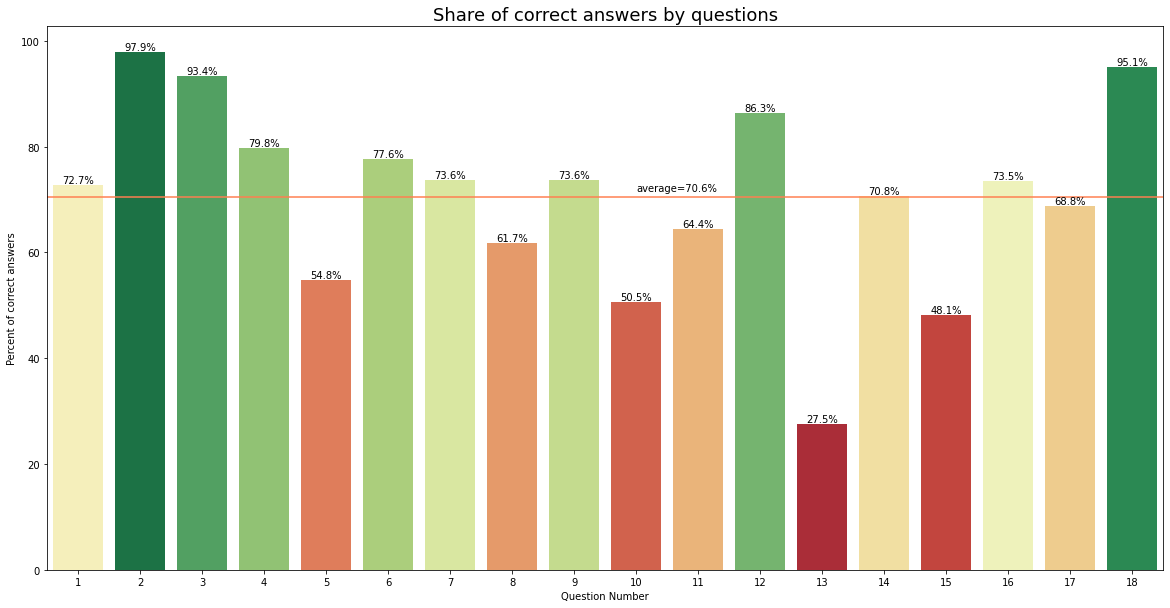

In [10]:
train_labels[['session_id_id','question_number']] = train_labels['session_id'].str.split('_',1,expand=True)
train_labels['session_id_id'] = train_labels['session_id_id'].astype(np.int64)
mean_correct = (train_labels['correct'].mean()*100)

labels_percent = train_labels.groupby(by=['question_number'])['correct'].value_counts(normalize=True).mul(100).rename('Percent').reset_index()
labels_percent['Number'] = labels_percent['question_number'].apply(lambda x:int(x[1:])).astype(np.int64)
labels_percent = labels_percent[labels_percent['correct']==1]

pal = sns.color_palette('RdYlGn',len(labels_percent))
rank = labels_percent.sort_values('Number')['Percent'].argsort().argsort()
plt.figure(figsize=(20,10))
g = sns.barplot(data=labels_percent,x='Number',y='Percent',palette=np.array(pal[::])[rank])
g.axhline(mean_correct,color='coral')
plt.text(9,mean_correct + 1,f'average={round(mean_correct,1)}%')
g.axes.set_title('Share of correct answers by questions',fontsize=18)
# g.xaxis.set_tick_paramas(rotation=35)
g.set(xlabel='Question Number',ylabel = 'Percent of correct answers')
g.bar_label(g.containers[0],fmt='%.1f%%')
del labels_percent,pal,g,rank,mean_correct

In [18]:
category_fea = ['session_id','event_name','name','level','page','text','fqid','room_fqid',
                'text_fqid','level_group']
numerical_fea = ['elapsed_time','room_coor_x','room_coor_y','screen_coor_x','screen_coor_y','hover_duration']

In [14]:
train_event_counts = train['session_id'].value_counts()
test_event_counts = test['session_id'].value_counts()

stat = pd.DataFrame([train_event_counts.describe().index,
                     round(train_event_counts.describe(),2).values,
                     round(test_event_counts.describe(),2).values]).T
stat.columns = ['class','train','test']
stat[['train','test']] = stat[['train','test']].astype(np.float64)
print('Unique session in train: ',len(train_event_counts))
print('Unique session in test: ',len(test_event_counts))
# stat[1:].style.hide_index().background_gradient(cmap='YlGn')
stat[1:].style.hide_index().background_gradient(cmap='YlGn')

Unique session in train:  23562
Unique session in test:  3


In [15]:
def get_session_id_feature(data):
    ids = pd.DataFrame()
    ids['session_id'] = data['session_id'].unique()
    ids['year'] = ids['session_id'].apply(lambda x:int(str(x)[:2])).astype(np.uint8) + 2000
    ids['month'] = ids['session_id'].apply(lambda x:int(str(x)[2:4])).astype(np.uint8) + 1
    ids['weekday'] = ids['session_id'].apply(lambda x:int(str(x)[4:6])).astype(np.uint8)
    ids['hours'] = ids['session_id'].apply(lambda x:int(str(x)[6:8])).astype(np.uint8)
    ids['minute'] = ids['session_id'].apply(lambda x:int(str(x)[8:10])).astype(np.uint8)
    ids['second'] = ids['session_id'].apply(lambda x:int(str(x)[10:12])).astype(np.uint8)
    ids['ms'] = ids['session_id'].apply(lambda x:int(str(x)[12:15])).astype(np.uint8)
    ids['unknow'] = ids['session_id'].apply(lambda x:int(str(x)[15:17])).astype(np.uint8)
    return ids

train_session_ids = get_session_id_feature(train)
test_session_ids = get_session_id_feature(test)
train_session_ids.head()

session_id  year  month  weekday  hours  minute  second   ms  unknow
0  20090312431273200  2020     10        3     12      43      12  220       0
1  20090312433251036  2020     10        3     12      43      32  254      36
2  20090312455206810  2020     10        3     12      45      52   68      10
3  20090313091715820  2020     10        3     13       9      17  158      20
4  20090313571836404  2020     10        3     13      57      18  108       4

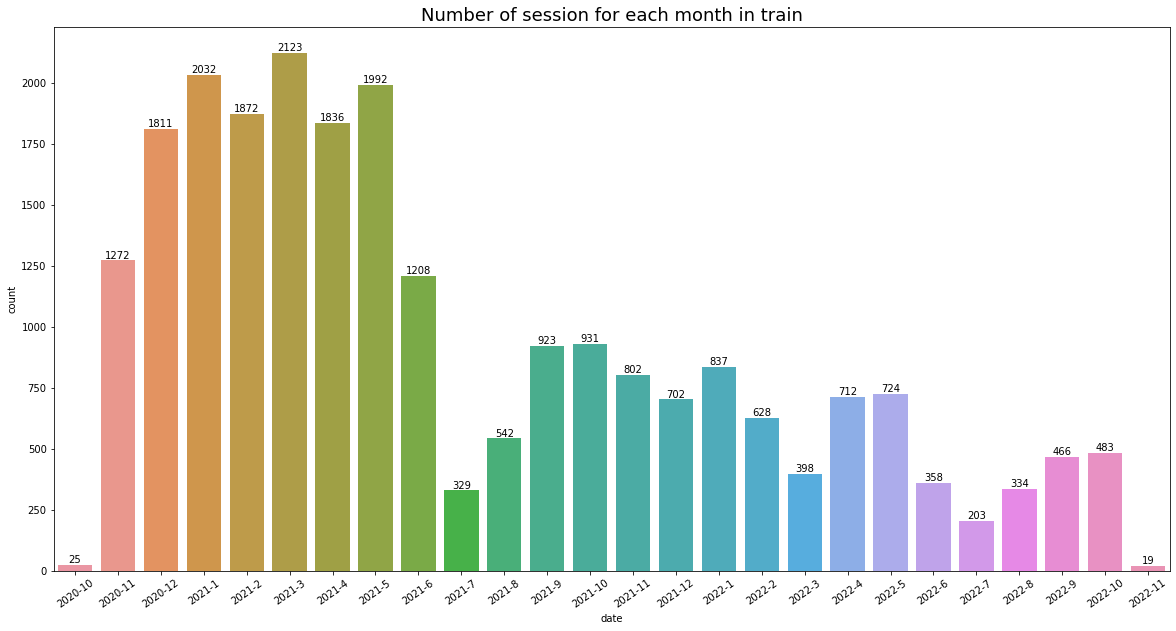

In [16]:
train_session_ids['date'] = train_session_ids['year'].astype(str) + '-' + train_session_ids['month'].astype(str)

plt.figure(figsize=(20,10))
g = sns.countplot(data=train_session_ids,x='date')
plt.title('Number of session for each month in train',fontsize=18)
g.set_yticklabels(['{}'.format(int(num)) for num in g.get_yticks()])
g.bar_label(g.containers[0])
g.xaxis.set_tick_params(rotation=35)
plt.show()

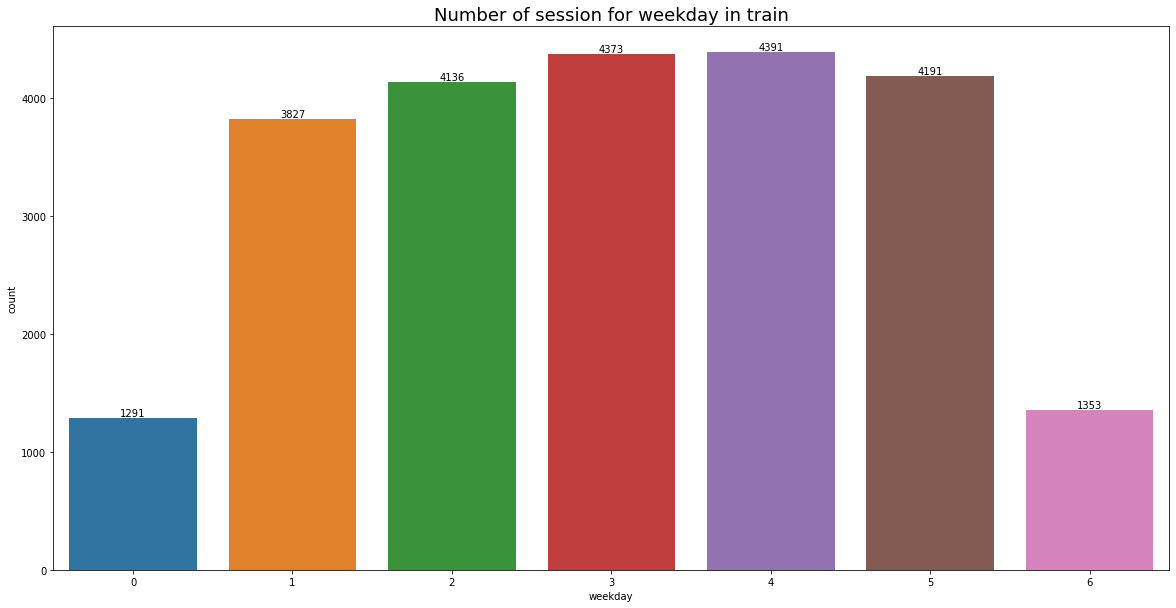

In [17]:
plt.figure(figsize=(20,10))
g = sns.countplot(data=train_session_ids,x='weekday')
plt.title('Number of session for weekday in train',fontsize=18)
g.set_yticklabels(['{}'.format(int(num)) for num in g.get_yticks()])
g.bar_label(g.containers[0])
plt.show()

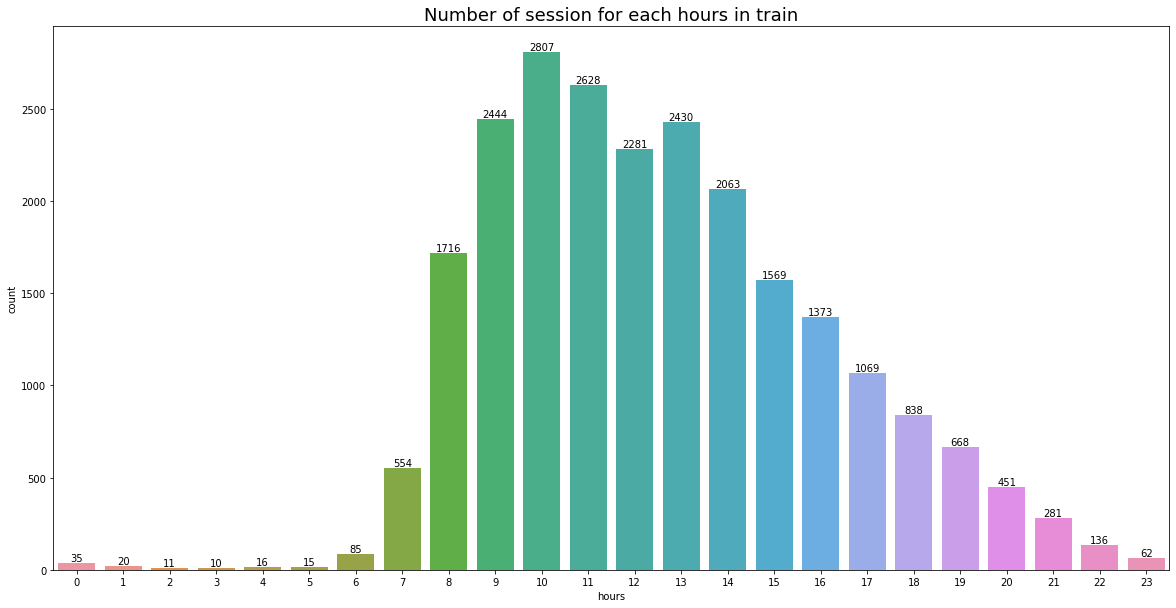

In [18]:
plt.figure(figsize=(20,10))
g = sns.countplot(data=train_session_ids,x='hours')
plt.title('Number of session for each hours in train',fontsize=18)
g.set_yticklabels(['{}'.format(int(num)) for num in g.get_yticks()])
g.bar_label(g.containers[0])
plt.show()
del train_session_ids,test_session_ids

In [20]:
elapsed_time_train = np.round(train['elapsed_time'].astype(np.float64)/60000.0, 2)
elapsed_time_test = np.round(test['elapsed_time'].astype(np.float64)/60000.0, 2)
stat = pd.DataFrame([elapsed_time_train.describe().index,
                    round(elapsed_time_train.describe(),2).values,
                    round(elapsed_time_test.describe(),2).values]).T
stat.columns = ['Class','Train','Test']
stat[['Train','Test']] = stat[['Train','Test']].astype(np.float64)
print('describe of Elapsed_time:')
stat[1:].style.hide_index().background_gradient(cmap='YlGn')

describe of Elapsed_time:


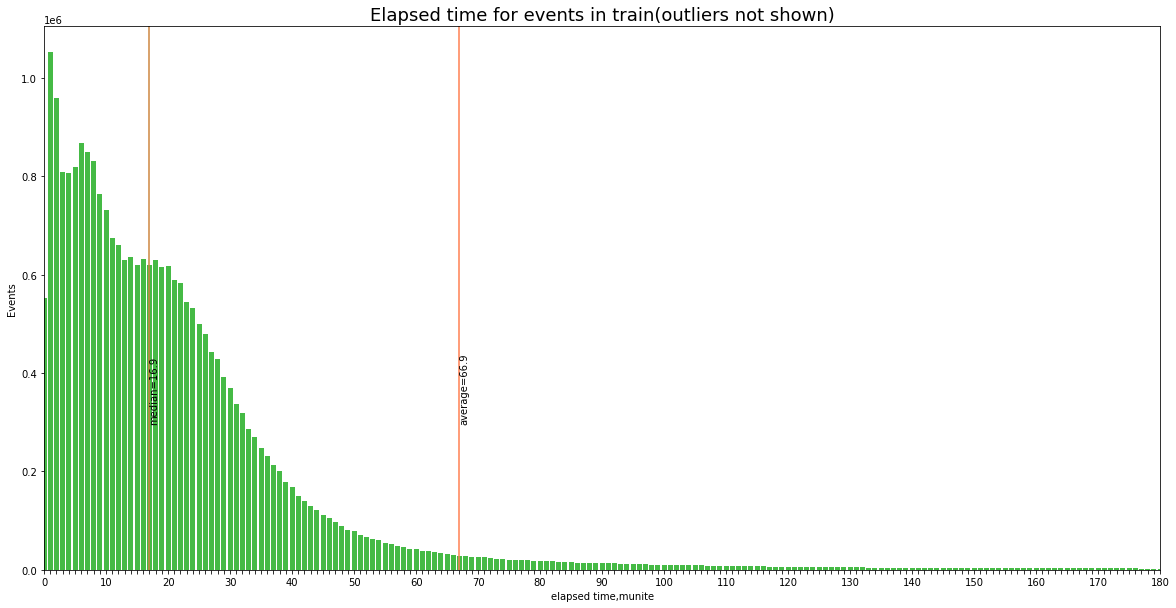

In [21]:
mean_elapsed_time_train = elapsed_time_train.mean()
median_elapsed_time_train = elapsed_time_train.median()
elapsed_time_train_counts = round(elapsed_time_train).astype(np.int64).value_counts()

plt.subplots(figsize=(20,10))
g = sns.barplot(x=elapsed_time_train_counts.index,y = elapsed_time_train_counts,color='limegreen')
plt.title('Elapsed time for events in train(outliers not shown)',fontsize=18)
g.set_xticklabels(['{}'.format(int(num)) if i%10==0 else '' for i,num in enumerate(g.get_xticks())])
g.set(xlabel='elapsed time,munite',ylabel='Events')
g.axvline(mean_elapsed_time_train,color='coral')
g.text(mean_elapsed_time_train,300000,f'average={round(mean_elapsed_time_train,1)}',rotation=90)
g.axvline(median_elapsed_time_train,color='peru')
g.text(median_elapsed_time_train,300000,f'median={round(median_elapsed_time_train,1)}',rotation=90)
plt.xlim(0,180)
plt.show()
del mean_elapsed_time_train,median_elapsed_time_train,elapsed_time_train_counts,g

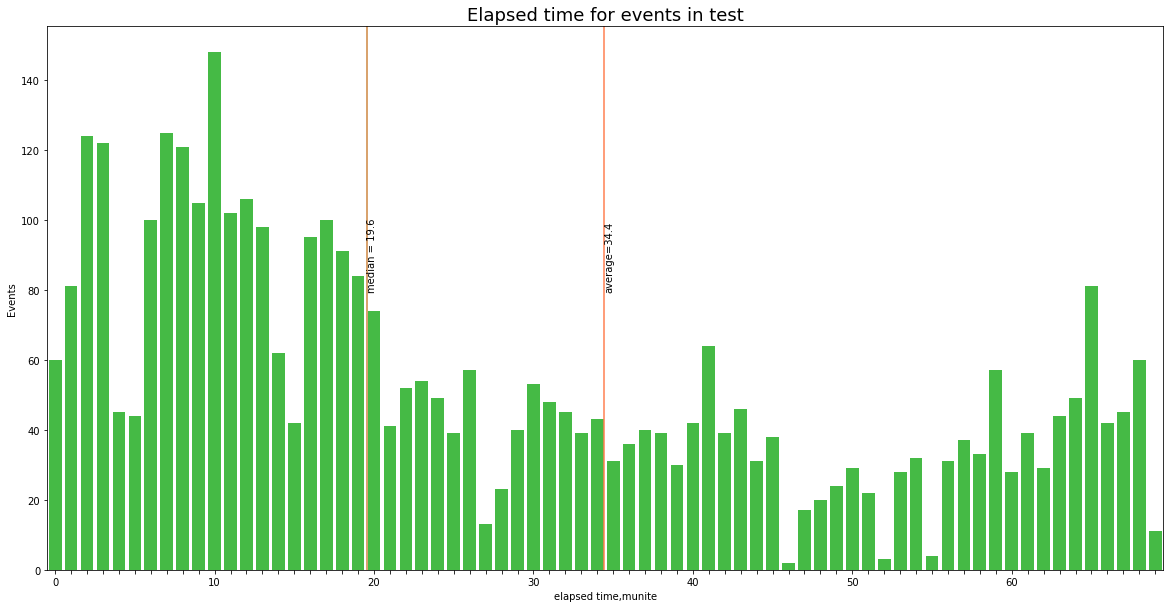

In [22]:
mean_elapsed_time_test = elapsed_time_test.mean()
median_elapsed_time_test = elapsed_time_test.median()
elapsed_time_test_counts = round(elapsed_time_test).astype(np.int64).value_counts()

plt.figure(figsize=(20,10))
g = sns.barplot(x=elapsed_time_test_counts.index,y=elapsed_time_test_counts,color='limegreen')
plt.title('Elapsed time for events in test',fontsize=18)
g.set_xticklabels(['{}'.format(int(num)) if i%10==0 else '' for i,num in enumerate(g.get_xticks())])
g.set(xlabel='elapsed time,munite',ylabel='Events')
g.axvline(mean_elapsed_time_test,color='coral')
g.text(mean_elapsed_time_test,80,f'average={round(mean_elapsed_time_test,1)}',rotation=90)
g.axvline(median_elapsed_time_test,color='peru')
g.text(median_elapsed_time_test,80,f'median = {round(median_elapsed_time_test,1)}',rotation=90)
plt.show()
del mean_elapsed_time_test,median_elapsed_time_test,elapsed_time_test_counts,g

In [23]:
event_name_train_counts = train['event_name'].value_counts()
name_train_counts = train['name'].value_counts()
fqid_train_counts = train['fqid'].value_counts()
event_name_test_counts = test['event_name'].value_counts()
name_test_counts = test['name'].value_counts()
fqid_test_counts = test['fqid'].value_counts()

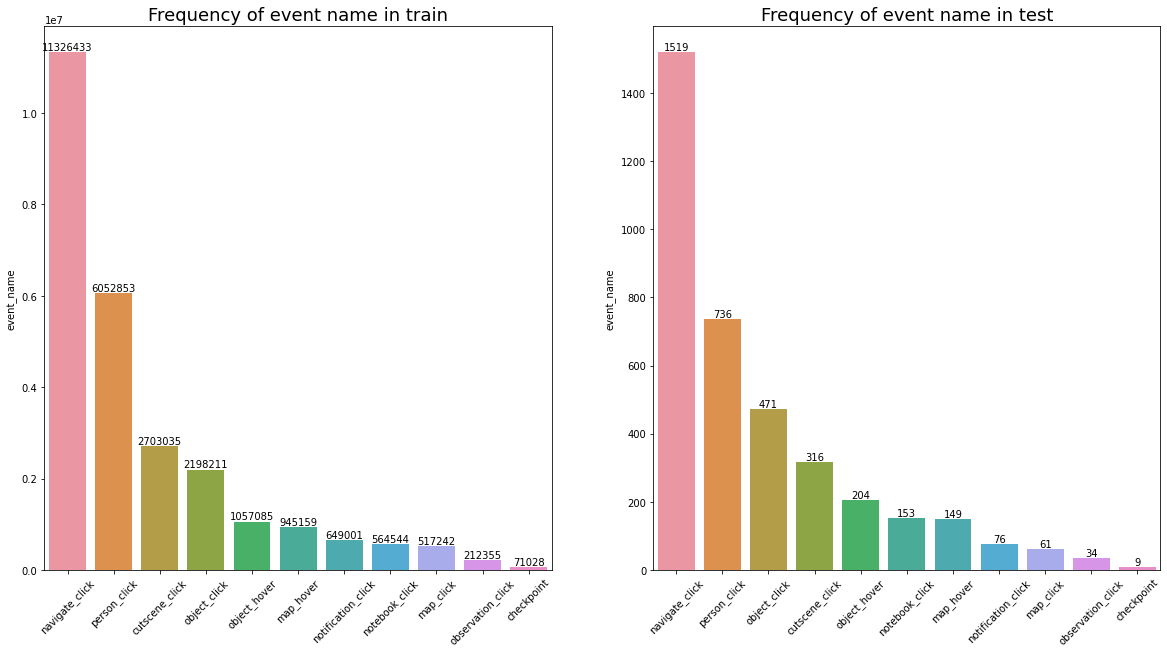

In [24]:
fig,axs = plt.subplots(1,2,figsize=(20,10))
g1 = sns.barplot(x=event_name_train_counts.index,y=event_name_train_counts,ax=axs[0])
g1.set_title('Frequency of event name in train',fontsize=18)
g1.bar_label(g1.containers[0],labels=[f'{x.get_height():.0f}' for x in g1.containers[0]])
g1.xaxis.set_tick_params(rotation=45)
g2 = sns.barplot(x=event_name_test_counts.index,y=event_name_test_counts,ax=axs[1])
g2.set_title('Frequency of event name in test',fontsize=18)
g2.bar_label(g2.containers[0])
g2.xaxis.set_tick_params(rotation=45)

plt.show()

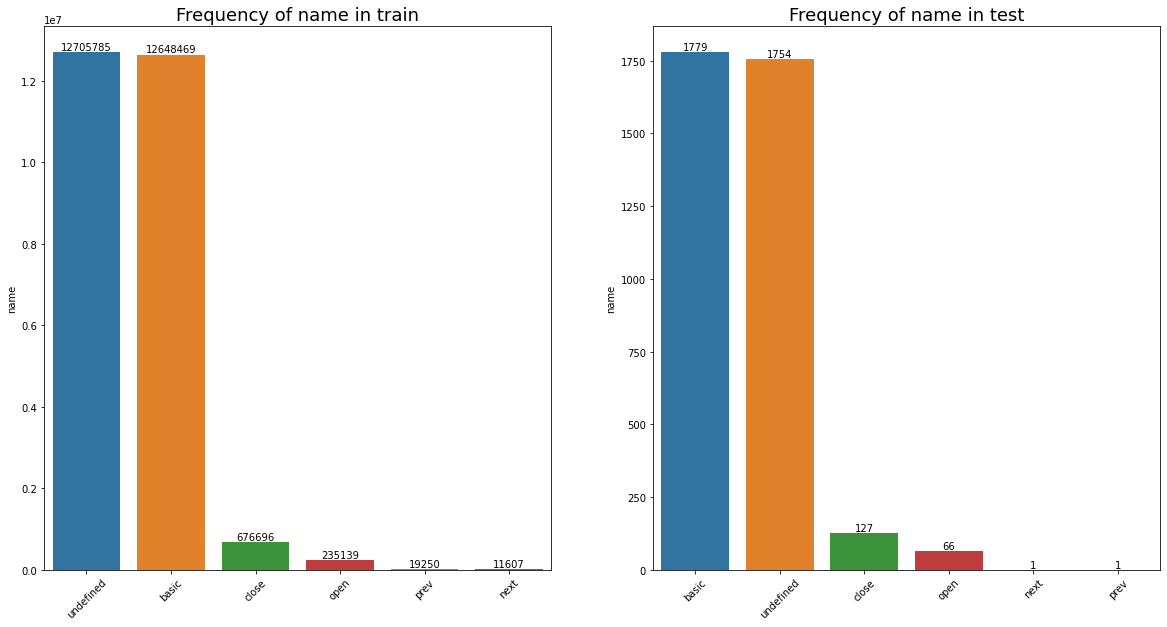

In [25]:
fig,axs = plt.subplots(1,2,figsize=(20,10))
g1 = sns.barplot(x=name_train_counts.index,y=name_train_counts,ax=axs[0])
g1.set_title('Frequency of name in train',fontsize=18)
g1.bar_label(g1.containers[0],labels=[f'{x.get_height():.0f}' for x in g1.containers[0]])
g1.xaxis.set_tick_params(rotation=45)

g2 = sns.barplot(x=name_test_counts.index,y=name_test_counts,ax=axs[1])
g2.set_title('Frequency of name in test',fontsize=18)
g2.bar_label(g2.containers[0],labels=[f'{x.get_height():.0f}' for x in g2.containers[0]])
g2.xaxis.set_tick_params(rotation=45)
plt.show()
del fig,axs,g1,g2

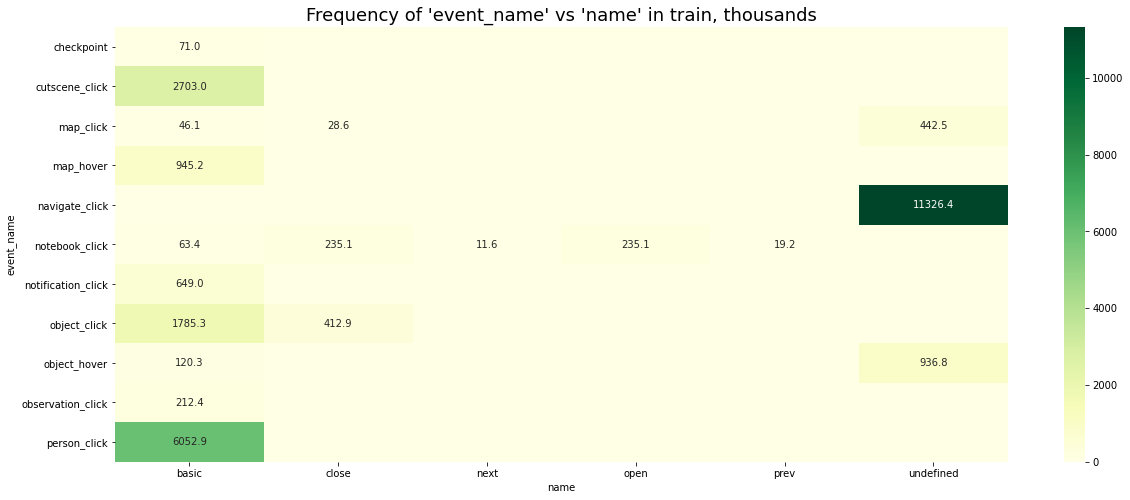

In [26]:
table = pd.pivot_table(data=train,index='event_name',columns='name',aggfunc='size',fill_value=0)
table = (table/1000).round(decimals=1)
plt.figure(figsize=(20,8))
annotations = table.astype(str)
annotations[table==0] = ''
g = sns.heatmap(data=table,annot=annotations,fmt='',cmap='YlGn')
plt.title("Frequency of 'event_name' vs 'name' in train, thousands", fontsize=18)
plt.show()
del table,g,annotations

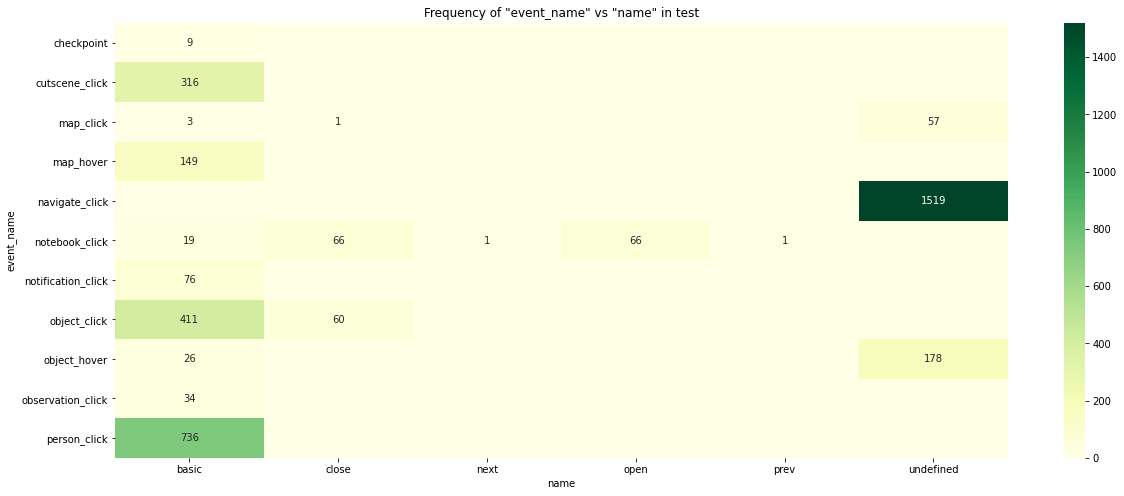

In [10]:
table = pd.pivot_table(data=test,index='event_name',columns='name',aggfunc='size',fill_value=0)
# table = (table/1000).round(decimals=0)
plt.figure(figsize=(20,8))
annotations = table.astype(str)
annotations[table==0] = ''
g = sns.heatmap(data=table,annot=annotations,fmt='',cmap='YlGn')
plt.title('Frequency of "event_name" vs "name" in test')
plt.show()
del table,g,annotations

In [27]:
from wordcloud import WordCloud

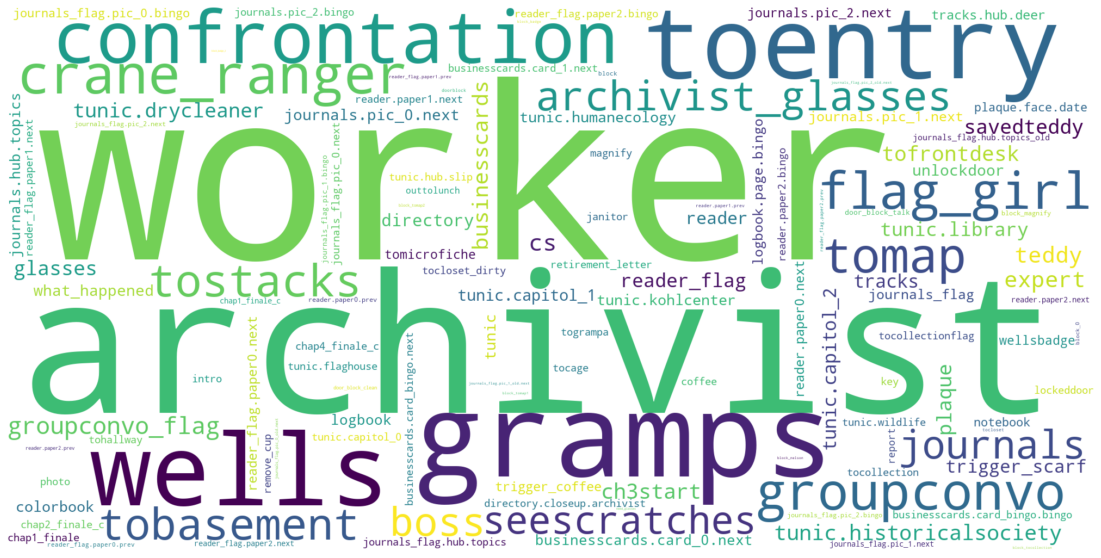

In [28]:
world_freq_train = dict(zip(fqid_train_counts.index.tolist(),fqid_train_counts.values.tolist()))
worldcloud_train = WordCloud(width=2000,height=1000,background_color='white').generate_from_frequencies(world_freq_train)
plt.figure(figsize=(20,10))
plt.axis('off')
plt.imshow(worldcloud_train,interpolation='bilinear')
plt.show()
del world_freq_train,worldcloud_train

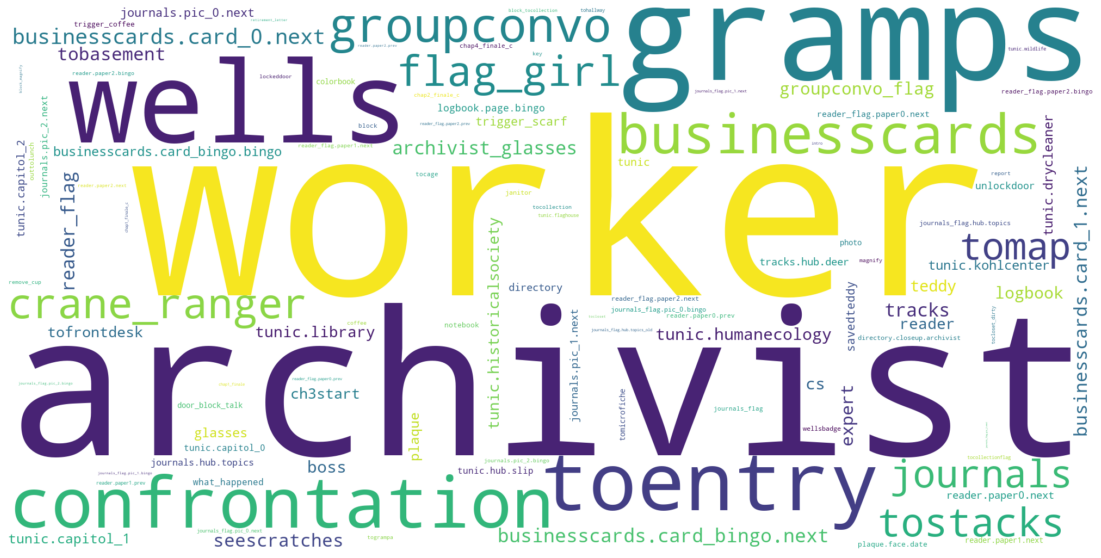

In [13]:
world_fre_test = dict(zip(fqid_test_counts.index.tolist(),fqid_test_counts.values.tolist()))
worldcloud_test = WordCloud(width=2000,height=1000,background_color='white').generate_from_frequencies(world_fre_test)
plt.figure(figsize=(20,10))
plt.axis('off')
plt.imshow(worldcloud_test,interpolation='bilinear')
plt.show()
del world_fre_test,worldcloud_test

In [29]:
room_counts_train = train['room_fqid'].value_counts()
room_counts_test = test['room_fqid'].value_counts()
print('Number of unique rooms:',len(room_counts_train))

Number of unique rooms: 19


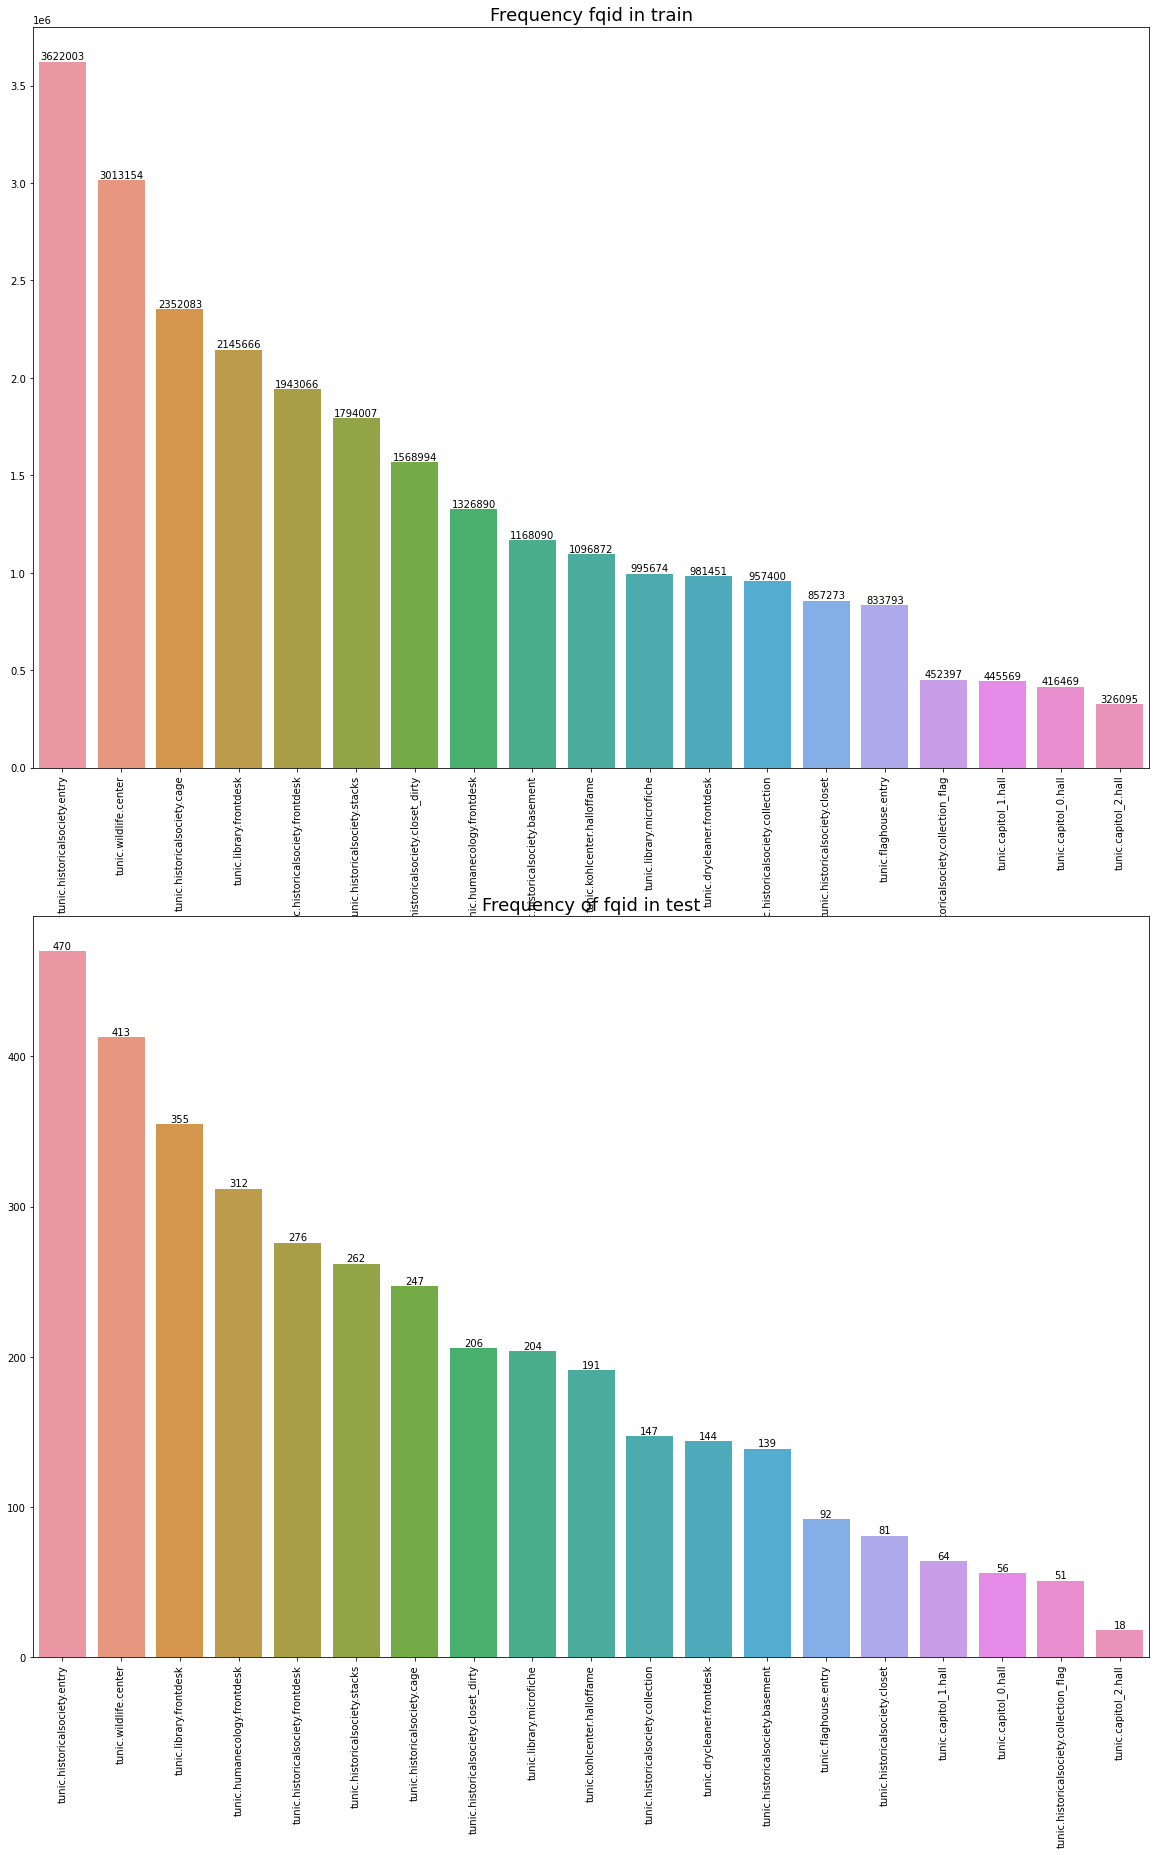

In [30]:
fig,axs = plt.subplots(2,1,figsize=(20,30))

g1 = sns.barplot(x=room_counts_train.index,y=room_counts_train.values,ax=axs[0])
g1.set_title('Frequency fqid in train',fontsize=18)
g1.bar_label(g1.containers[0],labels=[f'{x.get_height():.0f}' for x in g1.containers[0]])
g1.xaxis.set_tick_params(rotation=90)

g2 = sns.barplot(x=room_counts_test.index,y=room_counts_test.values,ax=axs[1])
g2.set_title('Frequency of fqid in test',fontsize=18)
g2.bar_label(g2.containers[0],labels=[f'{x.get_height():.0f}' for x in g2.containers[0]])
g2.xaxis.set_tick_params(rotation=90)
plt.show()

del fig,axs,g1,g2

In [31]:
unique_levels_per_session = train[['session_id','level']].drop_duplicates()
missing_session = unique_levels_per_session.groupby(by='session_id').count().reset_index(drop=False)
missing_session = missing_session[missing_session['level']!=23].reset_index(drop=True)['session_id']
print('Number of session in which one of 22 levels is not present:',len(missing_session))

for l in range(23):
    x=unique_levels_per_session.loc[(unique_levels_per_session['session_id'].isin(missing_session))&(unique_levels_per_session['level'].eq(l))]
    if len(x)!=len(missing_session):
        print('\n Level {} is missing in {} session'.format(l,len(x)))
        print('Examples of session with missing {} level:{}'.format(l,x['session_id'].tolist()[:5]))
        
del unique_levels_per_session,missing_session,l,x

level_counts_train = train['level'].value_counts()
level_counts_group_train = train['level_group'].value_counts()
level_counts_test = test['level'].value_counts()
level_counts_group_test = test['level_group'].value_counts()

Number of session in which one of 22 levels is not present: 577

 Level 7 is missing in 576 session
Examples of session with missing 7 level:[20090316190523732, 20100007445515820, 20100014211946468, 20100018421509572, 20100020122406090]

 Level 15 is missing in 17 session
Examples of session with missing 15 level:[20100020122406090, 20100110093663916, 20100309472366890, 20100512192183730, 20110410570739092]

 Level 20 is missing in 561 session
Examples of session with missing 20 level:[20090316190523732, 20100007445515820, 20100014211946468, 20100018421509572, 20100115005512812]

 Level 21 is missing in 570 session
Examples of session with missing 21 level:[20090316190523732, 20100007445515820, 20100014211946468, 20100018421509572, 20100020122406090]


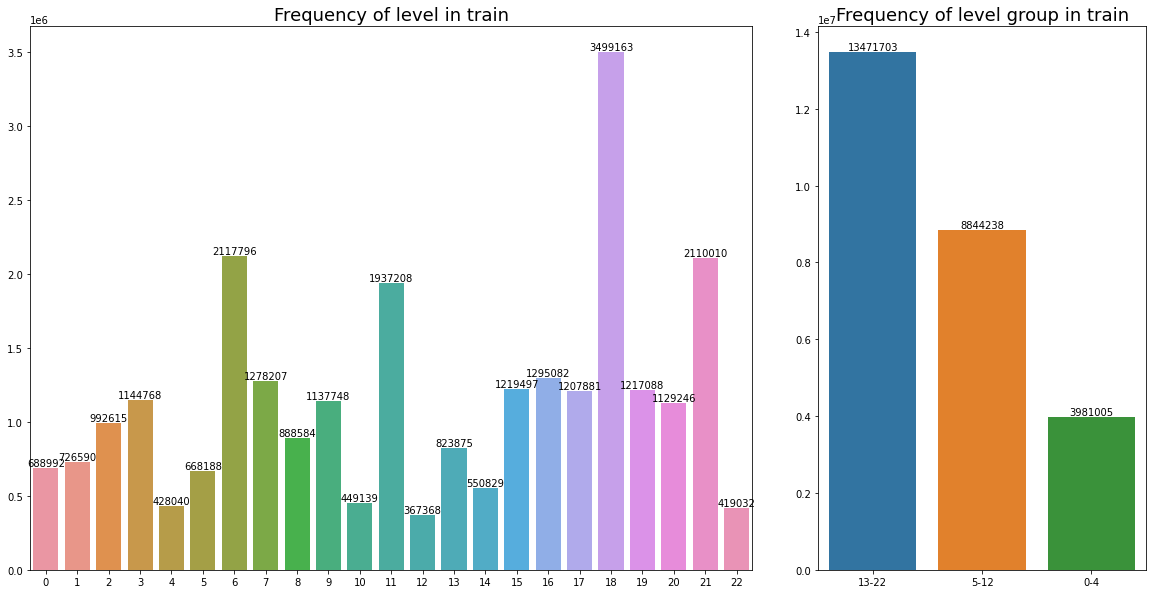

In [32]:
plt.figure(figsize=(20,10))
ax1 = plt.subplot(1,3,(1,2))
ax2 = plt.subplot(1,3,3)
g1 = sns.barplot(x=level_counts_train.index,y = level_counts_train.values,ax=ax1)
g1.set_title('Frequency of level in train',fontsize=18)
g1.bar_label(g1.containers[0],labels=[f'{x.get_height():.0f}' for x in g1.containers[0]])

g2 = sns.barplot(x=level_counts_group_train.index,y=level_counts_group_train.values,ax=ax2)
g2.set_title('Frequency of level group in train',fontsize=18)
g2.bar_label(g2.containers[0],labels=[f'{x.get_height():.0f}' for x in g2.containers[0]])
plt.show()
del ax1,ax2,g1,g2

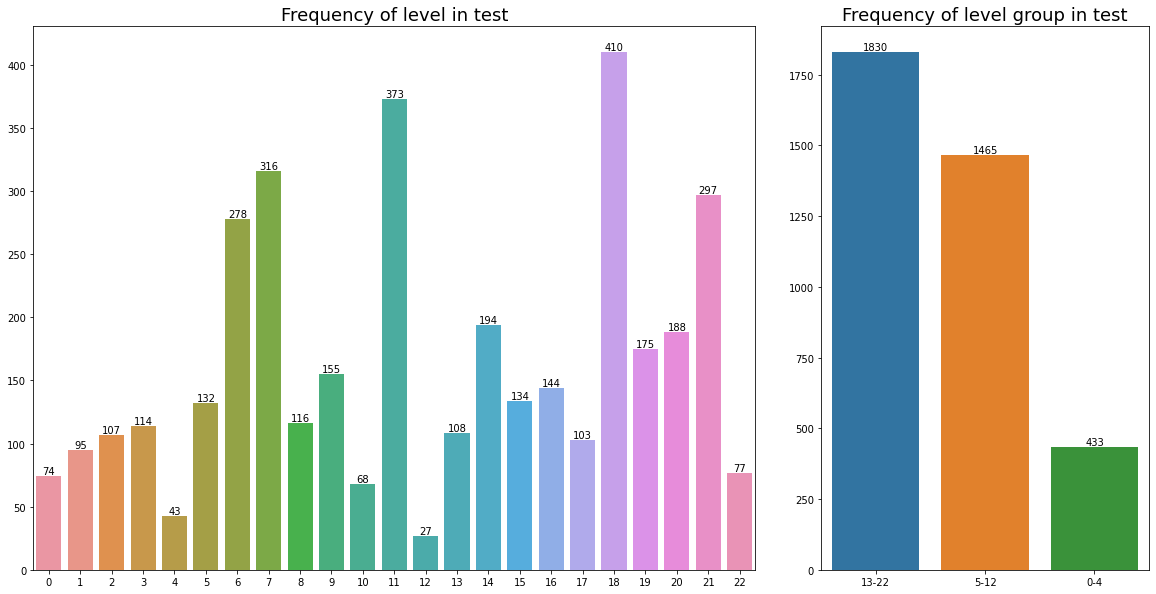

In [33]:
plt.figure(figsize=(20,10))
ax1 = plt.subplot(1,3,(1,2))
ax2 = plt.subplot(1,3,3)
g1 = sns.barplot(x=level_counts_test.index,y = level_counts_test.values,ax=ax1)
g1.set_title('Frequency of level in test',fontsize=18)
g1.bar_label(g1.containers[0],labels=[f'{x.get_height():.0f}' for x in g1.containers[0]])

g2 = sns.barplot(x=level_counts_group_test.index,y=level_counts_group_test.values,ax=ax2)
g2.set_title('Frequency of level group in test',fontsize=18)
g2.bar_label(g2.containers[0],labels=[f'{x.get_height():.0f}' for x in g2.containers[0]])
plt.show()
del ax1,ax2,g1,g2

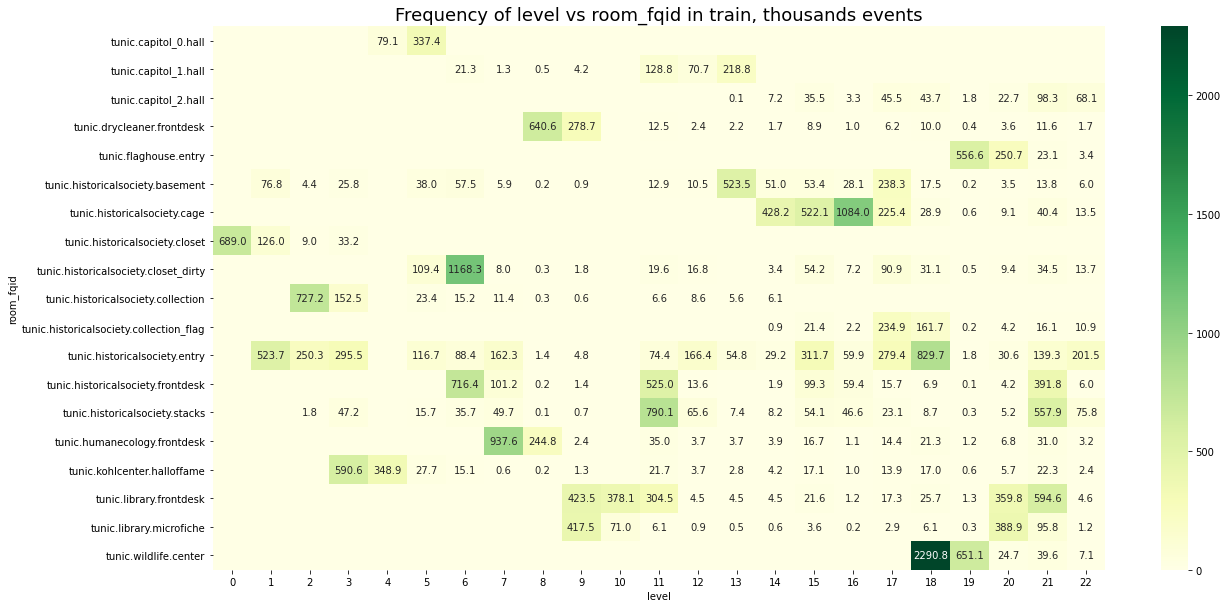

In [34]:
pivot = train.pivot_table(index='room_fqid',columns='level',aggfunc='size')
pivot = (pivot.fillna(0)/1000).round(decimals=1)
plt.figure(figsize=(20,10))
annotations = pivot.astype(str)
annotations[pivot==0] = ''
g = sns.heatmap(pivot,annot=annotations,fmt='',cmap='YlGn')
plt.title('Frequency of level vs room_fqid in train, thousands events',fontsize=18)
plt.show()
del pivot,annotations,g

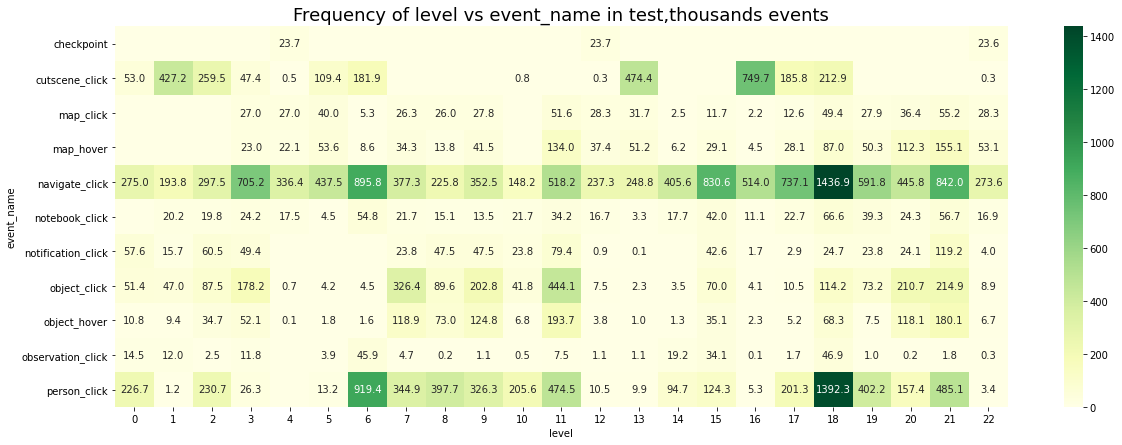

In [35]:
pivot = train.pivot_table(index='event_name',columns='level',aggfunc='size')
pivot = (pivot.fillna(0)/1000).round(decimals=1)
plt.figure(figsize=(20,7))
annotations = pivot.astype(str)
annotations[pivot==0] = ''
g = sns.heatmap(pivot,annot=annotations,fmt='',cmap='YlGn')
plt.title('Frequency of level vs event_name in test,thousands events',fontsize=18)
plt.show()
del pivot,annotations,g

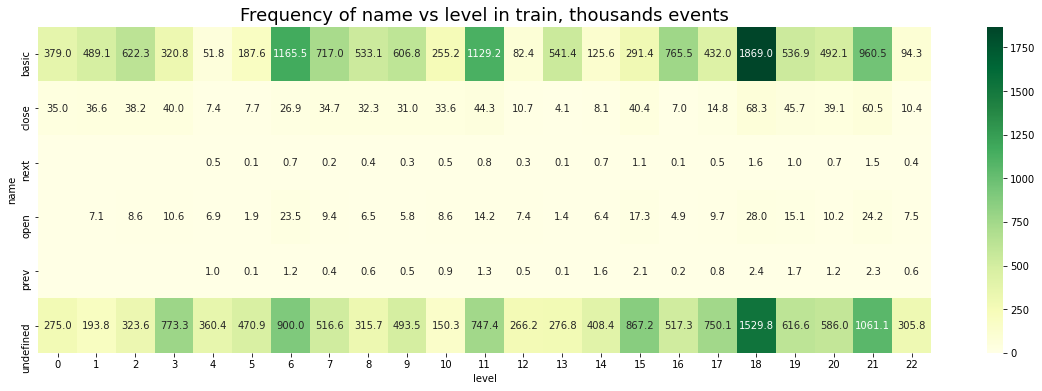

In [36]:
pivot = train.pivot_table(index='name',columns='level',aggfunc='size')
pivot = (pivot.fillna(0)/1000).round(decimals=1)
annotations = pivot.astype(str)
annotations[pivot==0] = ''
plt.figure(figsize=(20,6))
g = sns.heatmap(pivot,annot=annotations,fmt='',cmap='YlGn')
plt.title('Frequency of name vs level in train, thousands events',fontsize=18)
plt.show()
del pivot,annotations,g

In [37]:
print('Share of events with geo-location in train: {}'.format(round(train['room_coor_x'].count()/len(train)*100,2)))
print('Share of events with geo-location in test: {}'.format(round(test['room_coor_x'].count()/len(test) *100,2)))

Share of events with geo-location in train: 92.12
Share of events with geo-location in test: 90.29


In [38]:
stat = pd.DataFrame([train['room_coor_x'].describe().index.tolist(),
                    train['room_coor_x'].astype('float64').describe().values,
                    train['room_coor_y'].astype('float64').describe().values,
                    train['screen_coor_x'].astype('float64').describe().values,
                    train['screen_coor_y'].astype('float64').describe().values,
                    test['room_coor_x'].astype('float64').describe().values,
                    test['room_coor_y'].astype('float64').describe().values,
                    test['screen_coor_x'].astype('float64').describe().values,
                    test['screen_coor_y'].astype('float64').describe().values]).T
stat.columns = ['Class','room_coor_x in train','room_coor_y in train','screen_coor_x in train','screen_coor_y in train',
               'room_coor_x in test','room_coor_y in test','screen_coor_x in test','screen_coor_y in test']
stat[stat.columns.tolist()[1:]] = stat[stat.columns.tolist()[1:]].apply(pd.to_numeric,errors='coerce')
print('Geo-location statistics for events:')
stat[1:].style.hide_index().background_gradient('YlGn')

Geo-location statistics for events:


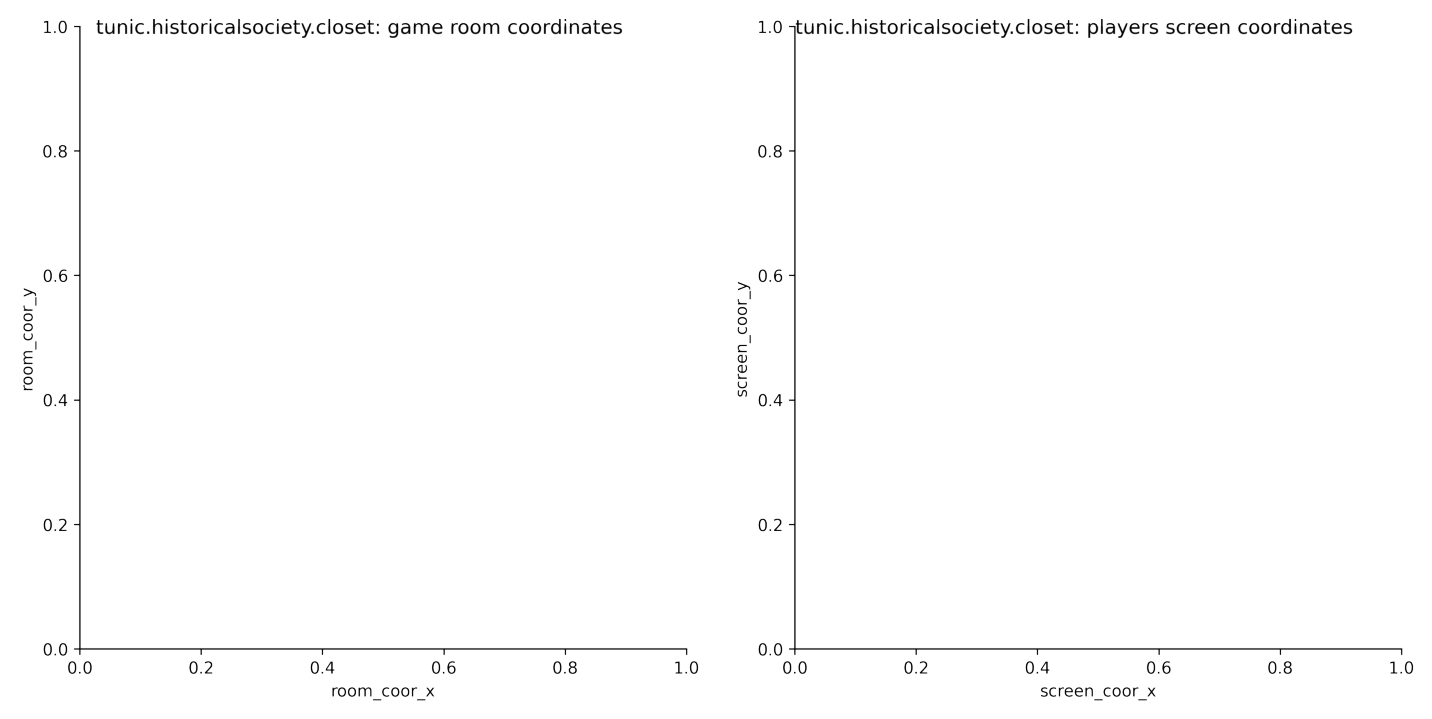

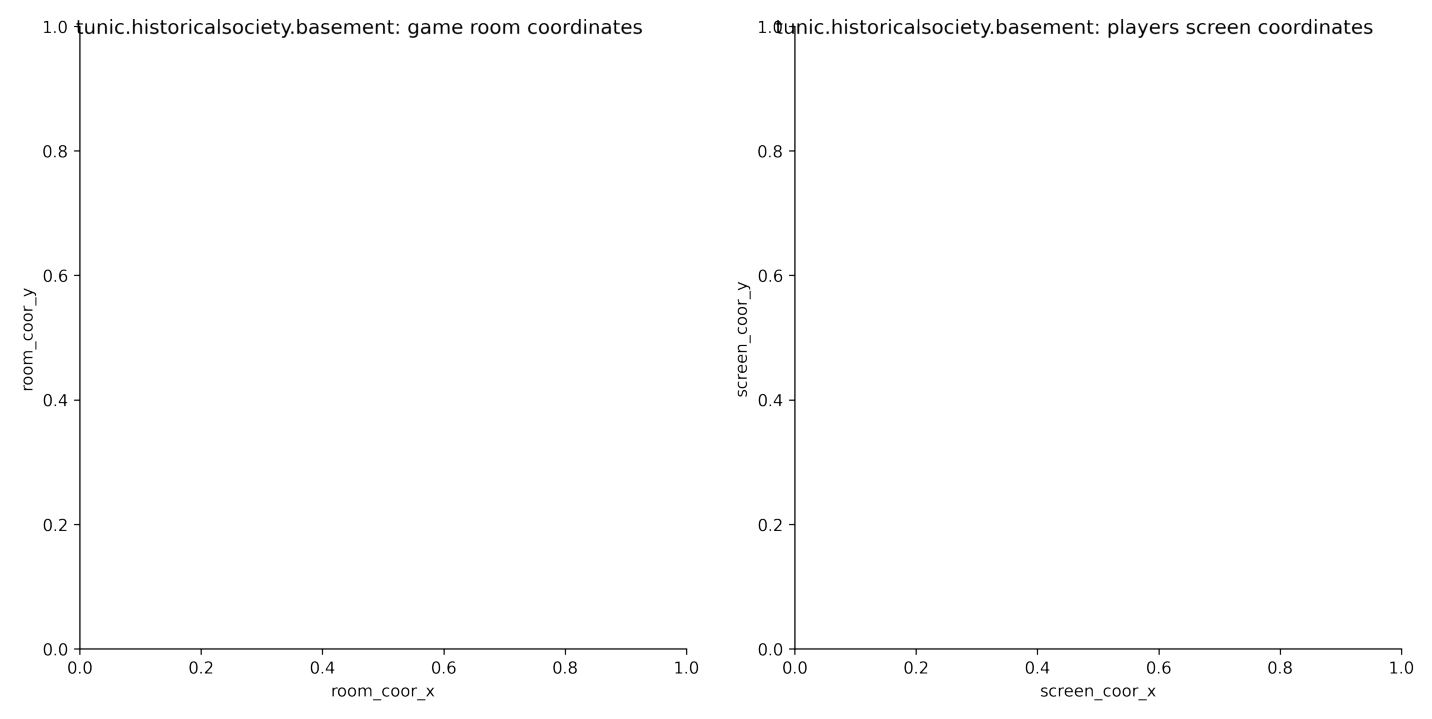

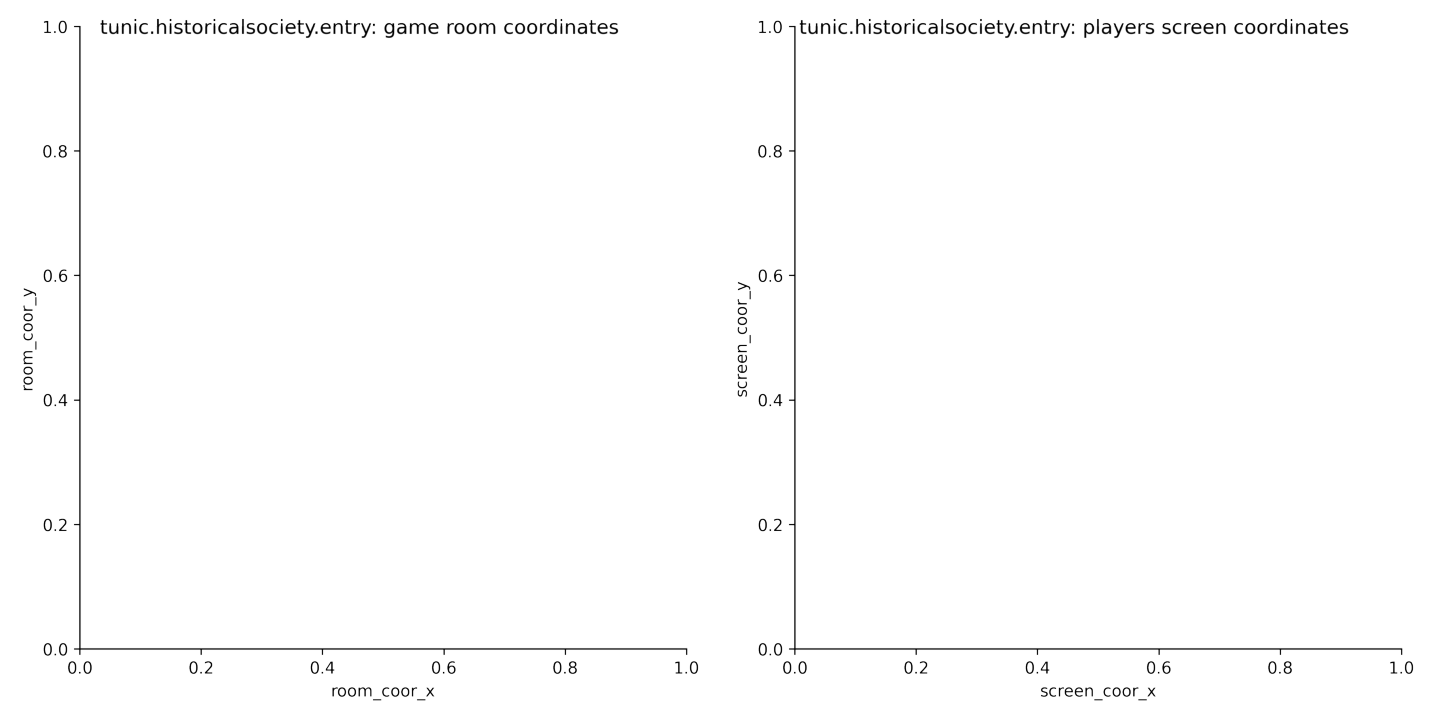

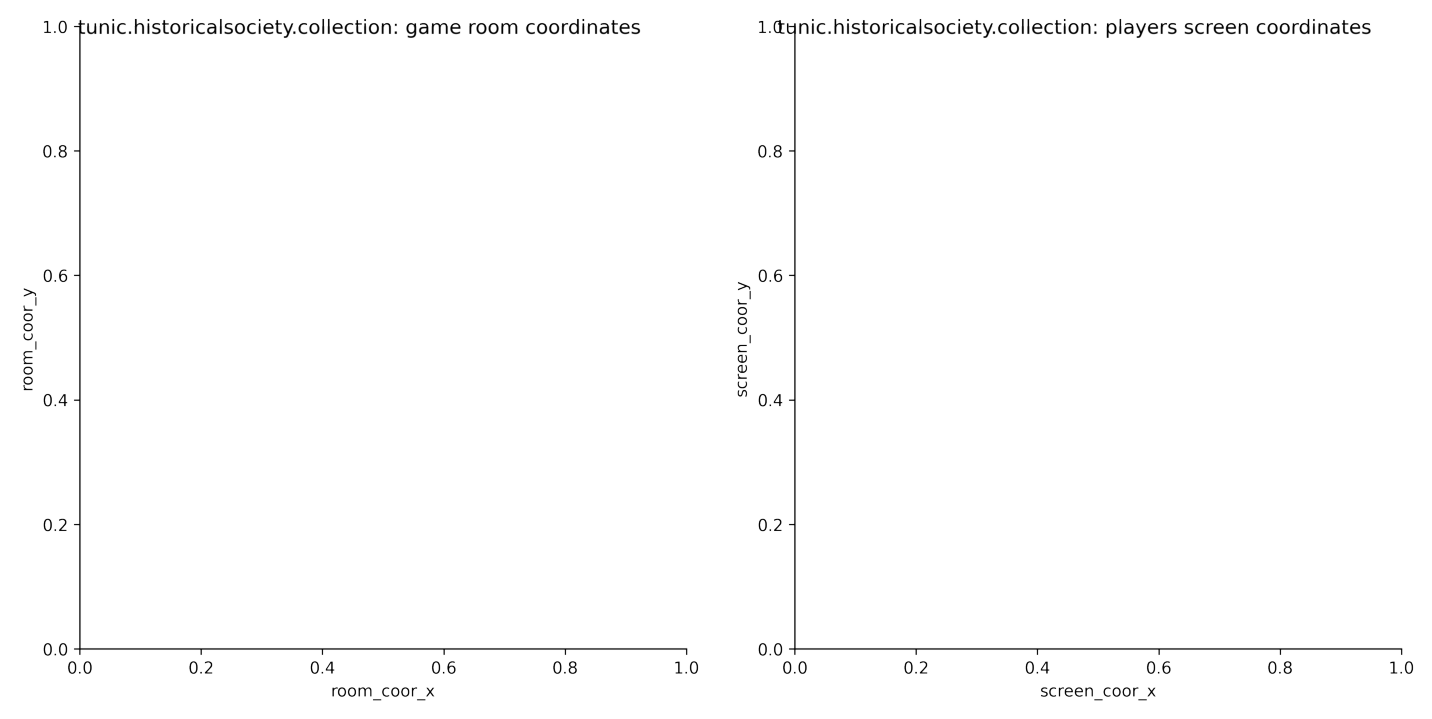

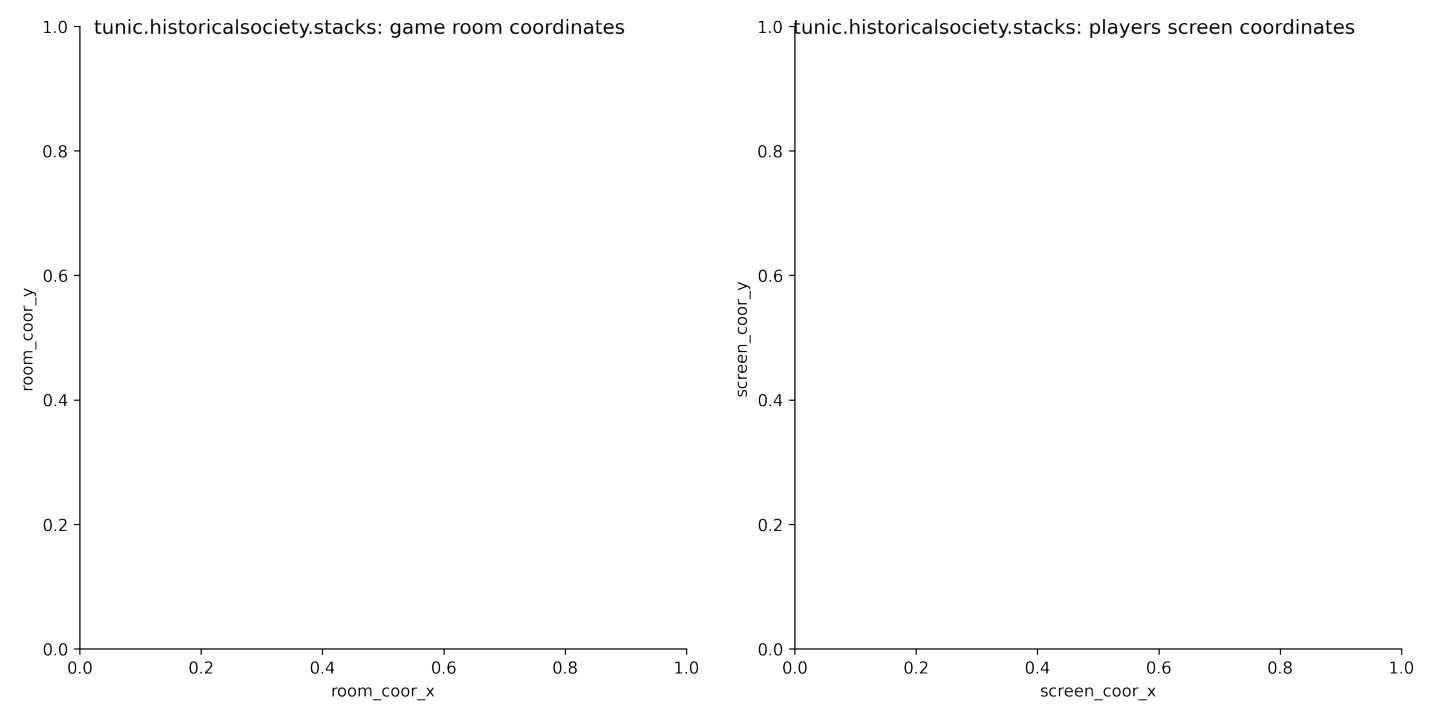

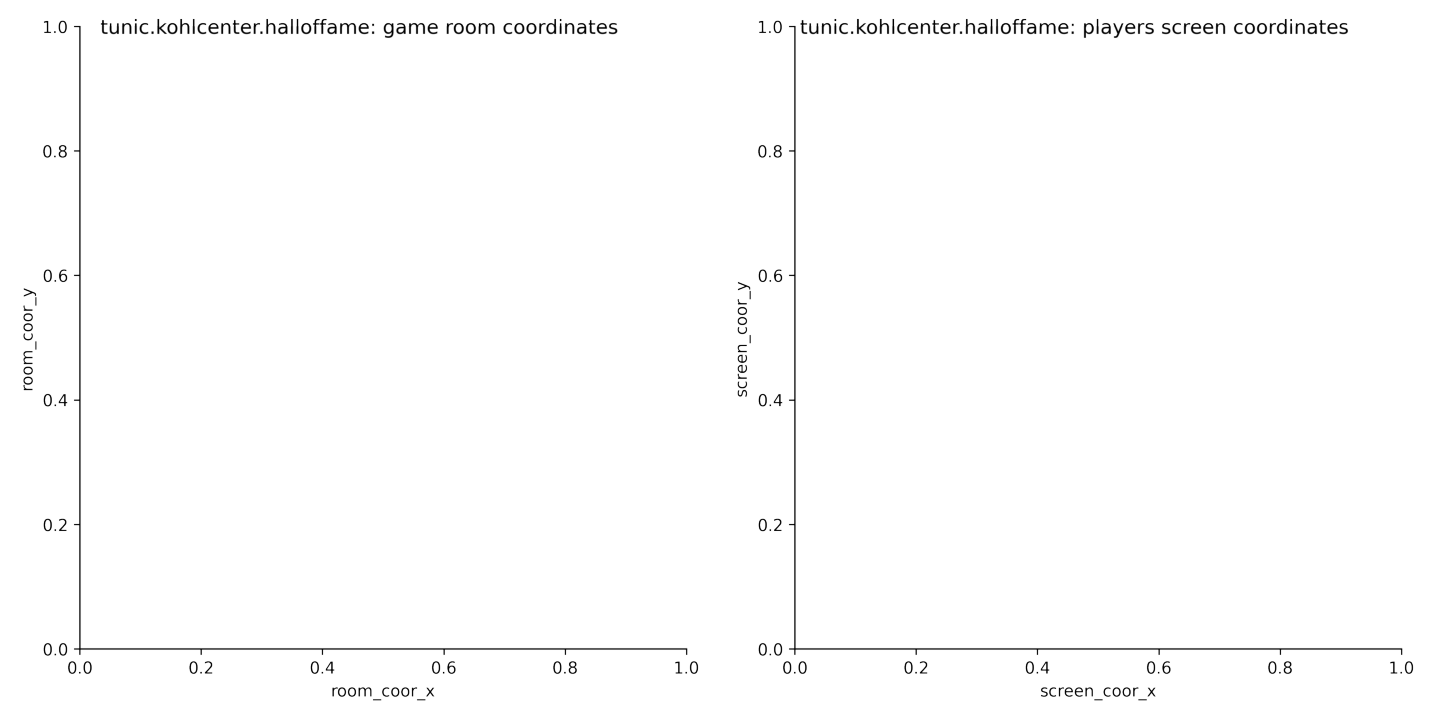

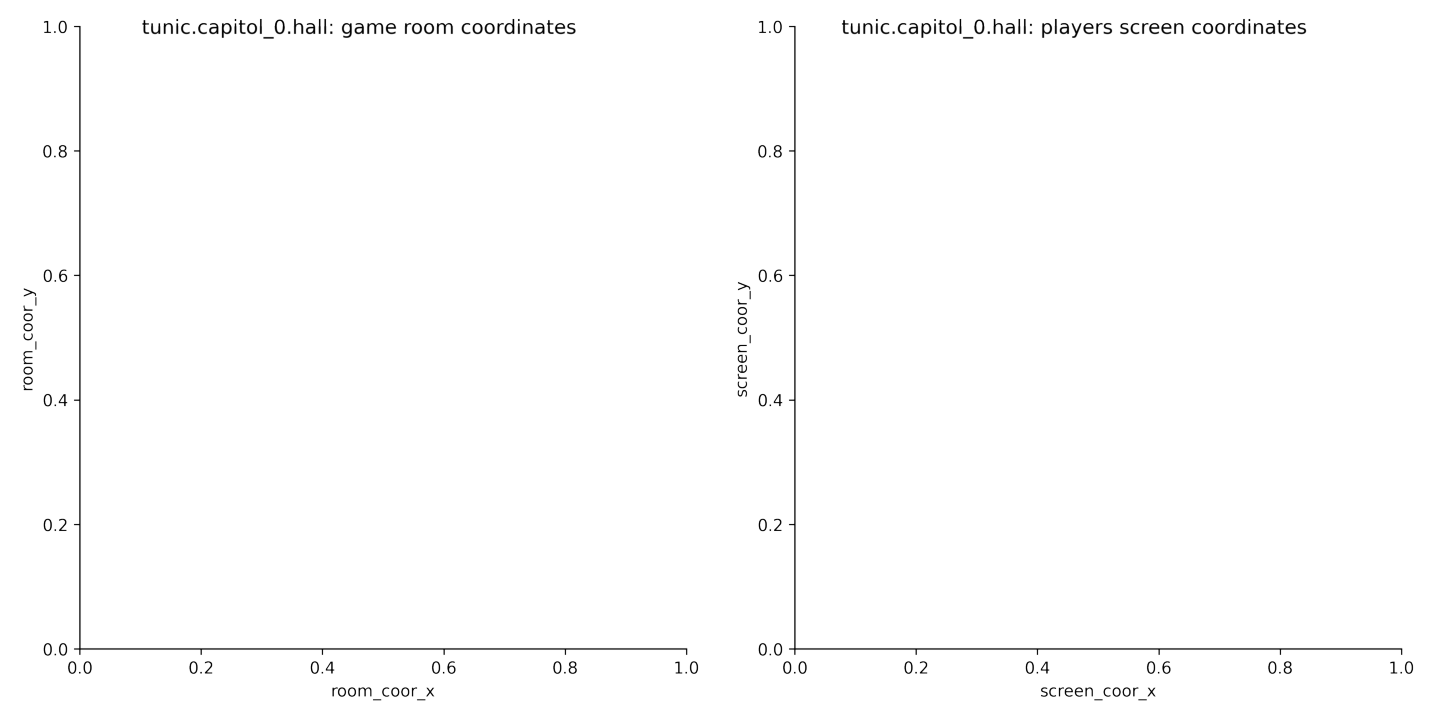

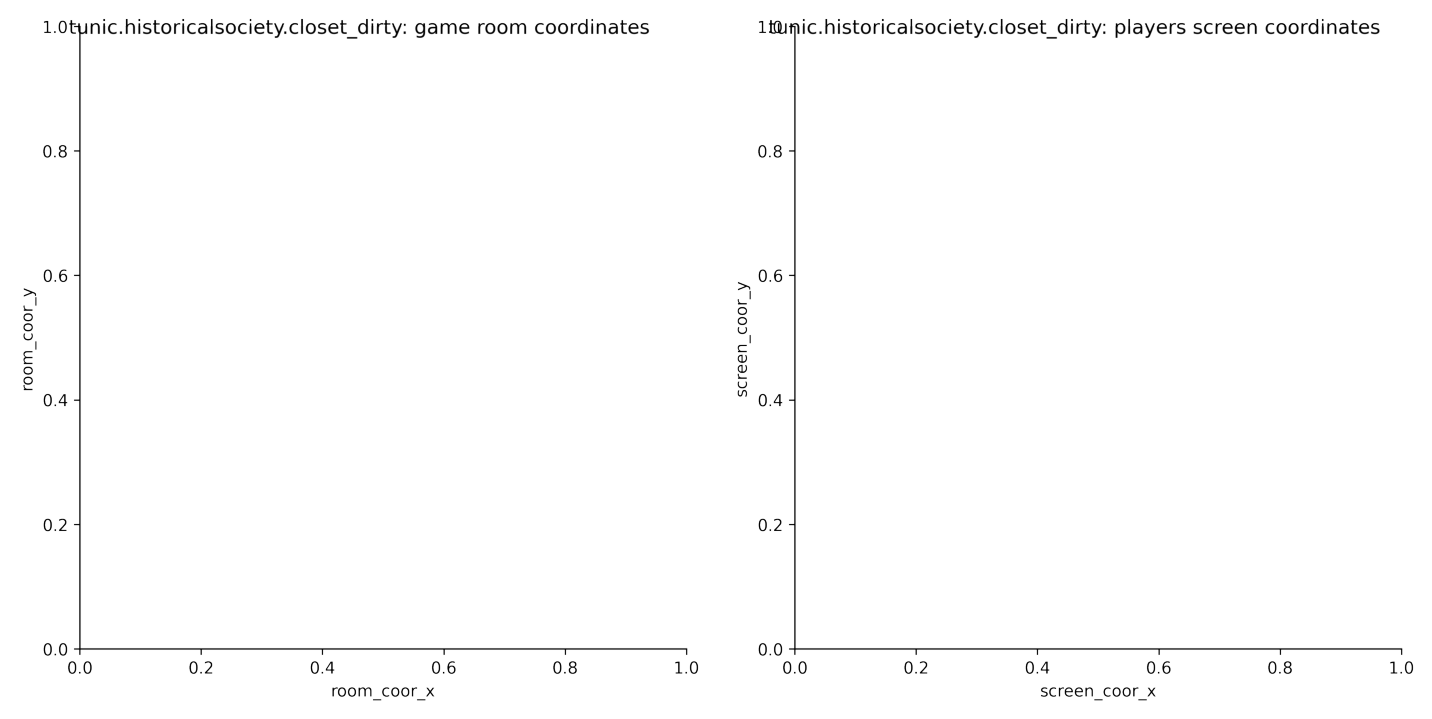

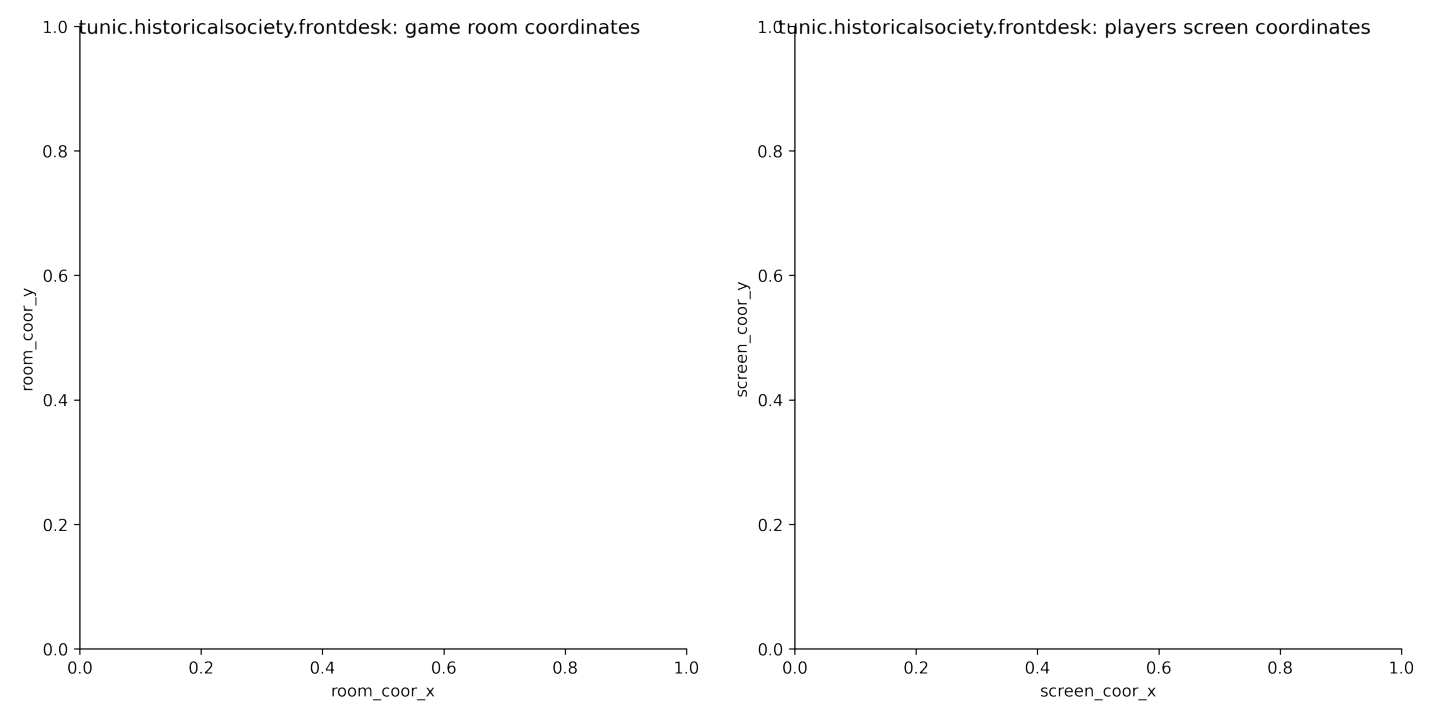

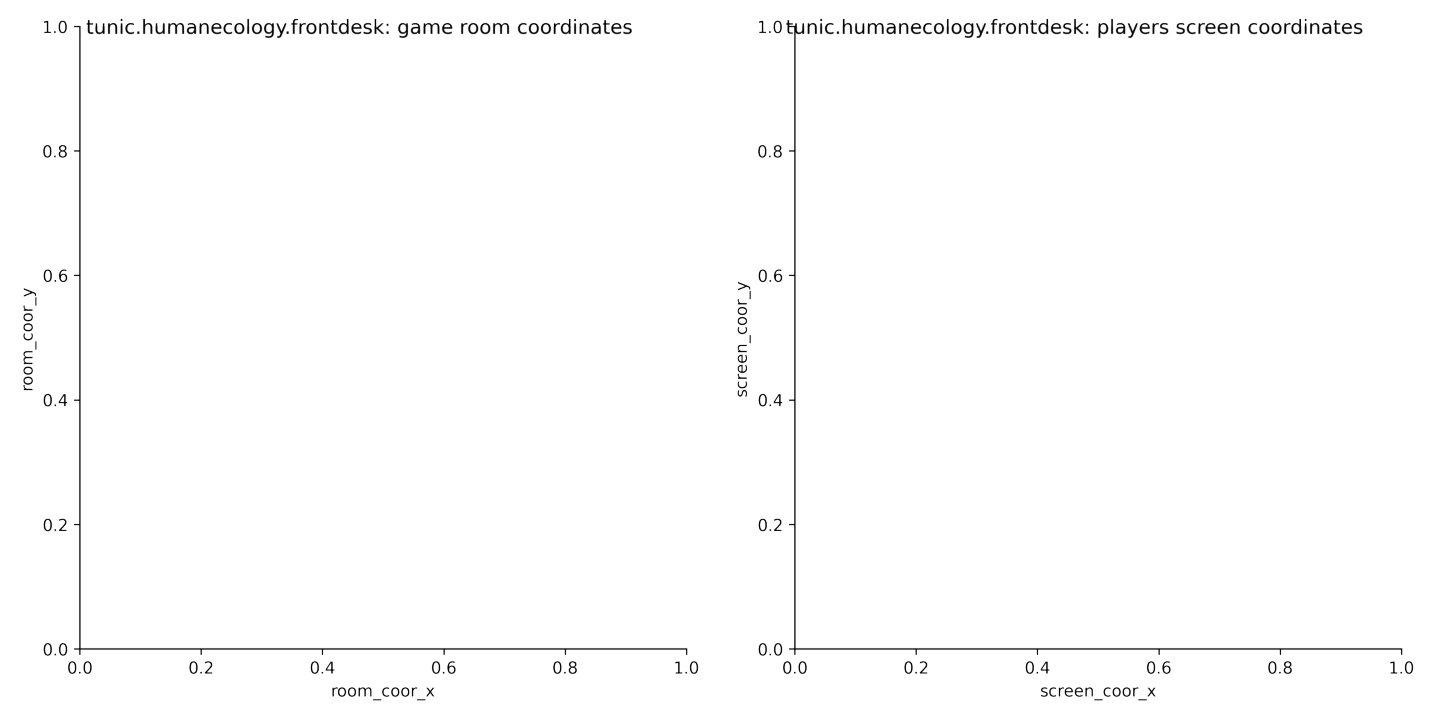

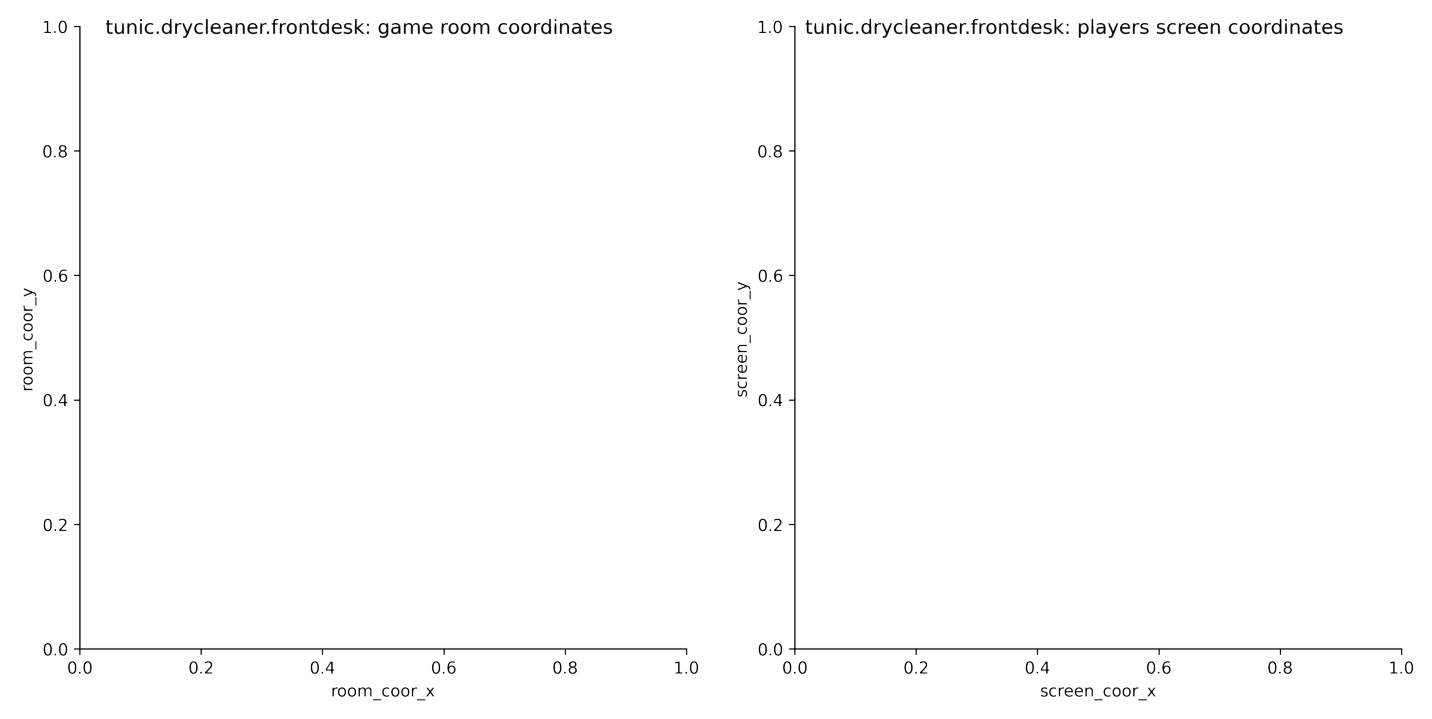

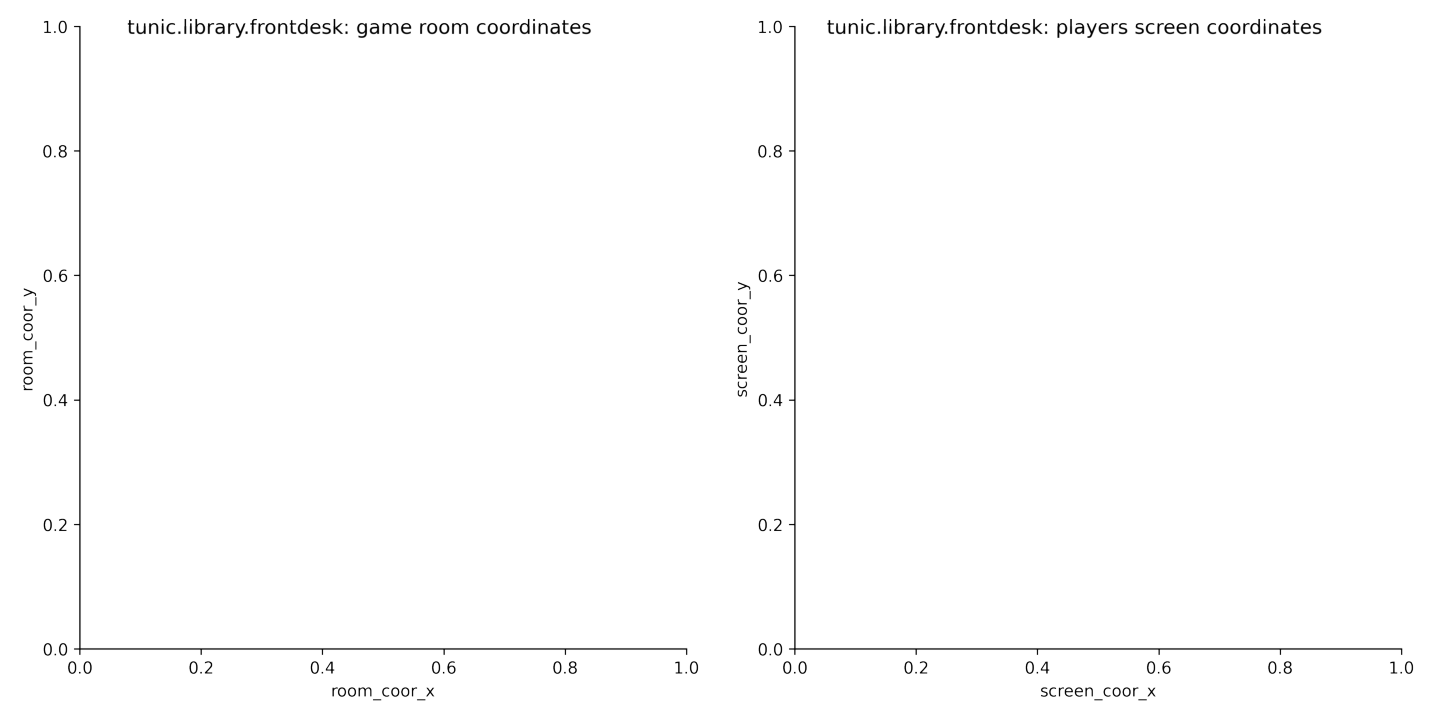

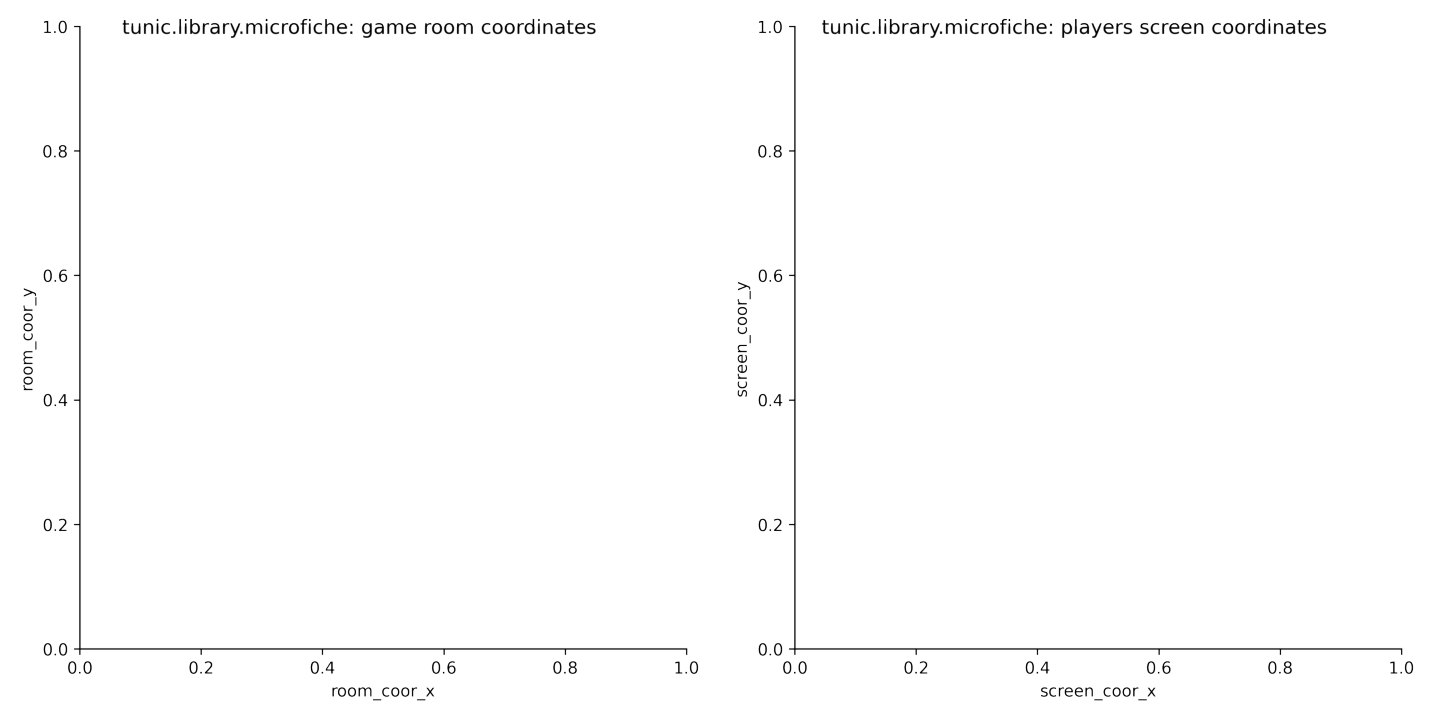

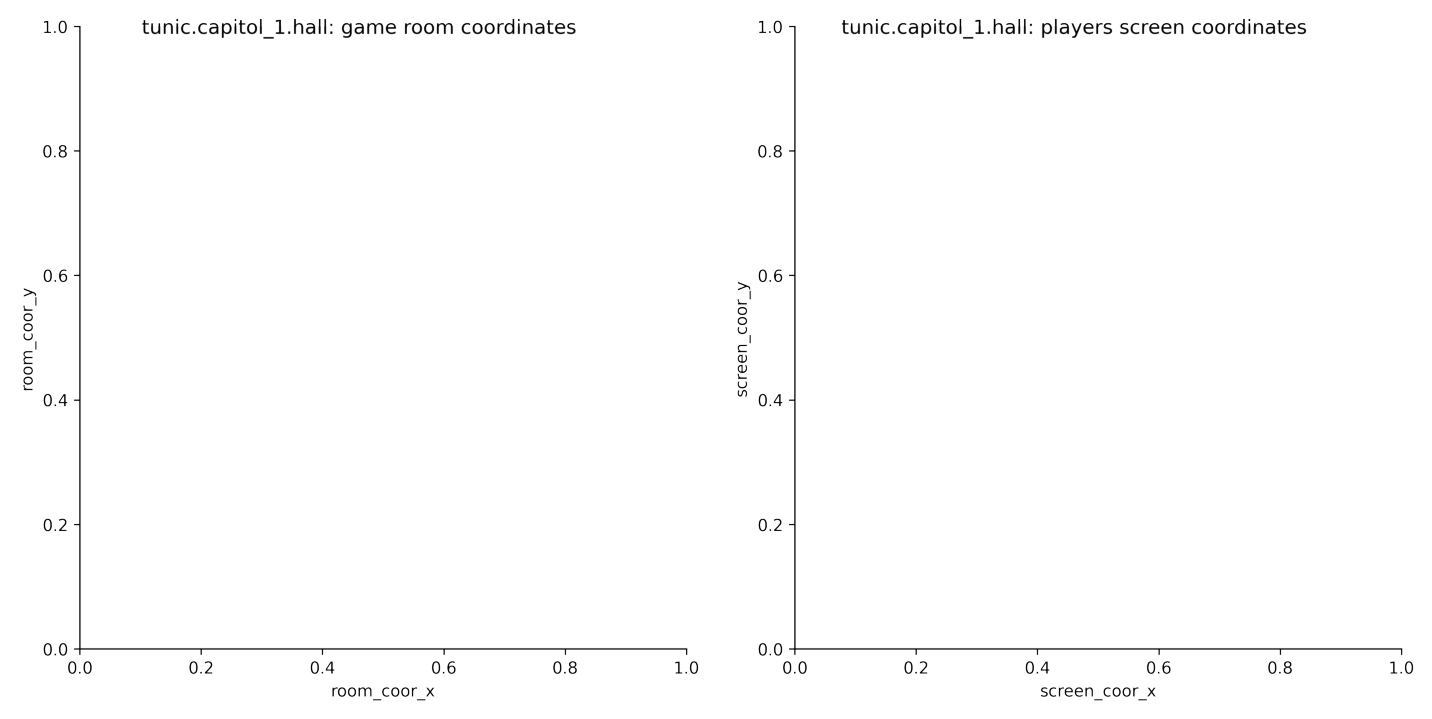

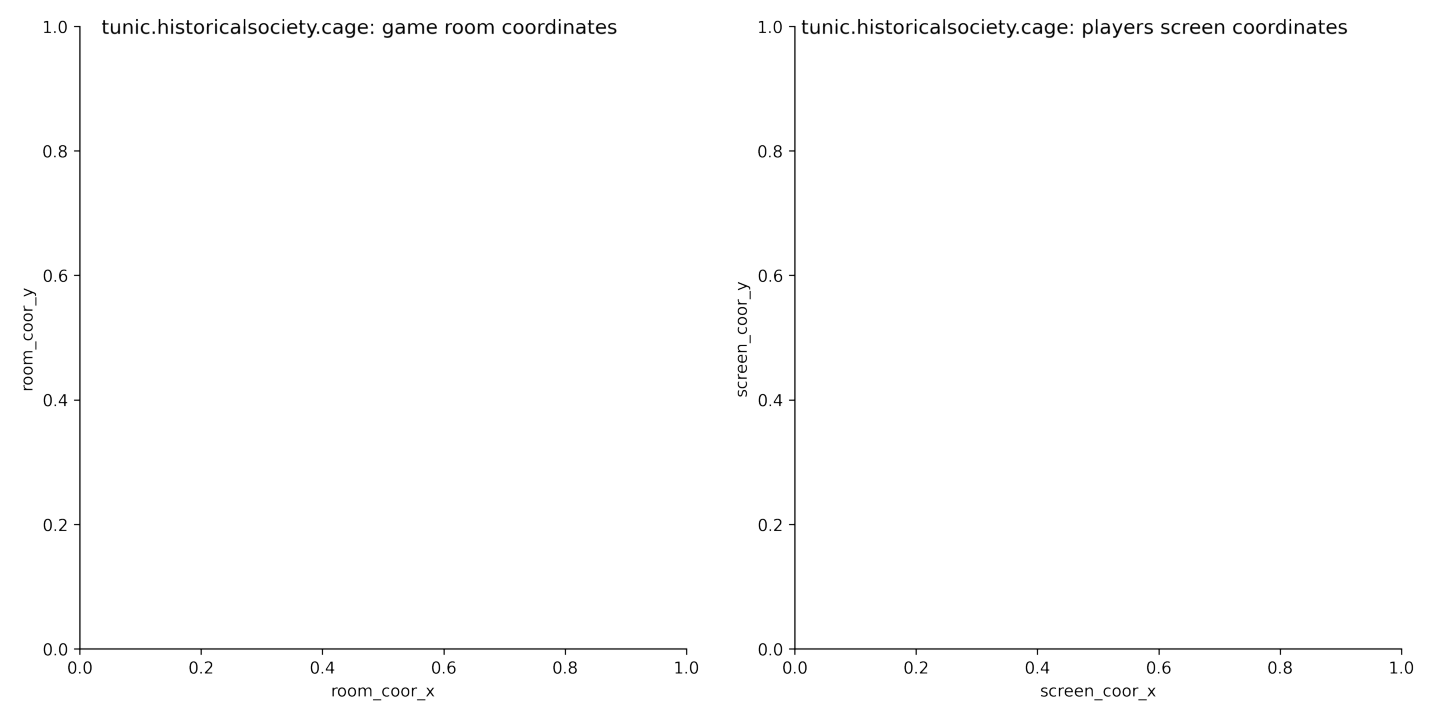

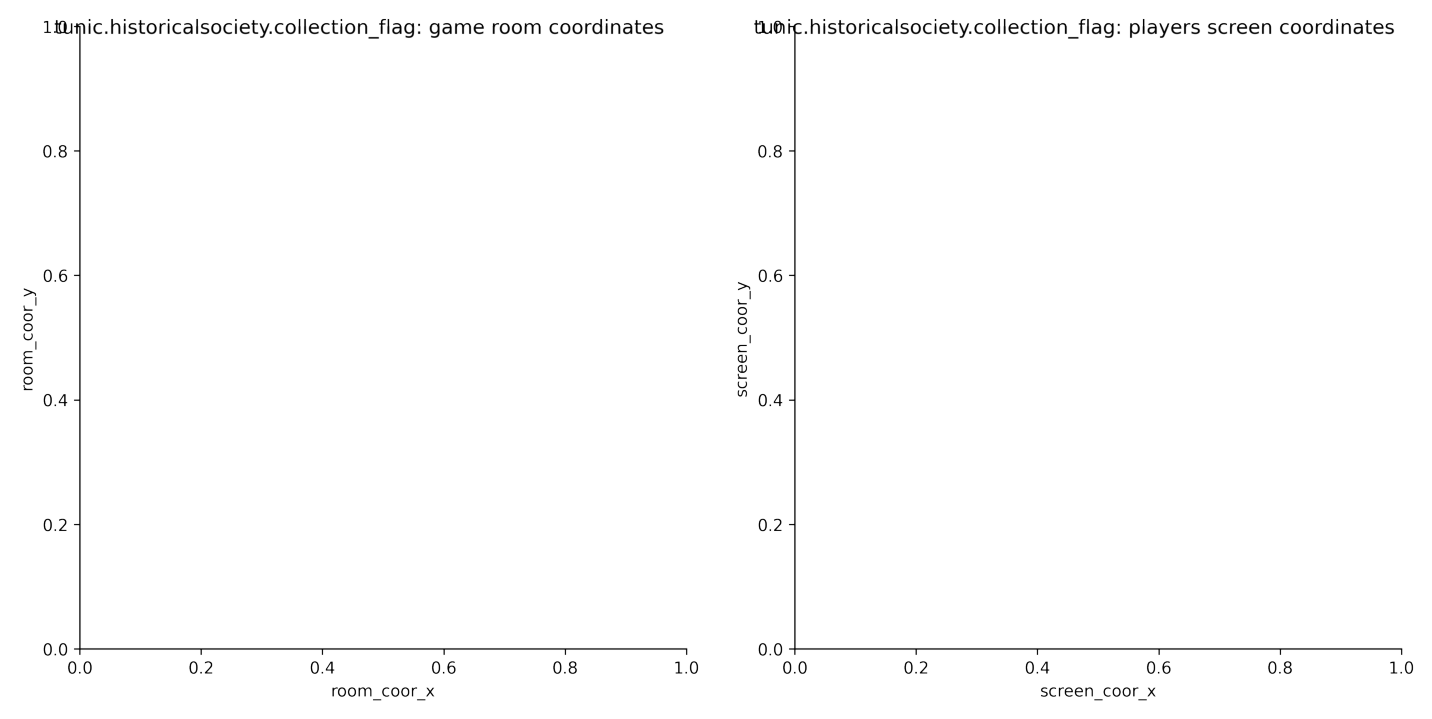

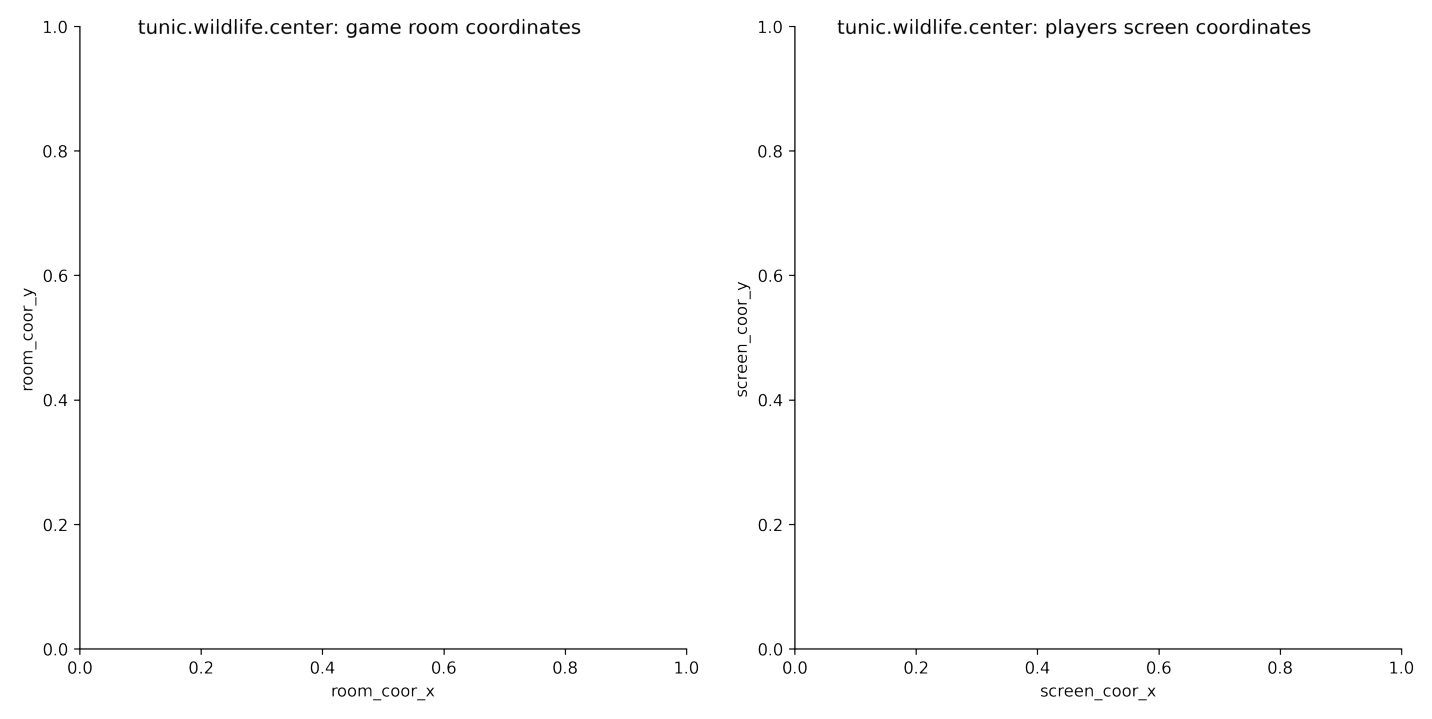

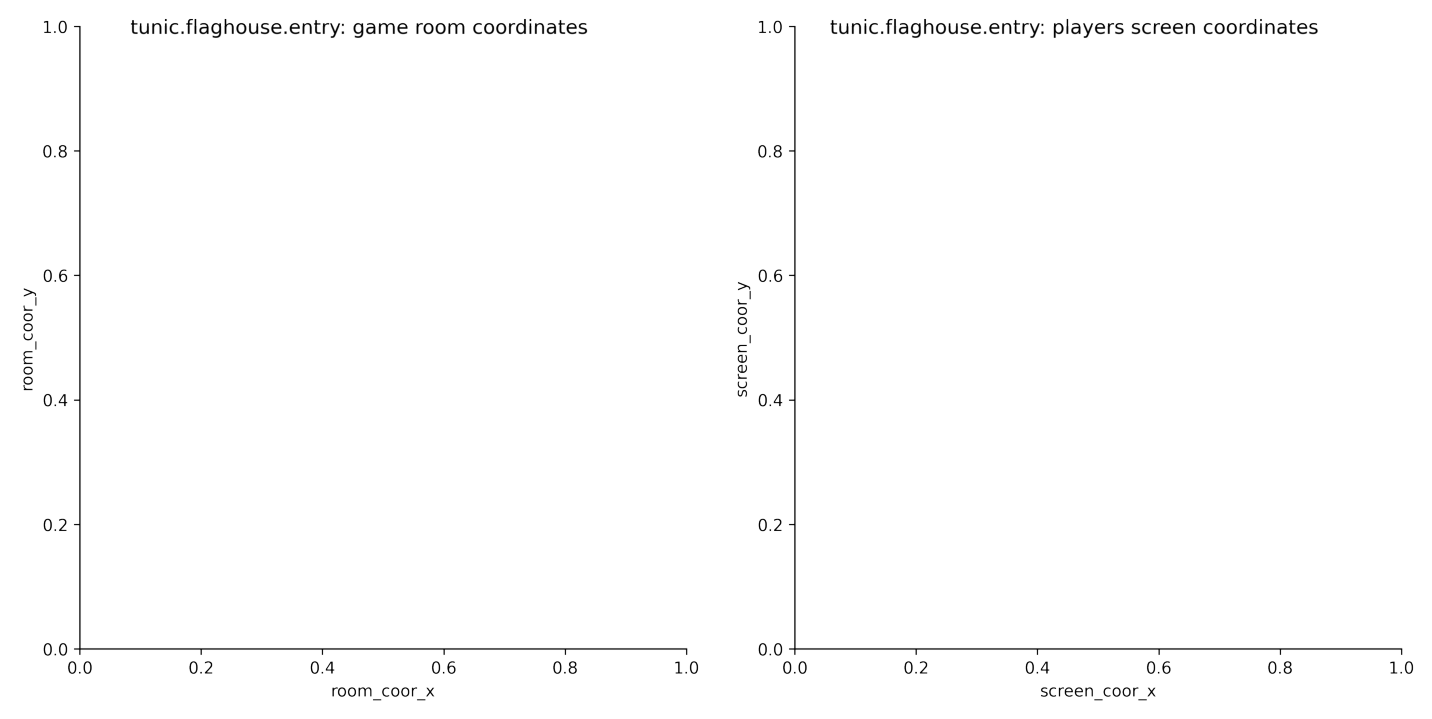

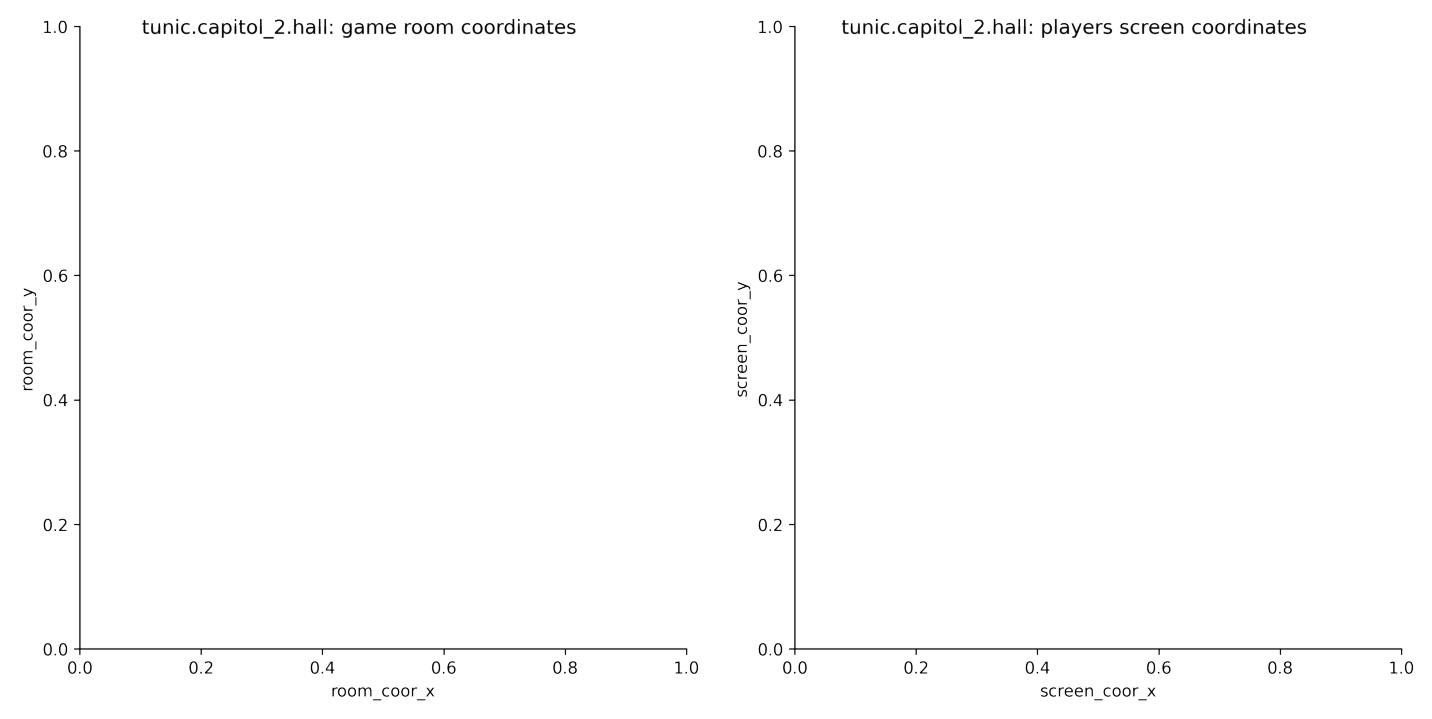

In [40]:
rooms = train['room_fqid'].unique().tolist()
for room in rooms:
    data_room = train[train['room_fqid']==room]
    data_room = data_room[['room_coor_x','room_coor_y','screen_coor_x','screen_coor_y']].dropna().reset_index(drop=True)
    data_room = data_room.apply(pd.to_numeric,errors='coerce')
    g = sns.pairplot(data=data_room,x_vars=['room_coor_x'],y_vars=['room_coor_y'],kind='hist',height=6)
    g.fig.suptitle(f'{room}: game room coordinates')
    g.savefig('../img/g1.png',dpi=300)
    plt.close(g.fig)
    
    g1 = sns.pairplot(data=data_room,x_vars=['screen_coor_x'],y_vars=['screen_coor_y'],kind='hist',height=6)
    g1.fig.suptitle(f'{room}: players screen coordinates')
    g1.savefig('../img/g2.png',dpi=300)
    plt.close(g1.fig)
    
    fig,axs = plt.subplots(1,2,figsize=(20,20))
    axs[0].imshow(mpimg.imread('../img/g1.png'))
    axs[1].imshow(mpimg.imread('../img/g2.png'))
    [axarr.set_axis_off() for axarr in axs.ravel()]
    plt.tight_layout()
    plt.show()
del rooms,data_room

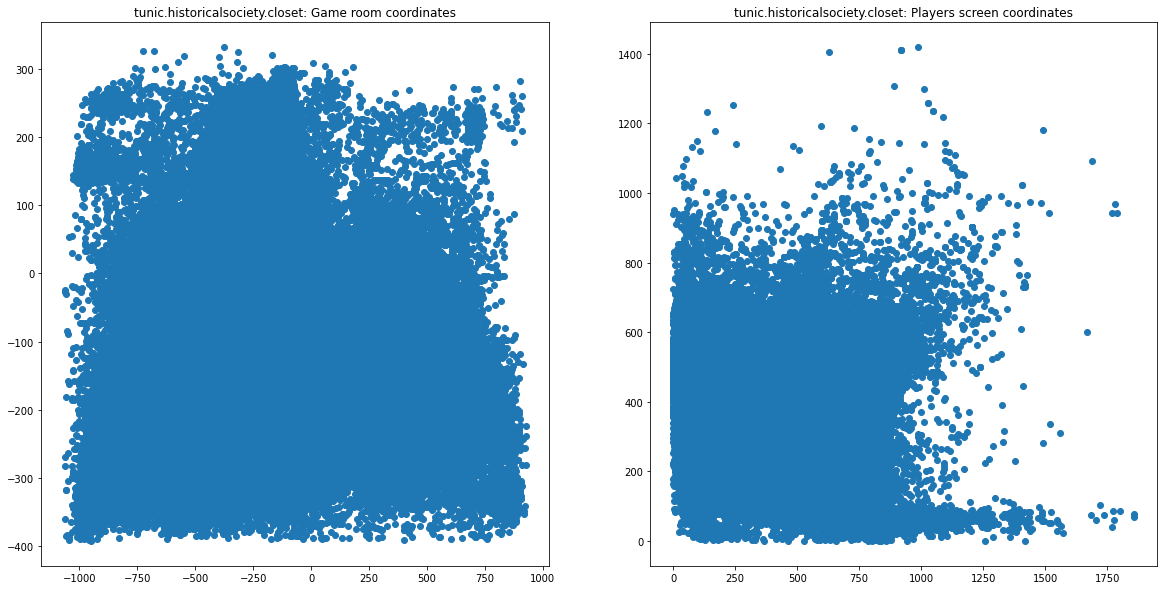

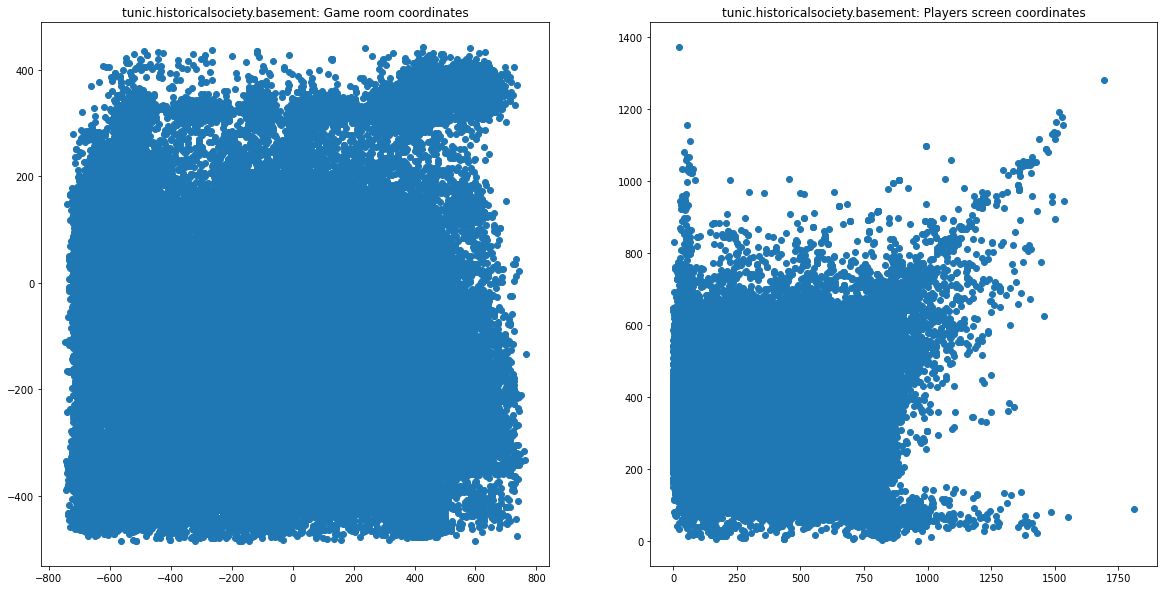

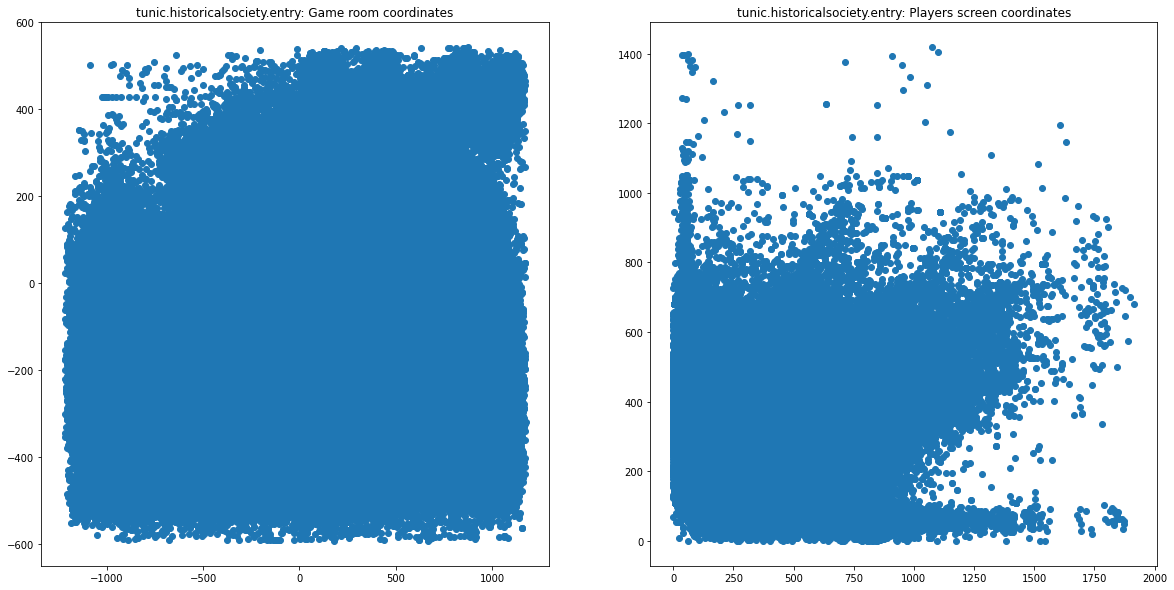

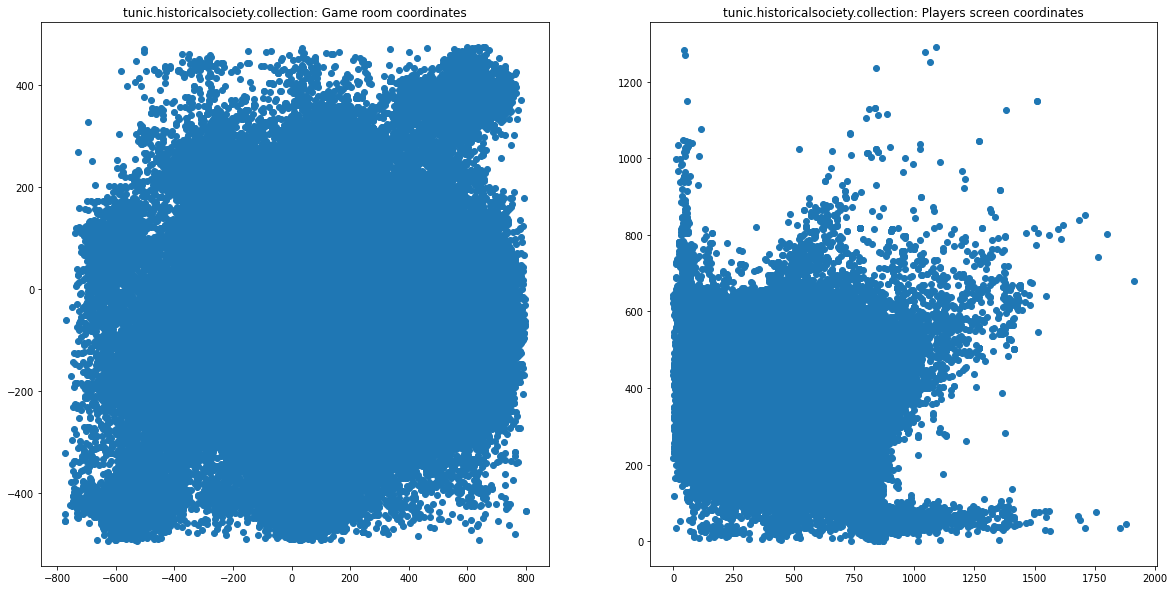

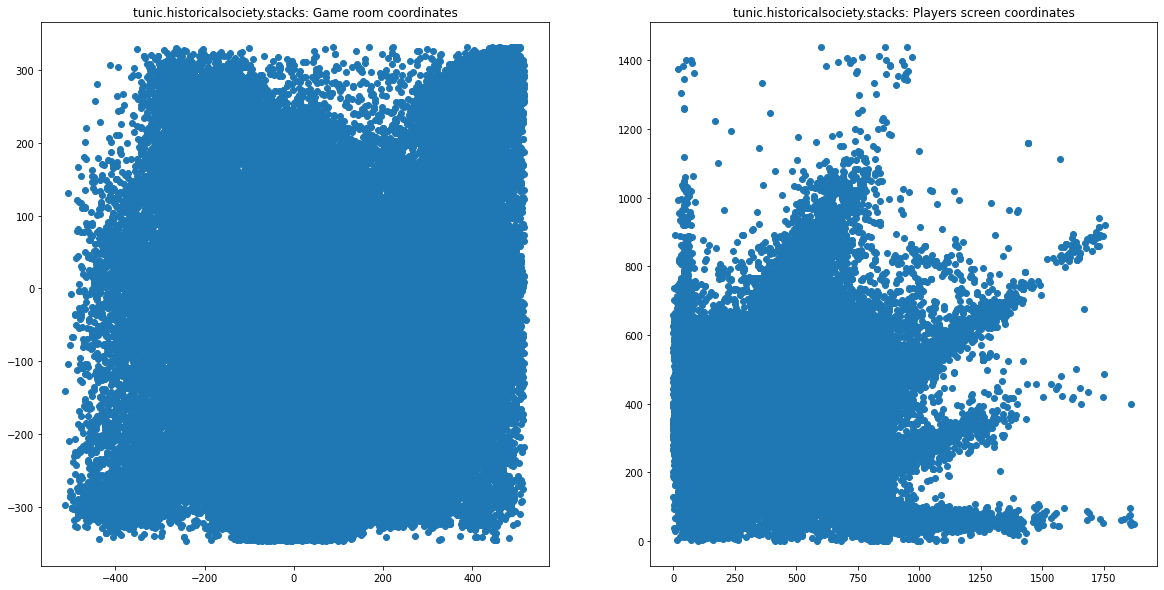

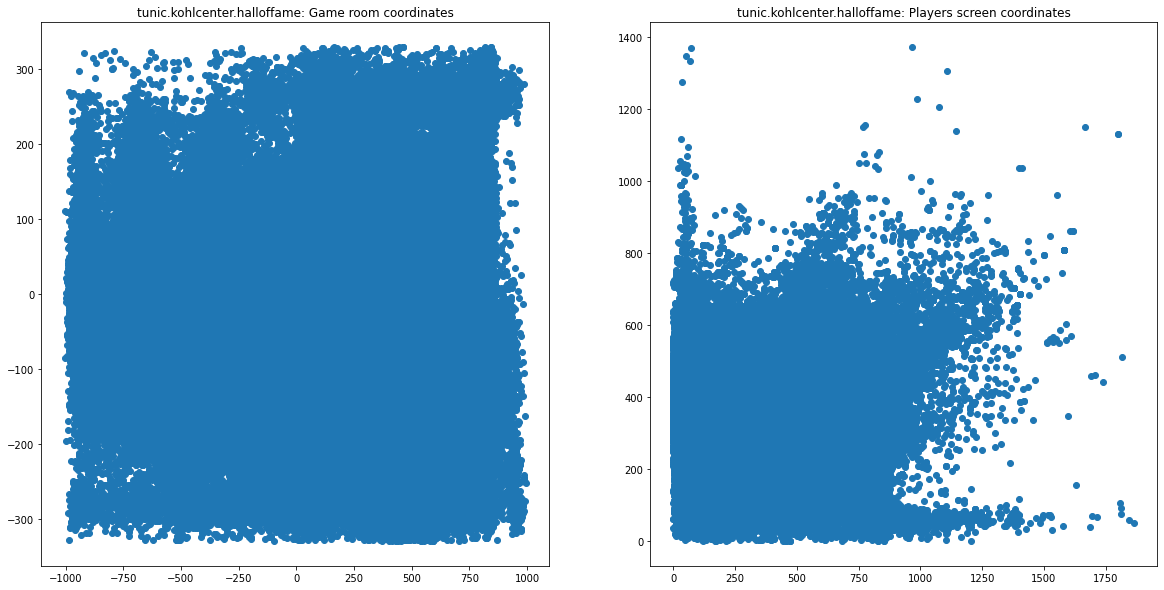

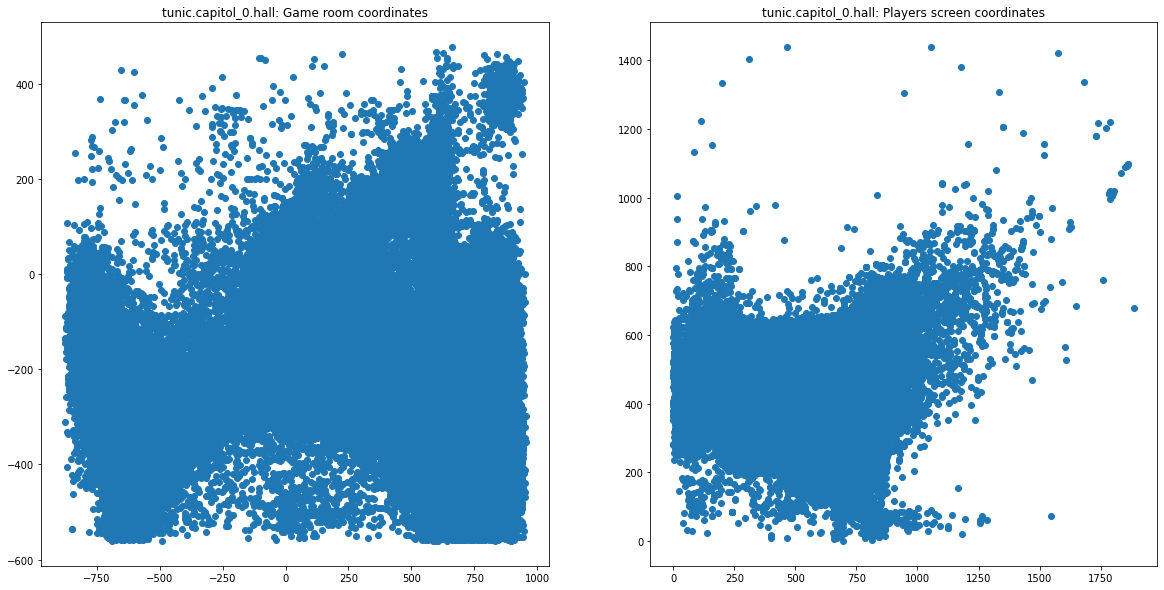

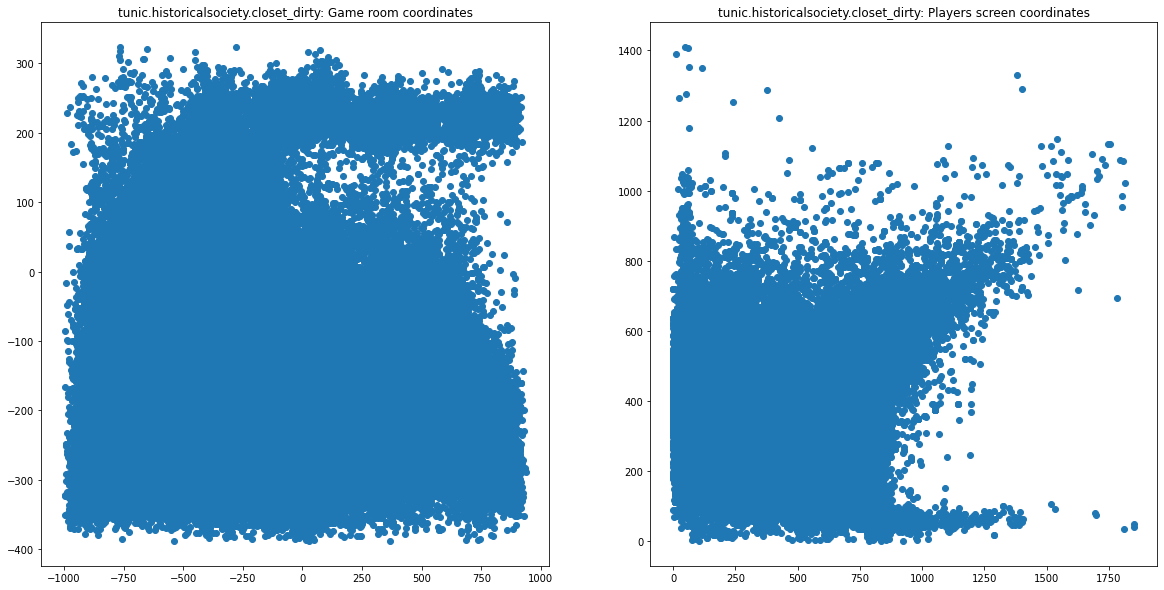

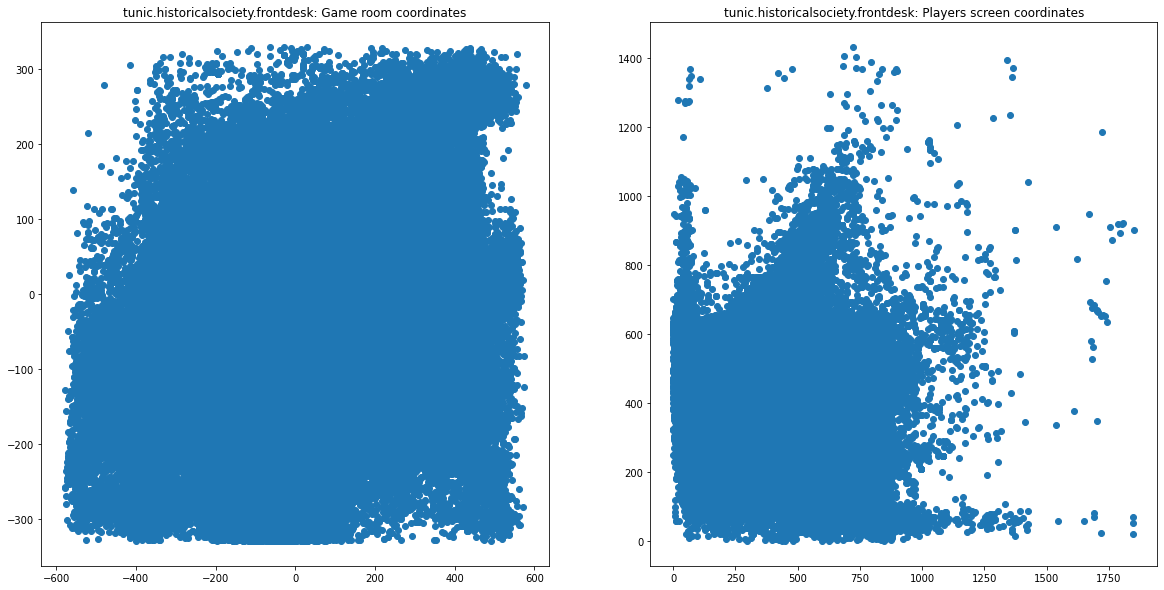

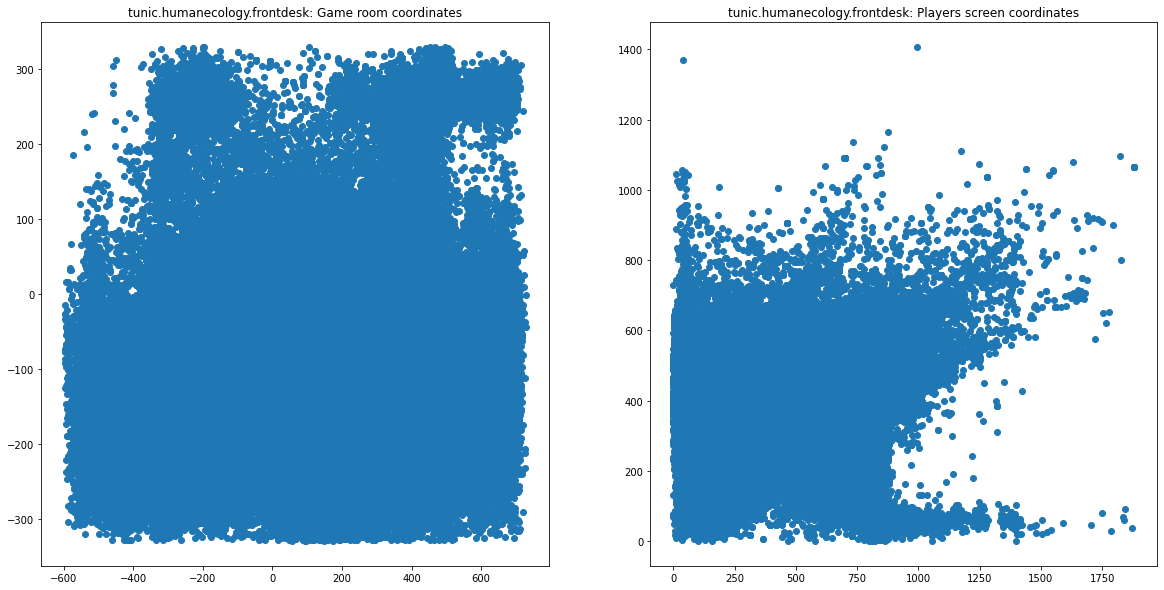

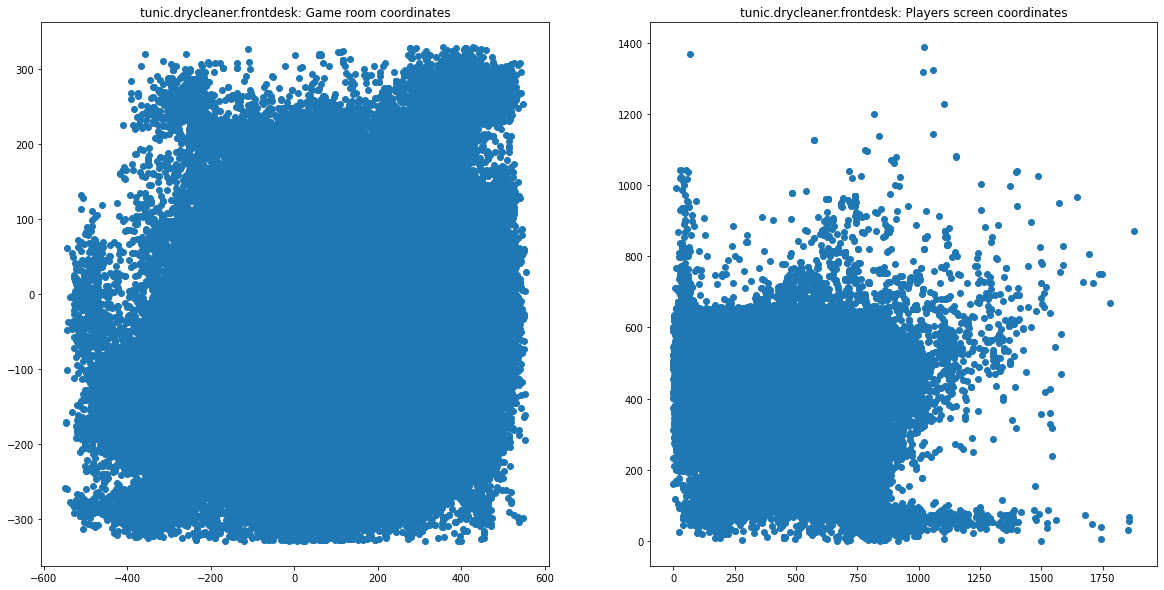

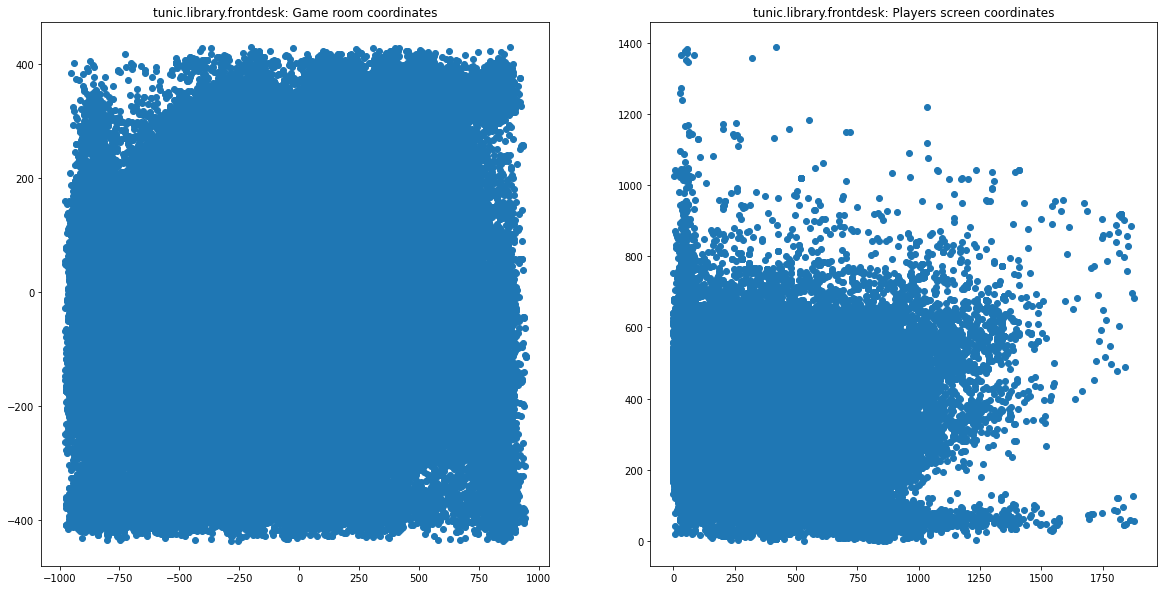

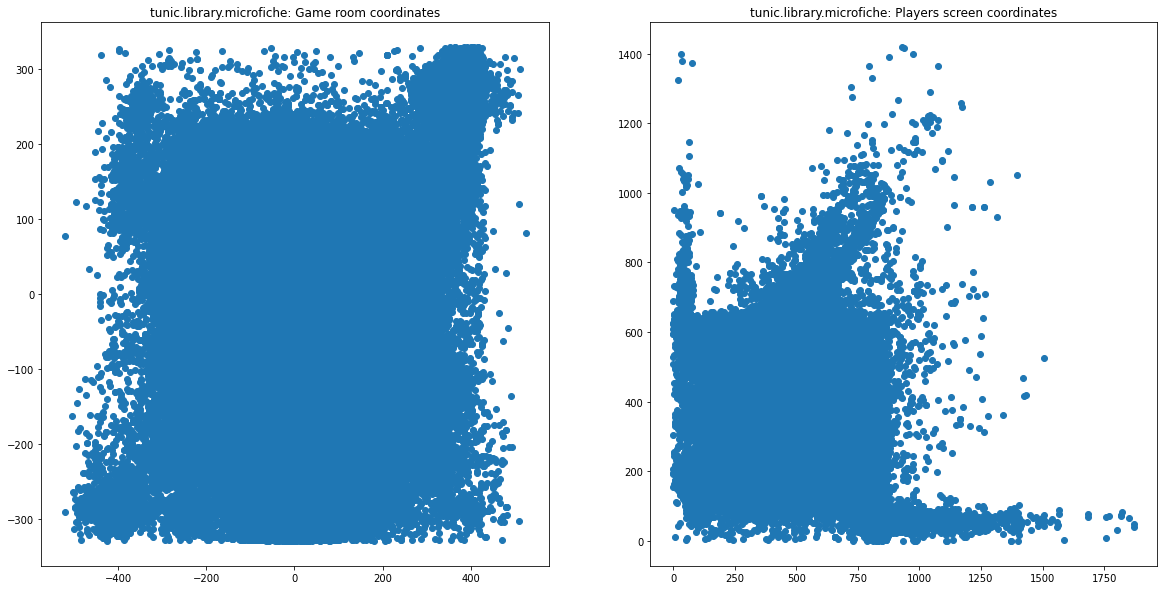

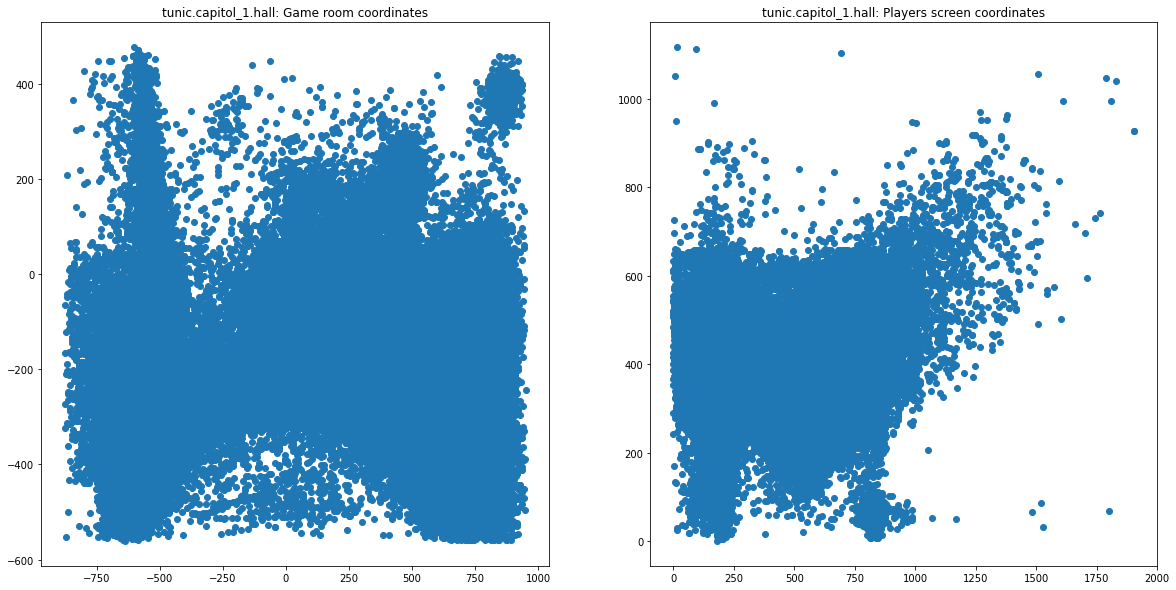

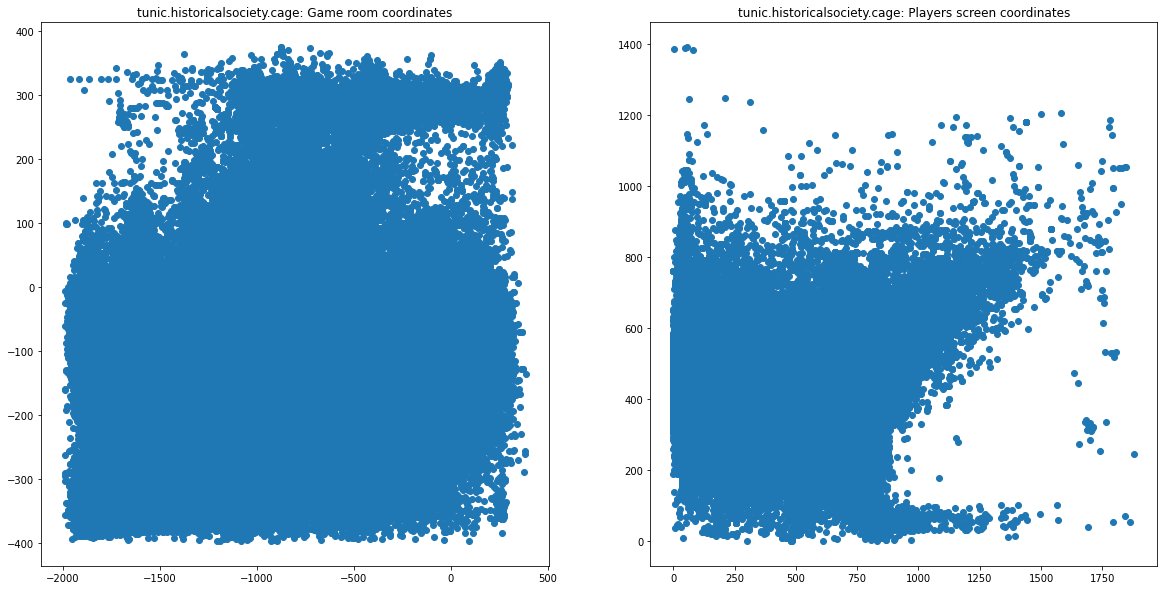

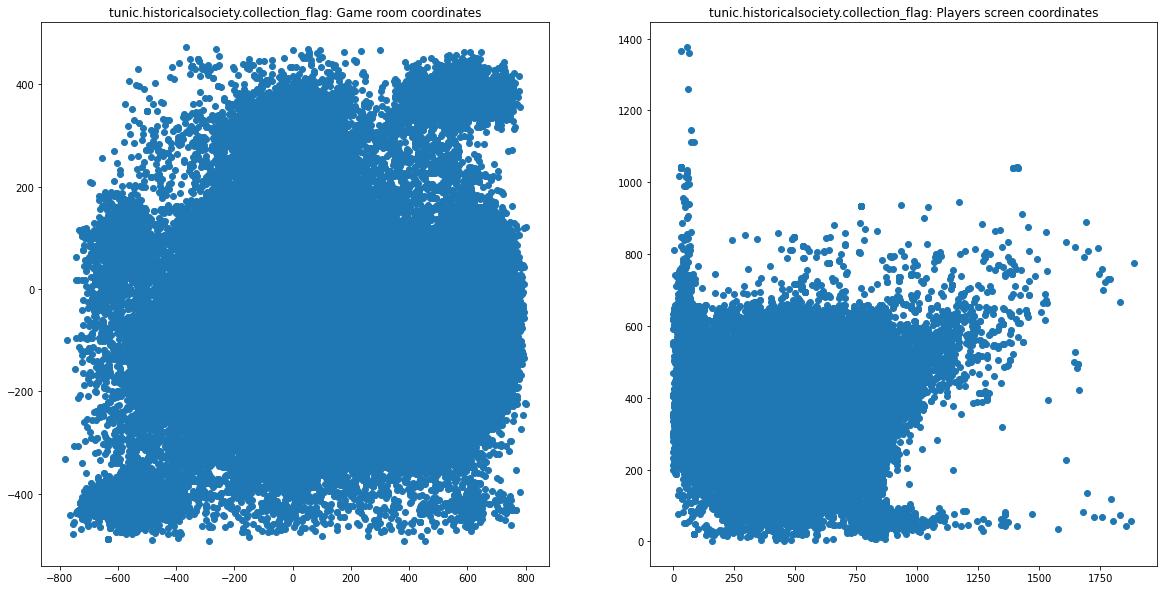

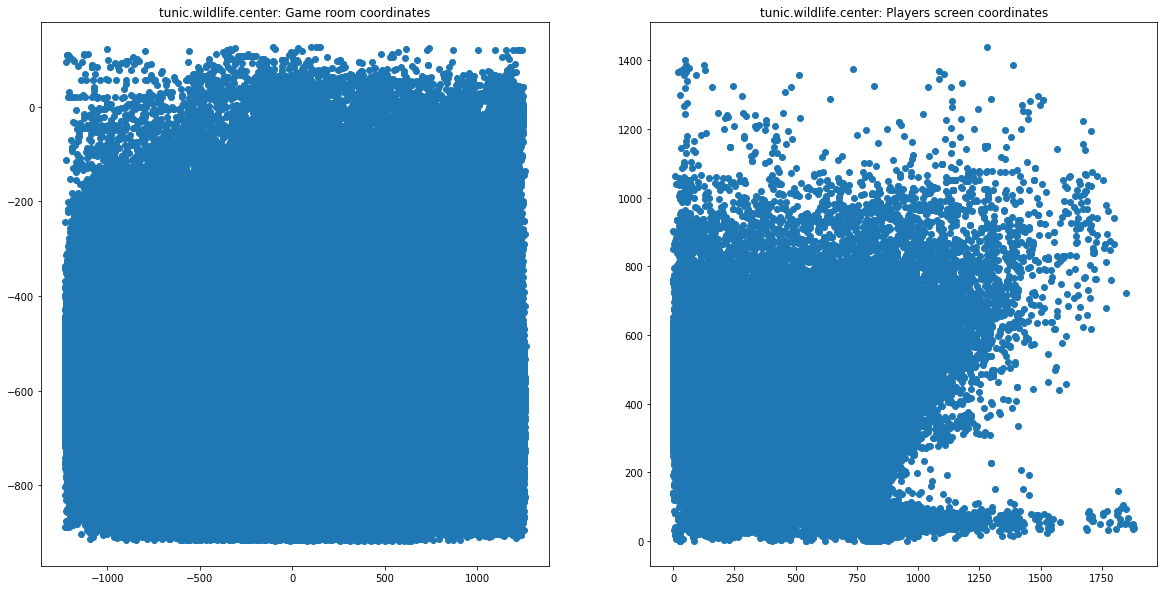

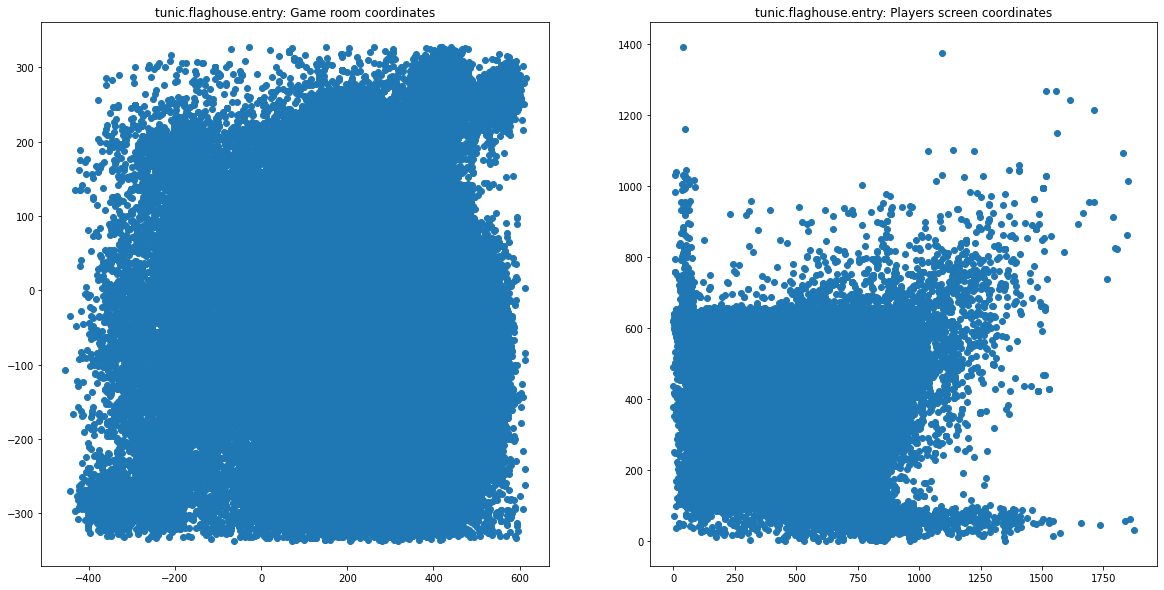

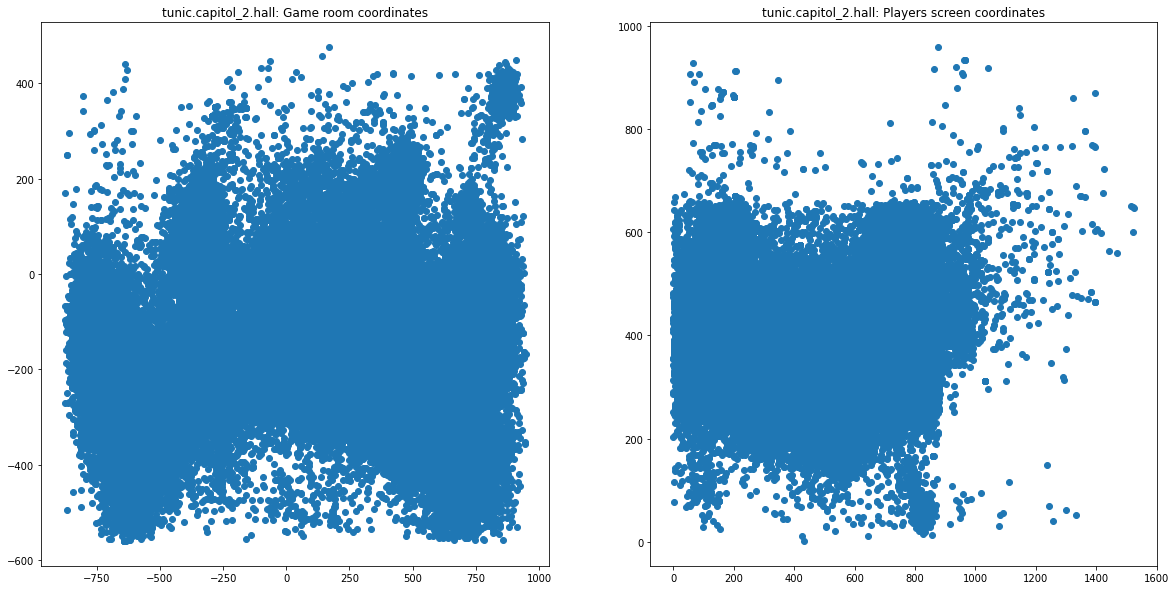

In [46]:
rooms = train['room_fqid'].unique().tolist()
for room in rooms:
    data_room = train[train['room_fqid']==room]
    data_room = data_room[['room_coor_x','room_coor_y','screen_coor_x','screen_coor_y']].dropna().reset_index(drop=True)
    data_room = data_room.apply(pd.to_numeric,errors='coerce')
    fig,axs = plt.subplots(1,2,figsize=(20,10))
    axs[0].scatter(data_room.room_coor_x.values,data_room.room_coor_y.values)
    axs[0].set_title(f'{room}: Game room coordinates')
    
    axs[1].scatter(data_room.screen_coor_x.values,data_room.screen_coor_y.values)
    axs[1].set_title(f'{room}: Players screen coordinates')
    plt.show()
del rooms,room,data_room,axs,fig

In [41]:
def plotGeoLocation(df,session_id):
    session_df = df[df['session_id']==session_id]
    rooms = session_df['room_fqid'].unique().tolist()
    for room in rooms:
        session_df_room = session_df[session_df['room_fqid']==room]
        session_df_room = session_df_room[['room_coor_x','room_coor_y','screen_coor_x','screen_coor_y']].dropna().reset_index(drop=True)
        plt.figure(figsize=(20,10))
        
        x = session_df_room['room_coor_x']
        y = session_df_room['room_coor_y']
        plt.subplot(1,5,(1,3))
        plt.plot(x,y,zorder=0,lw=0.5,color='steelblue')
        plt.scatter(x,y,s=5,color='grey')
        plt.scatter(x[0],y[0],s=200,lw=5,color='gold',marker='*')
        plt.scatter(x[-1:],y[-1:],s=200,lw=5,color='crimson',marker='*')
        plt.title(f'{session_id}: {room} (room)')
        plt.legend(['Cursor','Click Postion','Start','End'])
        plt.gca().set_aspect('equal',adjustable='box')
        plt.xlim(-2000,1300)
        plt.ylim(-920,950)
        plt.xlabel('room_cool_x')
        plt.ylabel('room_cool_y')
        
        x = session_df_room['screen_coor_x']
        y = session_df_room['screen_coor_y']
        plt.subplot(1,5,(4,5))
        plt.plot(x,y,zorder=0,lw=0.5,color='lightcoral')
        plt.scatter(x,y,s=5,color='grey')
        plt.scatter(x[0],y[0],s=200,lw=5,color='gold',marker='*')
        plt.scatter(x[-1:],y[-1:],s=200,lw=5,color='crimson',marker='*')
        plt.title(f'{session_id}: {room} (screen)')
        plt.legend(['Crusor','Click','Postion','Start','End'])
        plt.gca().set_aspect('equal',adjustable='box')
        plt.xlabel('screen_coor_x')
        plt.ylabel('screen_coor_y')
        plt.xlim(0,2000)
        plt.ylim(0,1500)
        plt.tight_layout()
        plt.show()

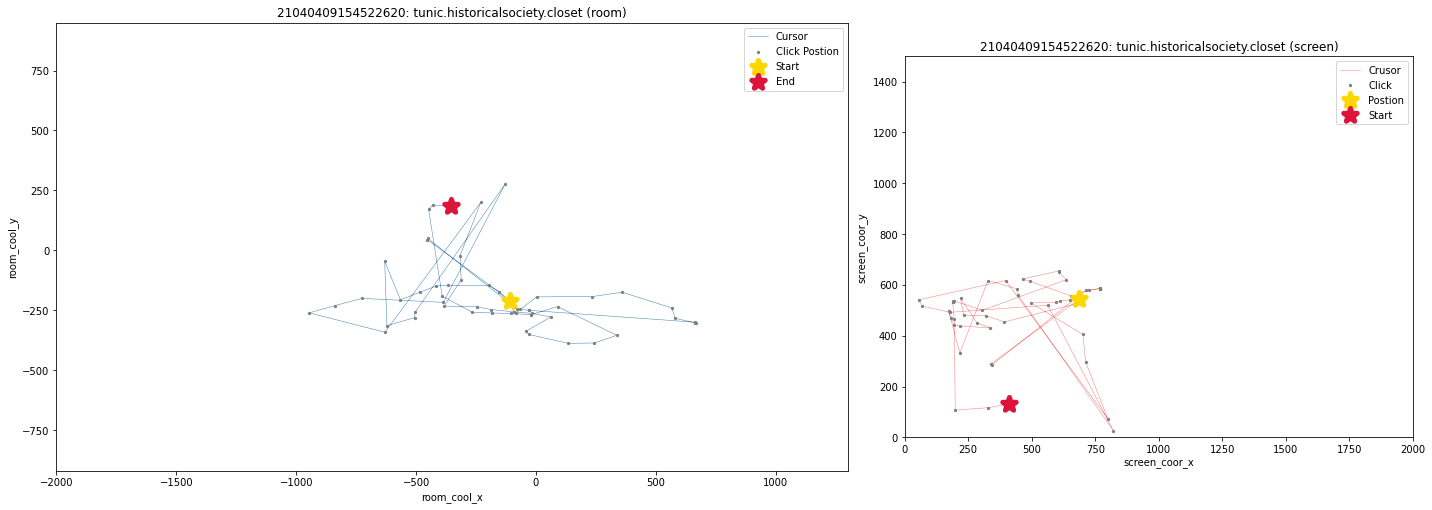

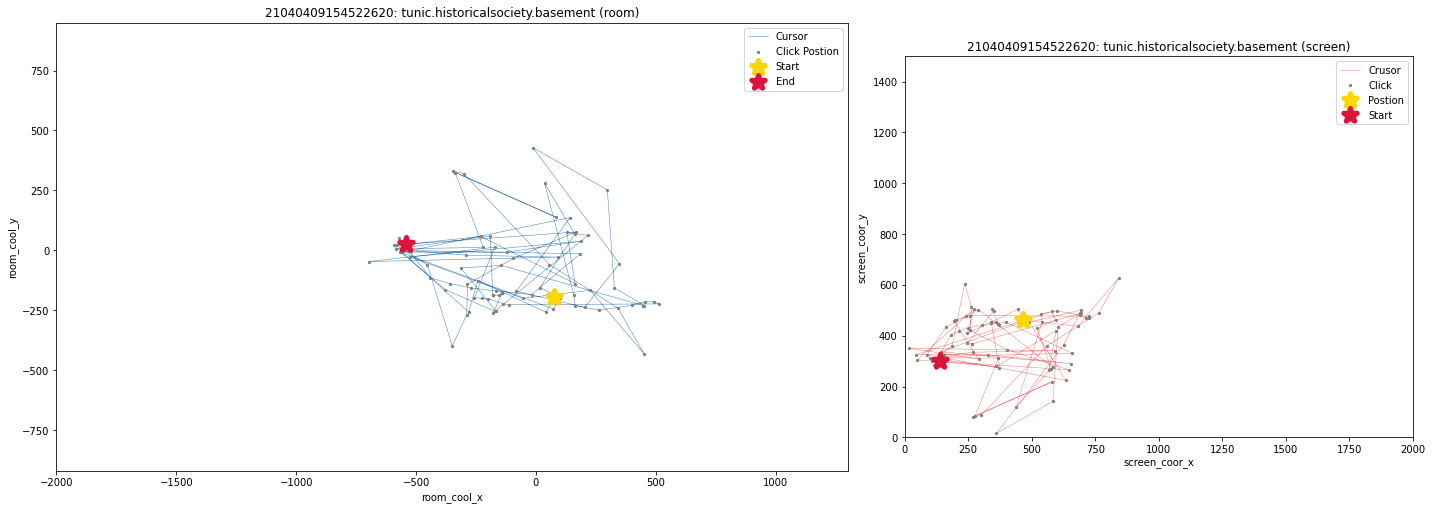

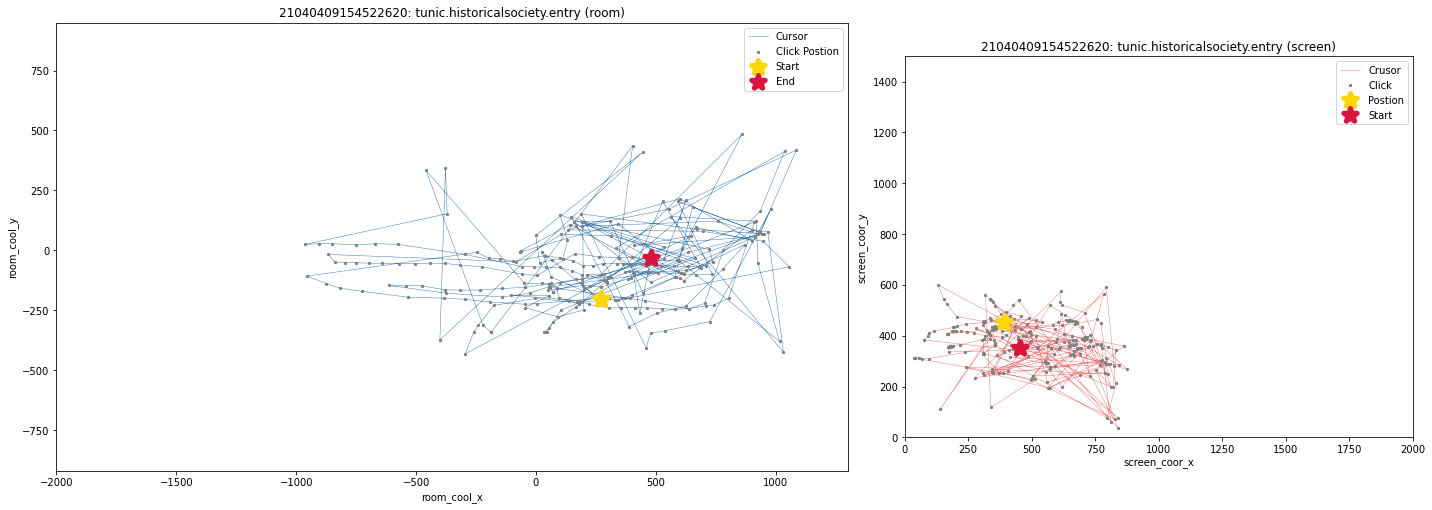

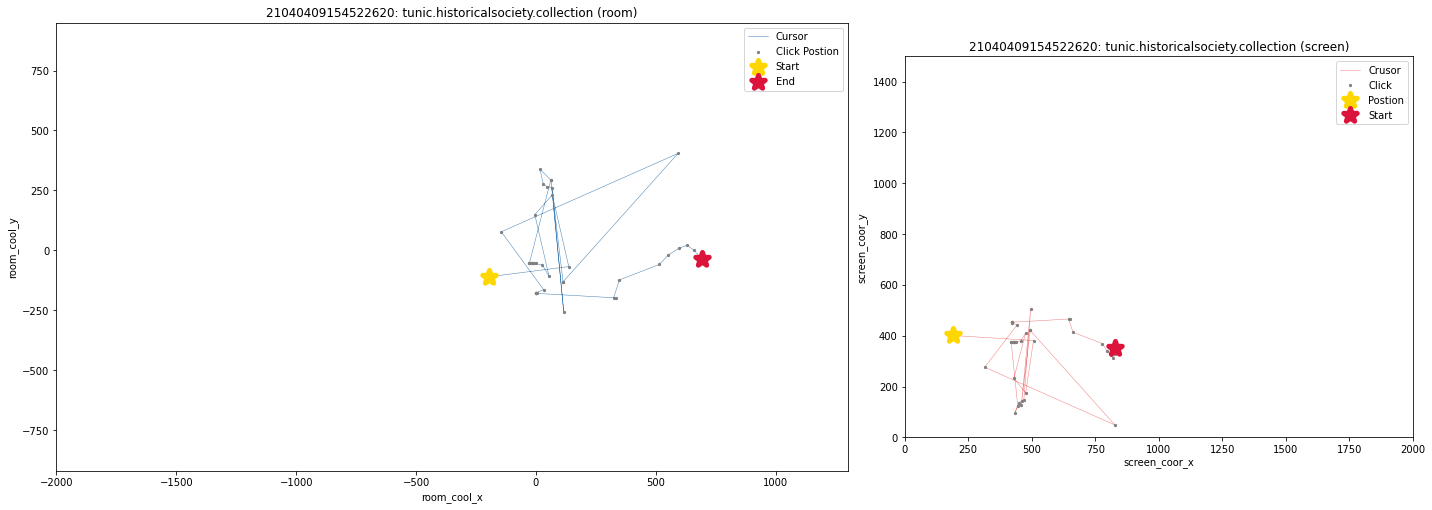

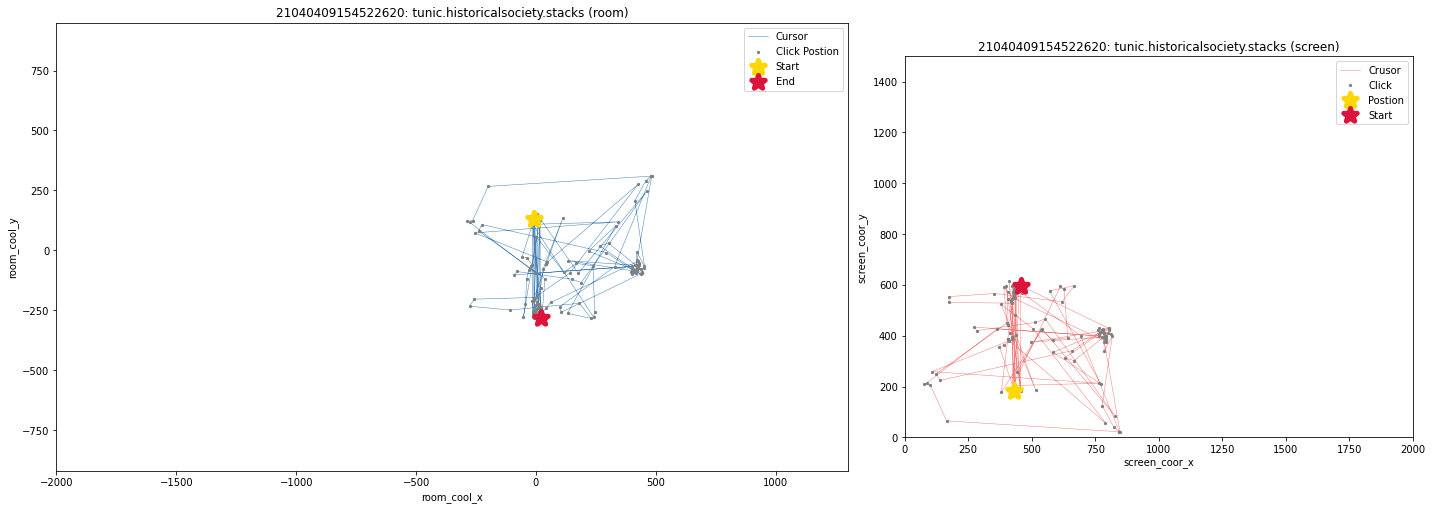

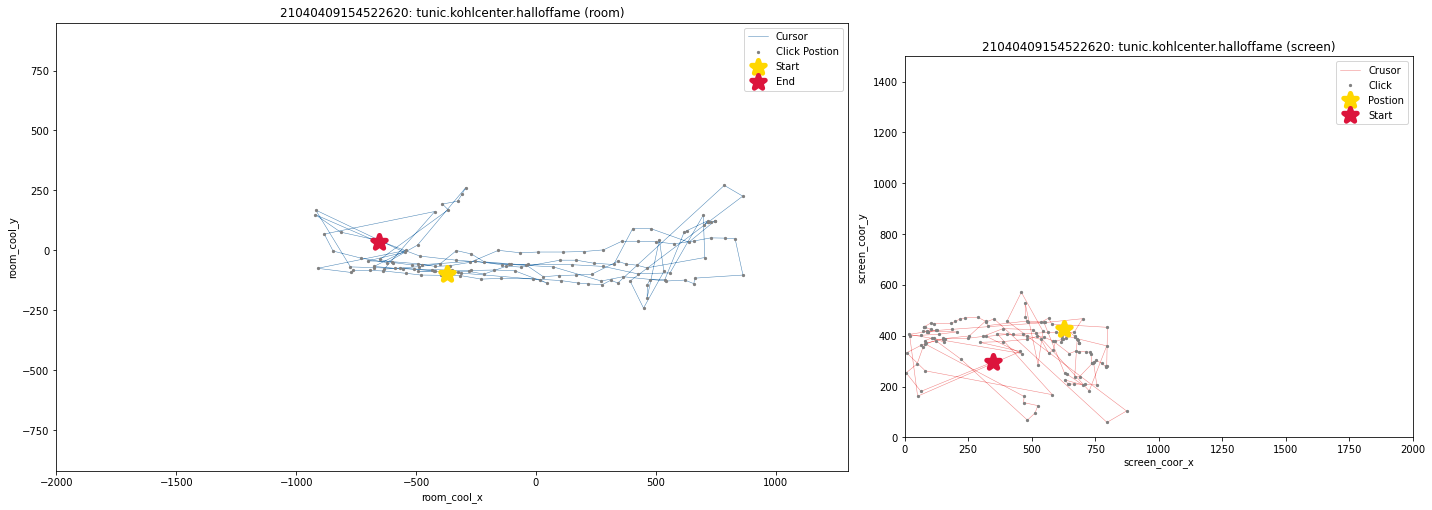

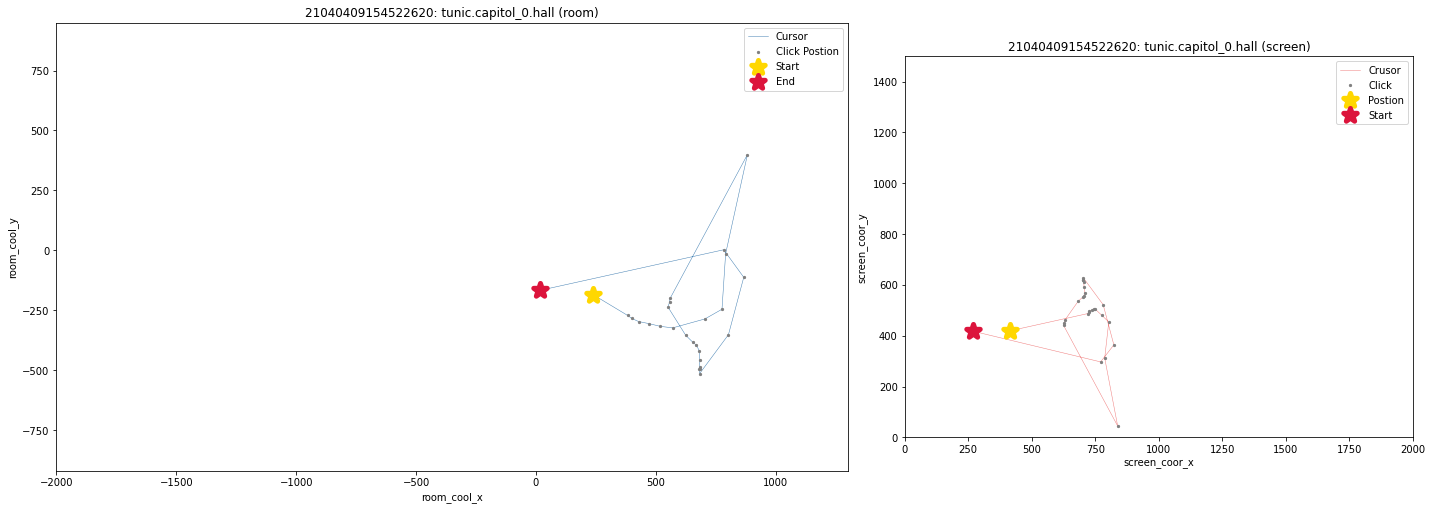

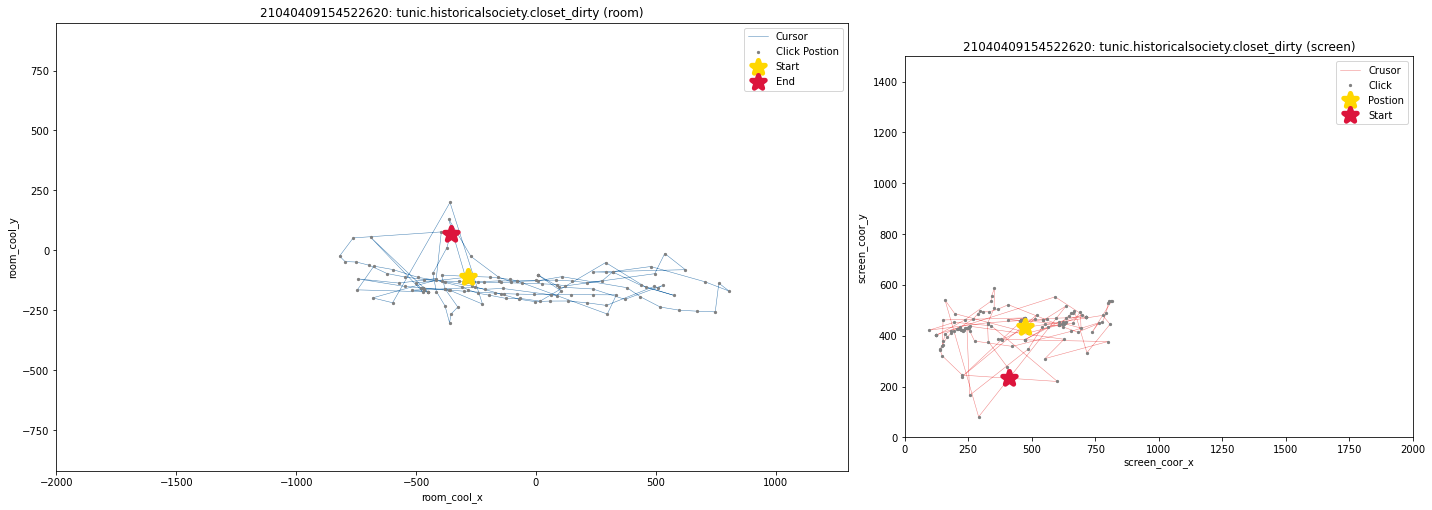

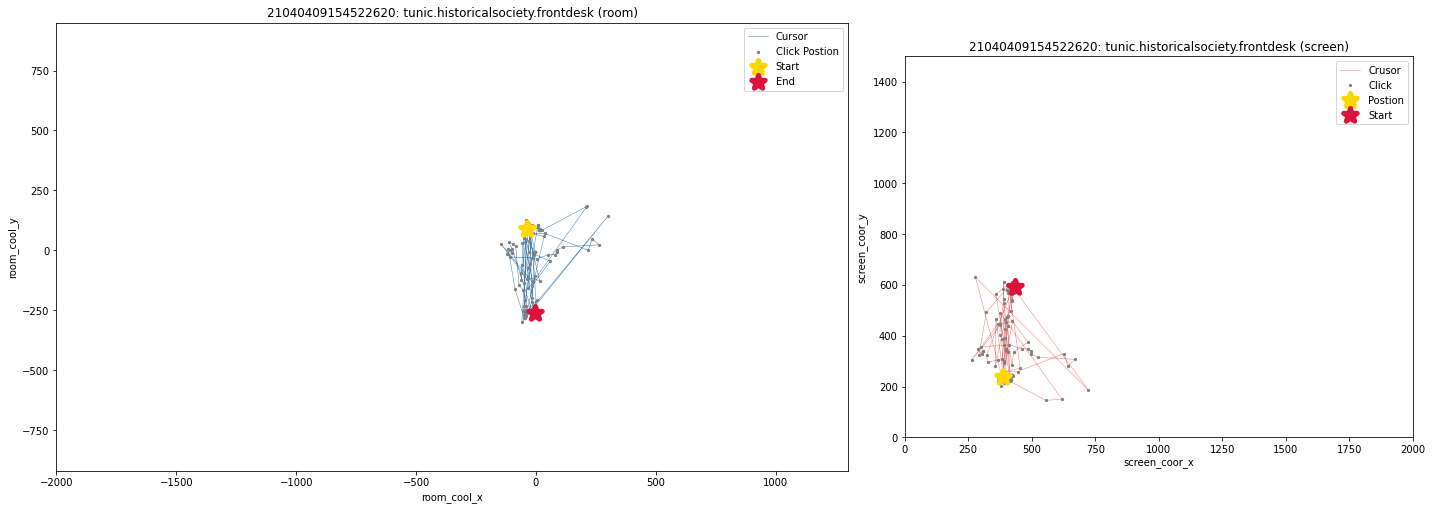

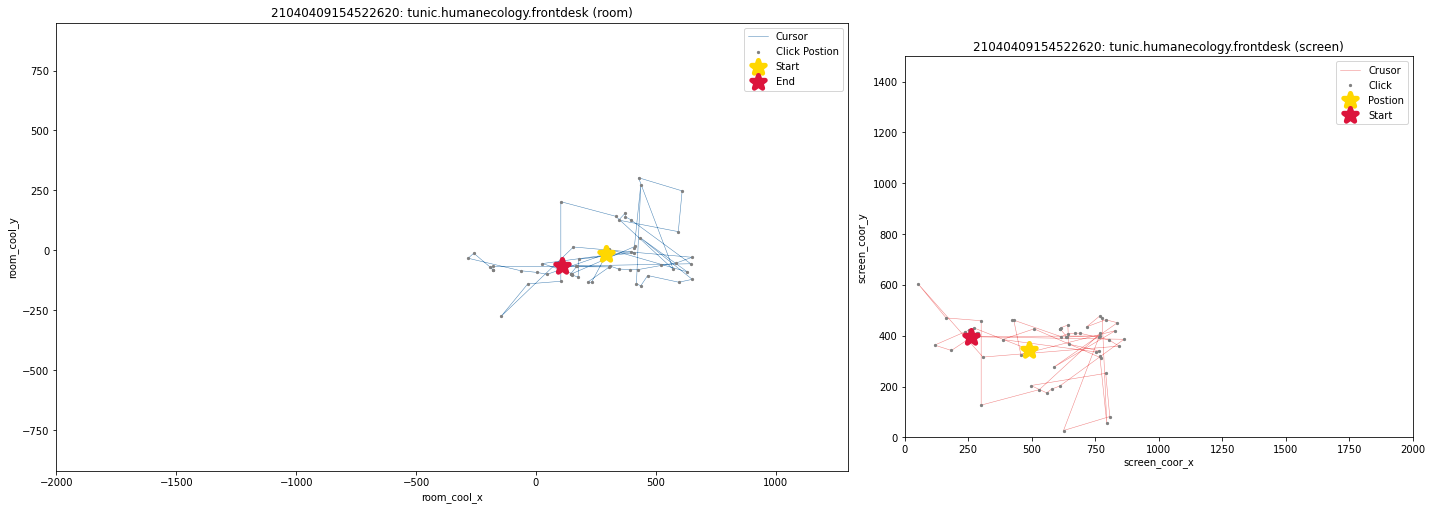

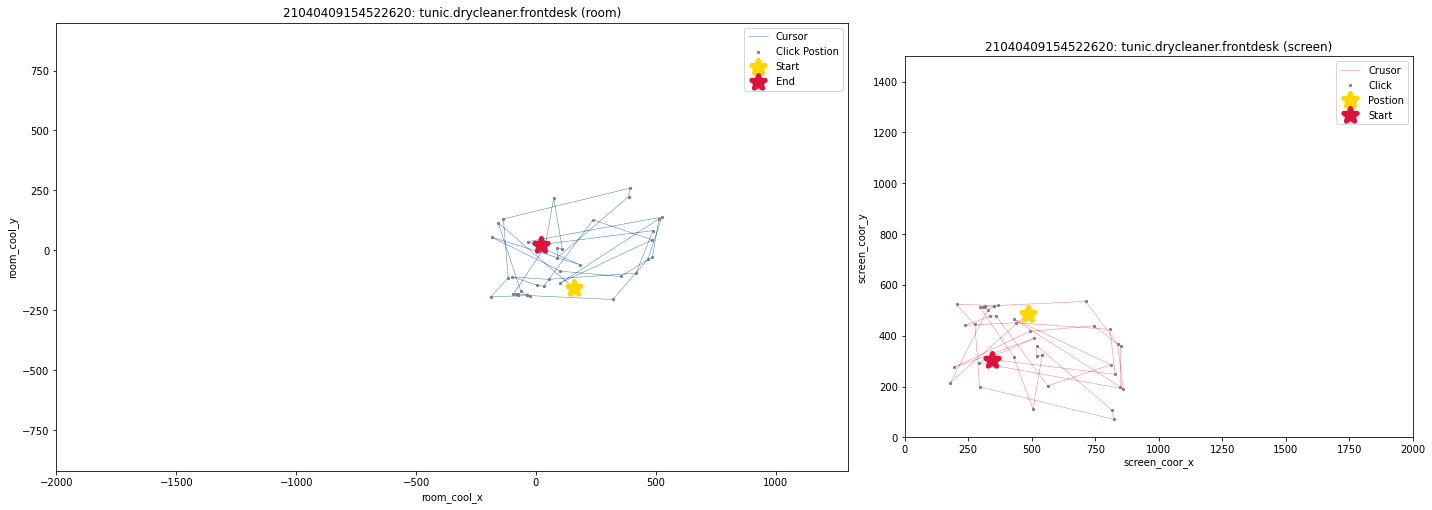

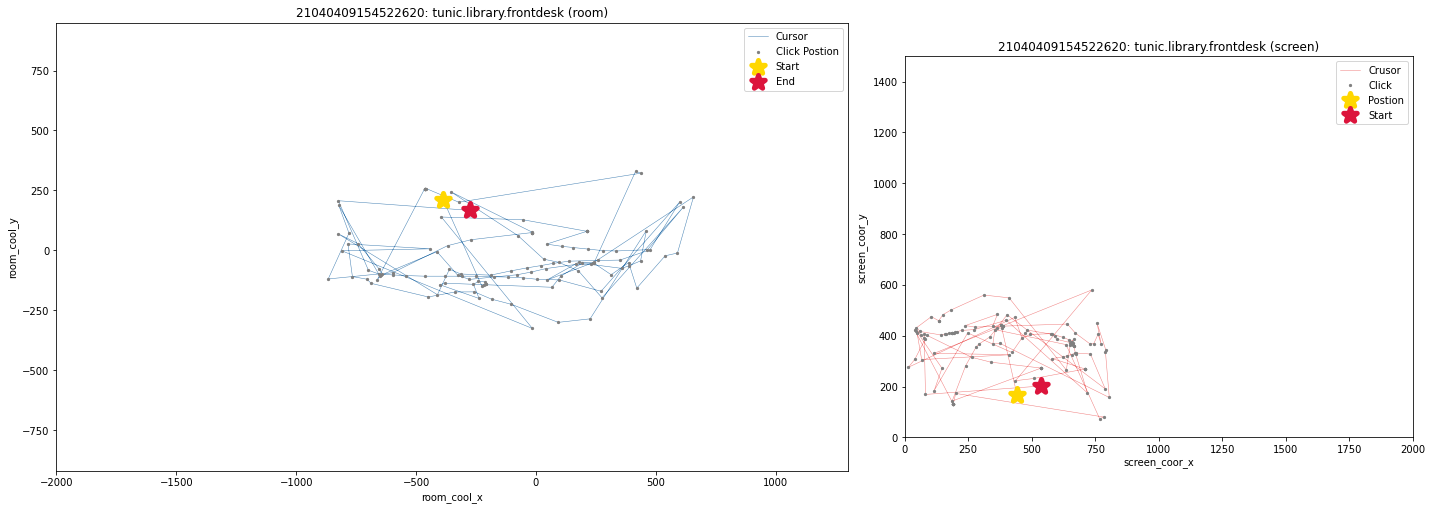

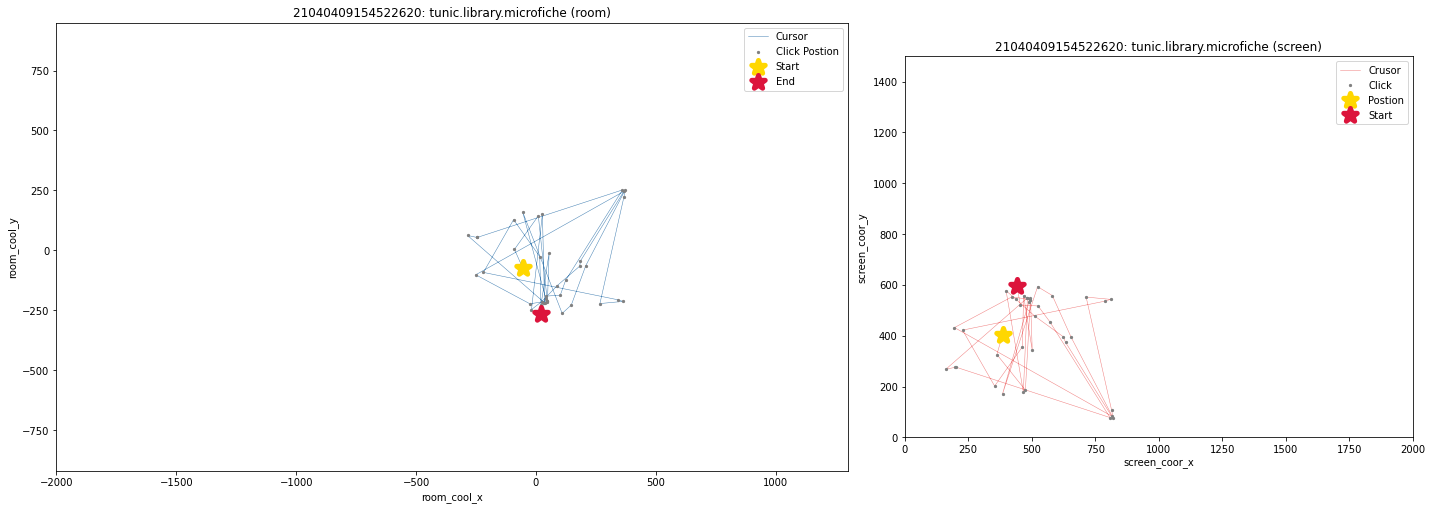

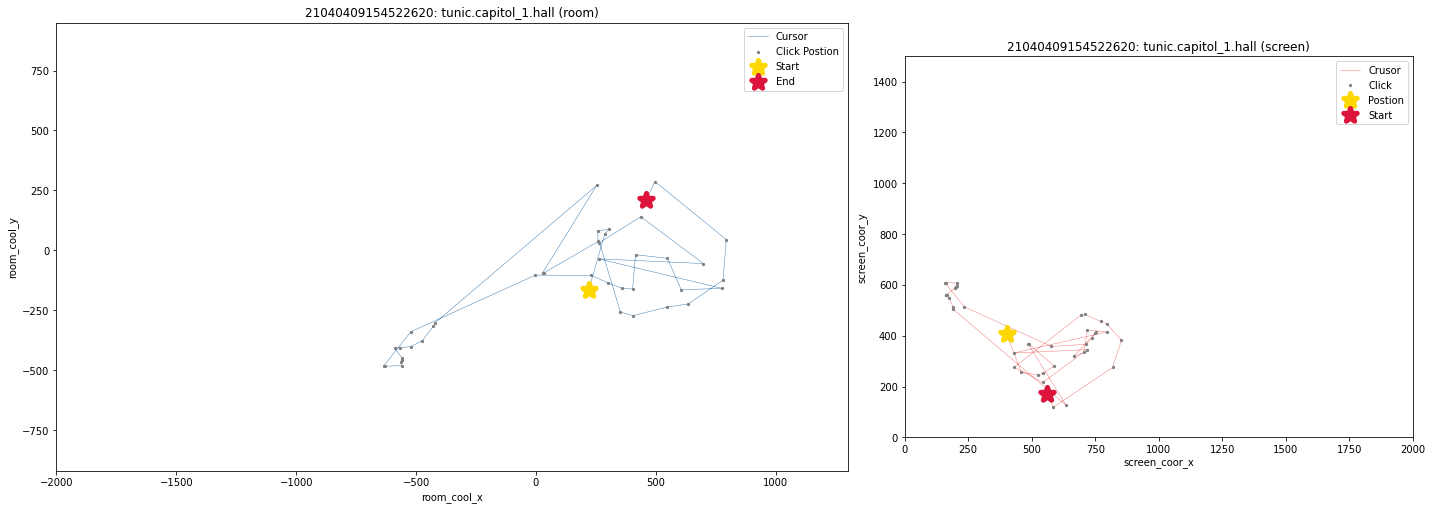

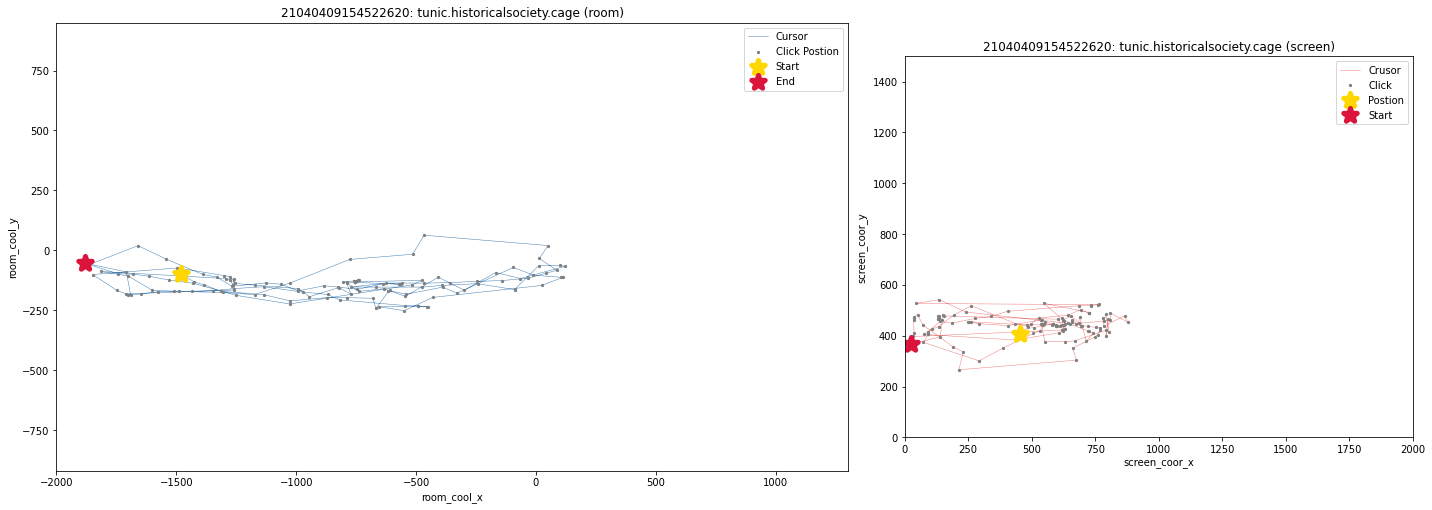

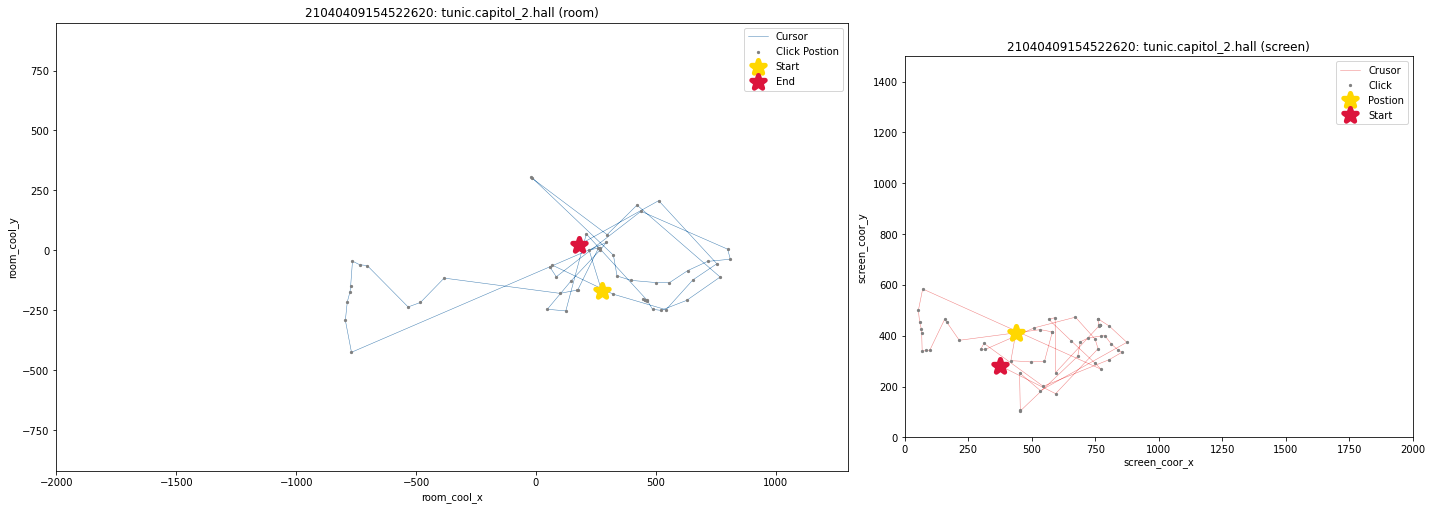

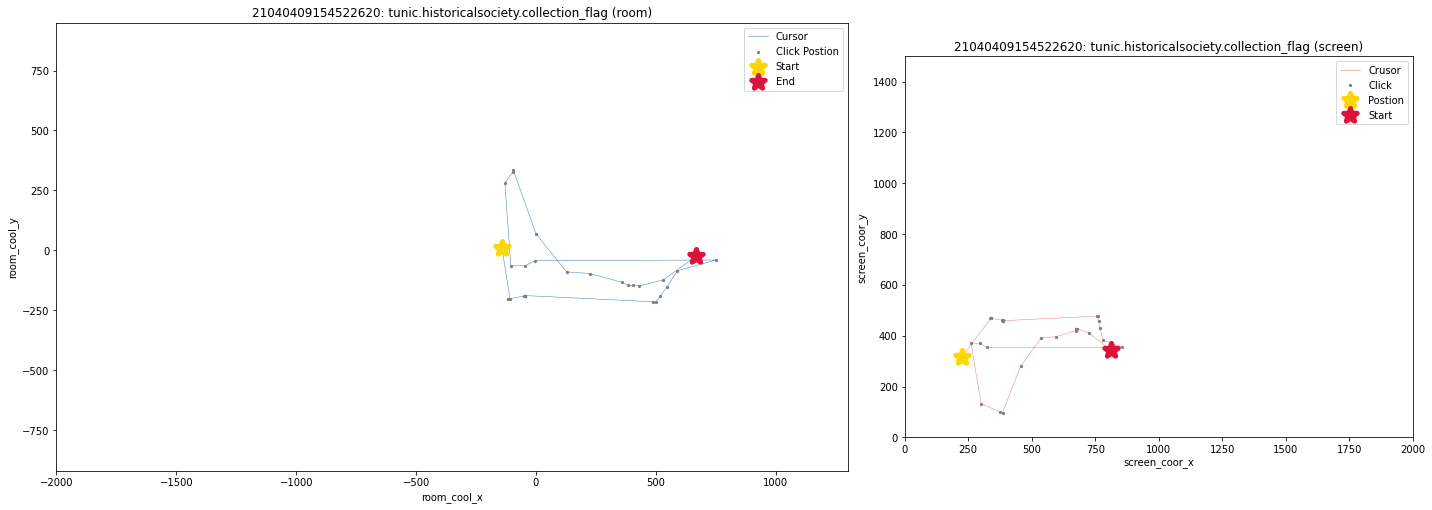

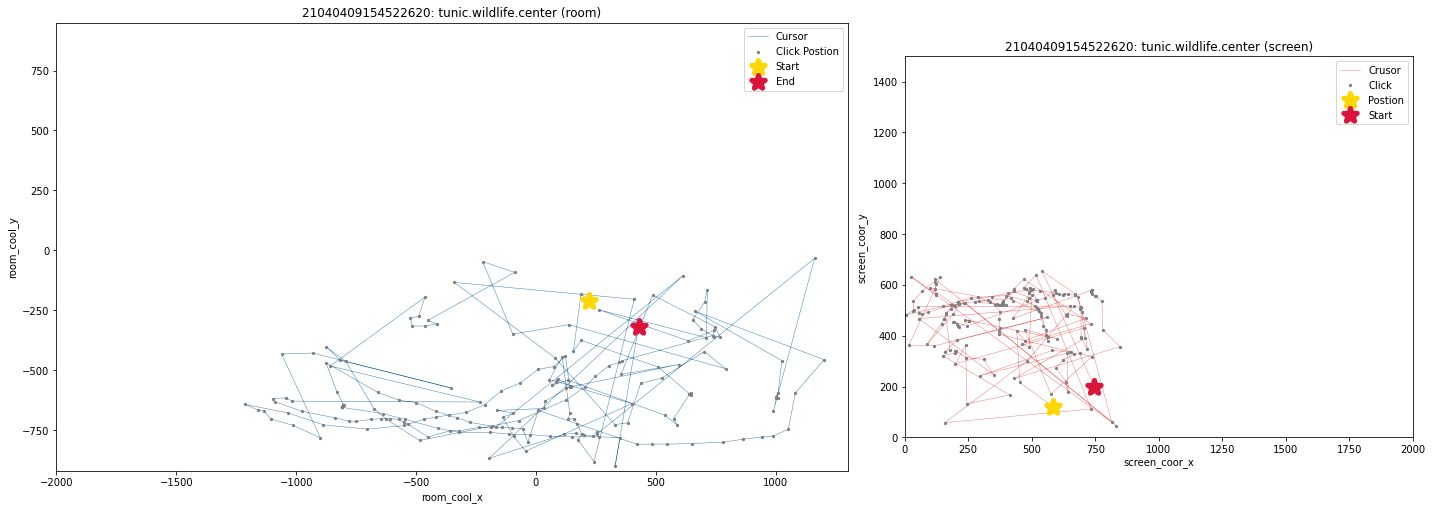

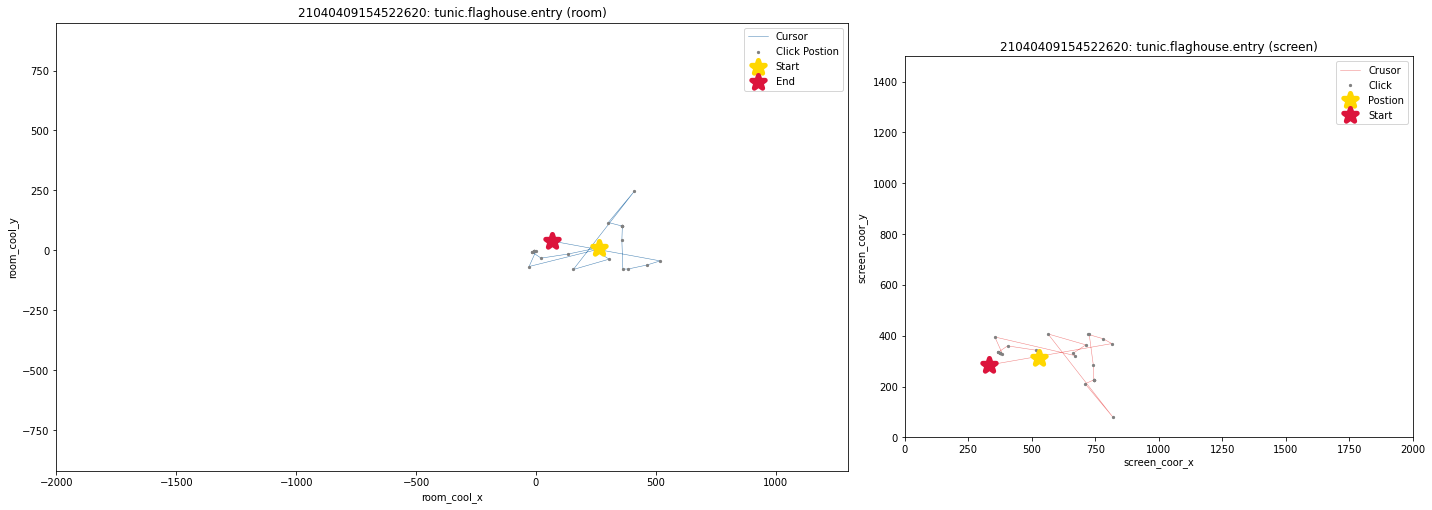

In [42]:
idx_dupl = train[['session_id','index']]
idx_dupl = idx_dupl[idx_dupl.duplicated()]
session_ids = train['session_id'].unique()
session_ids = session_ids[np.isin(session_ids,idx_dupl['session_id'].unique(),invert=True)]
plotGeoLocation(train,np.random.choice(session_ids))
del idx_dupl,session_ids

In [43]:
print('Number of unique text messages in train: {}'.format(len(train['text'].unique())))
print('Number of unique text messages in test: {}'.format(len(test['text'].unique())))

Number of unique text messages in train: 598
Number of unique text messages in test: 496


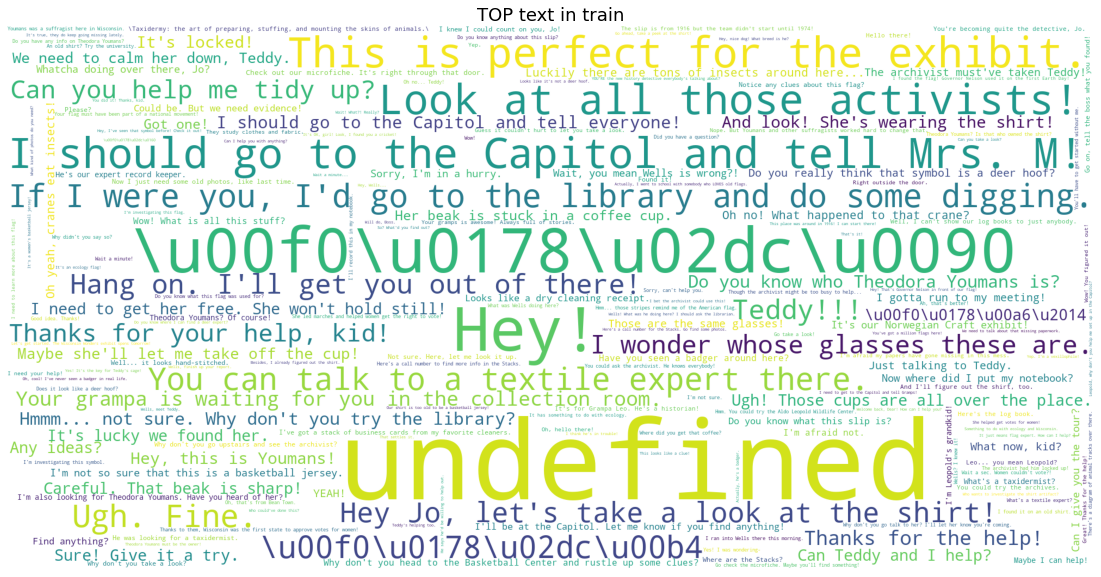

In [44]:
text_counts_train = train['text'].value_counts()
word_freq_train = dict(zip(text_counts_train.index.tolist(),text_counts_train.values.tolist()))
wordcloud_train = WordCloud(width=2000,height=1000,background_color='white').generate_from_frequencies(word_freq_train)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud_train)
plt.title('TOP text in train',fontsize=18)
plt.axis('off')
plt.show()
del text_counts_train,word_freq_train

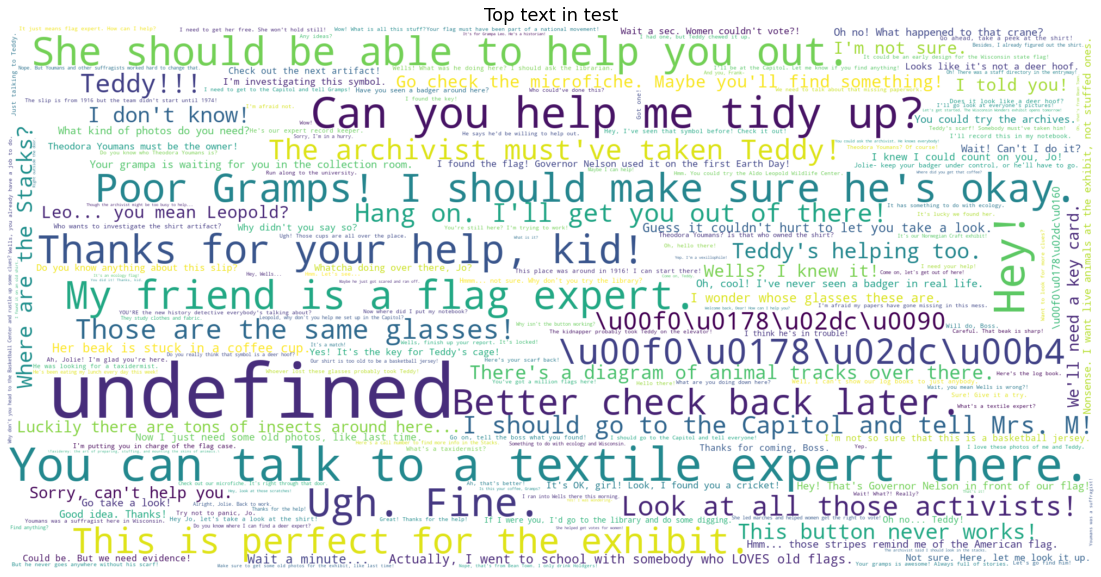

In [45]:
text_counts_test = test['text'].value_counts()
word_freq_test = dict(zip(text_counts_test.index.tolist(),text_counts_test.values.tolist()))
wordcloud_test = WordCloud(width=2000,height=1000,background_color='white').generate_from_frequencies(word_freq_test)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud_test,interpolation='bilinear')
plt.title('Top text in test',fontsize=18)
plt.axis('off')
plt.show()
del text_counts_test,word_freq_test

In [46]:
print('Share of events with page in trian: {}%'.format(round(train['page'].count()/len(train) * 100,2)))
print('Share of events with page in test: {}%'.format(round(test['page'].count()/len(test) * 100,2)))

page_counts_train = train['page'].value_counts()
page_counts_test = test['page'].value_counts()

Share of events with page in trian: 2.15%
Share of events with page in test: 4.1%


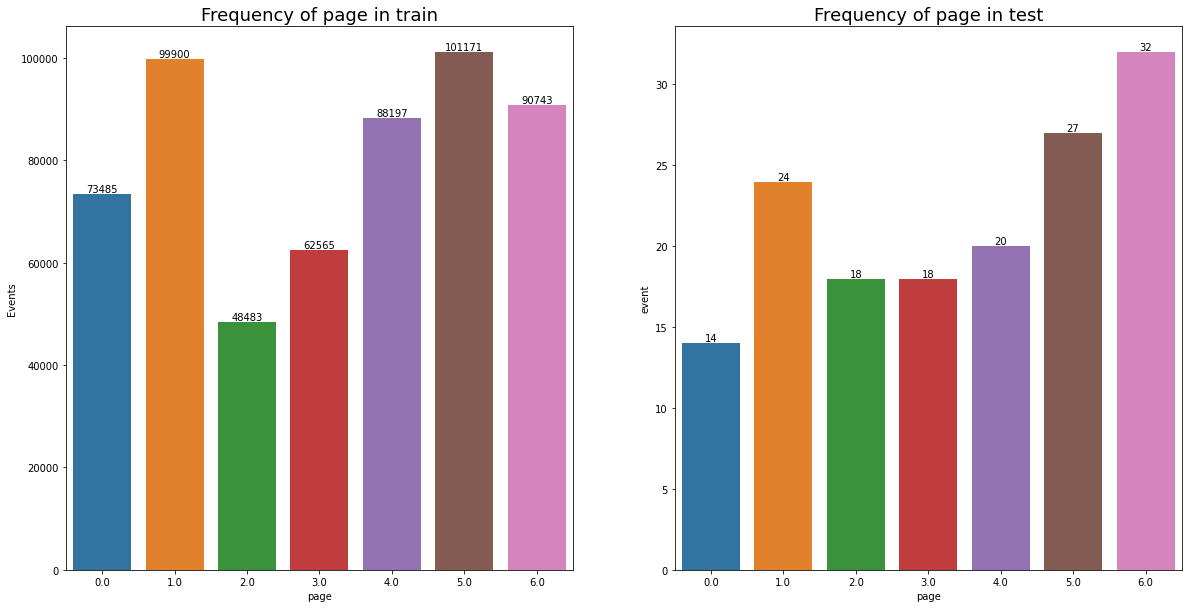

In [47]:
f,axs = plt.subplots(1,2,figsize=(20,10))
g1 = sns.barplot(x=page_counts_train.index,y=page_counts_train.values,ax=axs[0])
g1.set_title('Frequency of page in train',fontsize=18)
g1.bar_label(g1.containers[0],labels=[f'{x.get_height():.0f}' for x in g1.containers[0]])
g1.set_xlabel('page')
g1.set_ylabel('Events')

g2 = sns.barplot(x=page_counts_test.index,y=page_counts_test.values,ax = axs[1])
g2.set_title('Frequency of page in test',fontsize=18)
g2.bar_label(g2.containers[0],labels=[f'{x.get_height():.0f}' for x in g2.containers[0]])
g2.set_xlabel('page')
g2.set_ylabel('event')
plt.show()
del f,axs,g1,g2

In [48]:
print('Share of events with hover_duration in train:{}%'.format(round(train['hover_duration'].count()/len(train) * 100,2)))
print('Share of events with hover_duration in test: {}%'.format(round(test['hover_duration'].count()/len(test) * 100,2)))

hover_duration_train = np.round(train[train['hover_duration'].notna()]['hover_duration'].astype(np.int32)/1000.0,1)
hover_duration_test = np.round(test[test['hover_duration'].notna()]['hover_duration'].astype(np.int32)/1000.0,1)

Share of events with hover_duration in train:7.61%
Share of events with hover_duration in test: 9.47%


In [92]:
stat = pd.DataFrame([hover_duration_train.describe().index.tolist(),
                    hover_duration_train.describe().values,
                    hover_duration_test.describe().values]).T
stat.columns = ['Class','hover_duration in train,seconds','hover_duration in test,seconds']
stat[stat.columns.tolist()[1:]] = stat[stat.columns.tolist()[1:]].apply(pd.to_numeric,errors='coerce')
print('hover_duration statis:')
stat[1:].style.hide_index().background_gradient('YlGn')

hover_duration statis:


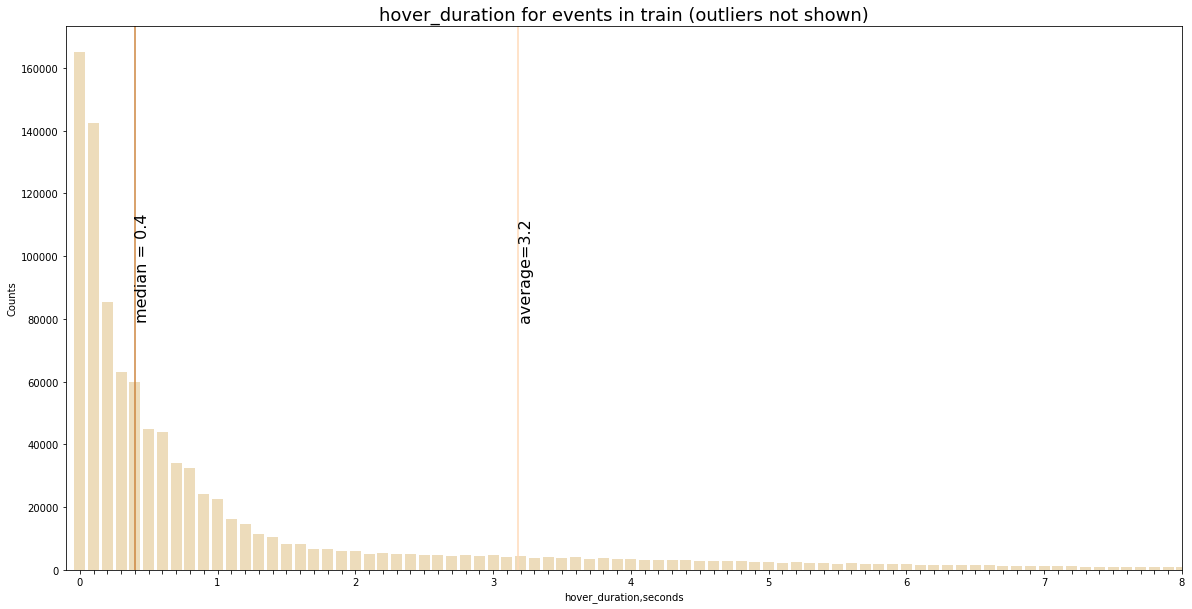

In [98]:
mean_hover_duration_train = hover_duration_train.mean()
median_hover_duration_train = hover_duration_train.median()
hover_duration_train_counts = np.round(hover_duration_train * 10,0).astype(np.int64).value_counts()
plt.figure(figsize=(20,10))
g = sns.barplot(x = hover_duration_train_counts.index, y = hover_duration_train_counts.values, color = 'wheat')
plt.title('hover_duration for events in train (outliers not shown)',fontsize=18)
g.set_xticklabels(['{}'.format(int(num/10)) if i%10==0 else '' for i,num in enumerate(g.get_xticks())])
g.set(xlabel='hover_duration,seconds',ylabel='Counts')
g.axvline(x=mean_hover_duration_train*10,color='peachpuff')
g.text(mean_hover_duration_train*10,80000,f'average={round(mean_hover_duration_train,1)}',rotation=90,fontsize=16)

g.axvline(x = median_hover_duration_train*10,color='peru')
g.text(median_hover_duration_train*10,80000,f'median = {round(median_hover_duration_train,1)}',rotation=90,fontsize=16)
plt.xlim(-1,80)
plt.show()
del mean_hover_duration_train,median_hover_duration_train,hover_duration_train_counts,g

In [99]:
mean_hover_duration_test = hover_duration_test.mean()
median_hover_duration_test = hover_duration_test.median()

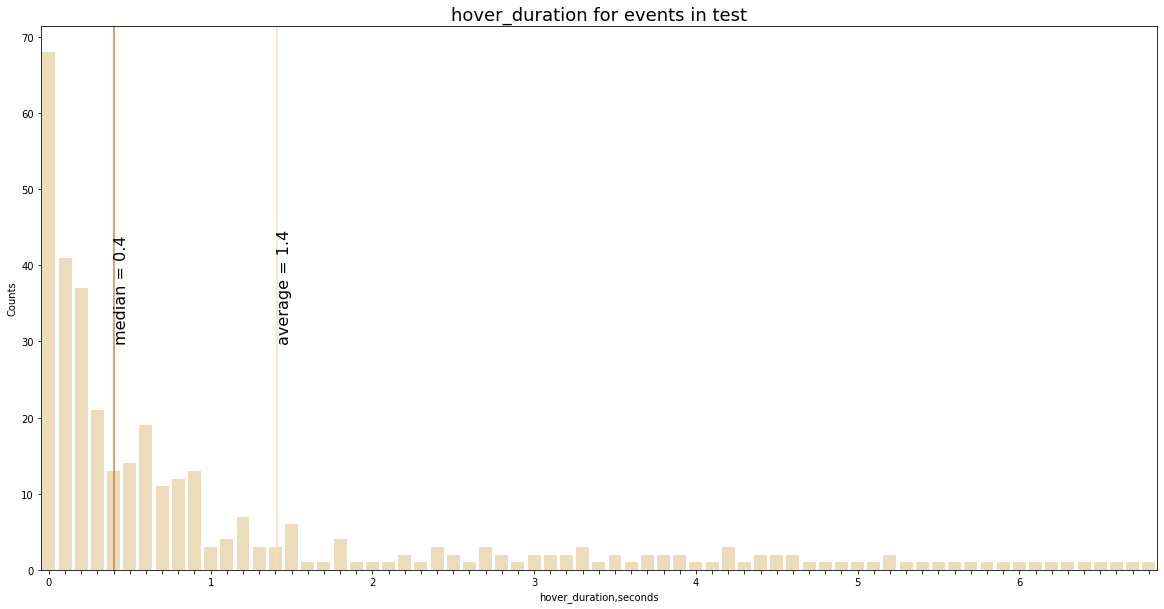

In [101]:
hover_duration_test_counts = np.round(hover_duration_test*10,0).astype(np.int64).value_counts()
plt.figure(figsize=(20,10))
g = sns.barplot(x=hover_duration_test_counts.index,y=hover_duration_test_counts.values,color='wheat')
plt.title('hover_duration for events in test',fontsize=18)
g.set_xticklabels(['{}'.format(int(num/10)) if i%10==0 else '' for i,num in enumerate(g.get_xticks())])
g.set(xlabel='hover_duration,seconds',ylabel='Counts')
g.axvline(x=mean_hover_duration_test*10,color='peachpuff')
g.text(mean_hover_duration_test*10,30,f'average = {round(mean_hover_duration_test,1)}',rotation=90,fontsize=16)

g.axvline(x=median_hover_duration_test*10,color='peru')
g.text(median_hover_duration_test*10,30,f'median = {round(median_hover_duration_test,1)}',rotation = 90,fontsize=16)
plt.show()
del mean_hover_duration_test,median_hover_duration_test,hover_duration_test_counts